### EMOTION DETECTION - TEST MODEL

In [99]:
import os
import sys
from pathlib import Path
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, Conv1D, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
# Add project path to the PYTHONPATH
sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

### LOAD TOKENIZER AND MODEL

In [49]:
tokenizer_path = Path('tokenizer.pickle').resolve()
with tokenizer_path.open('rb') as file:
    tokenizer = pickle.load(file)

In [50]:
input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
num_classes = 12
embedding_dim = 500
input_length = 100
lstm_units = 128
lstm_dropout = 0.1
recurrent_dropout = 0.1
spatial_dropout=0.2
filters=64
kernel_size=3

input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
num_classes = 12
embedding_dim = 500
input_length = 100
lstm_units = 128
lstm_dropout = 0.1
recurrent_dropout = 0.1
spatial_dropout=0.2
filters=64
kernel_size=3

input_layer = Input(shape=(input_length,))
output_layer = Embedding(
  input_dim=input_dim,
  output_dim=embedding_dim,
  input_shape=(input_length,)
)(input_layer)

output_layer = SpatialDropout1D(spatial_dropout)(output_layer)

output_layer = Bidirectional(
LSTM(lstm_units, return_sequences=True,
     dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)
)(output_layer)

output_layer = Bidirectional(
LSTM(lstm_units, return_sequences=True,
     dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)
)(output_layer)

output_layer = Conv1D(filters, kernel_size=kernel_size, padding='valid',
                    kernel_initializer='glorot_uniform')(output_layer)

avg_pool = GlobalAveragePooling1D()(output_layer)
max_pool = GlobalMaxPooling1D()(output_layer)
output_layer = concatenate([avg_pool, max_pool])

output_layer = Dense(num_classes, activation='softmax')(output_layer)

model = Model(input_layer, output_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 500)     13523000    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 100, 500)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 100, 256)     644096      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [51]:
model_weights_path = Path('../model_weights.h5').resolve()
model.load_weights(model_weights_path.as_posix())

### LOAD TEST DATA & ENCODER

The test data generated by splitting using train_test is used here. Change the name of the file here in JSON file accordingly

In [100]:
def csvTestFileCreation(f):
    file = open(f)
    data = json.load(file)
    df = pd.DataFrame(columns=["id","text"])
    for key in data:
        df = df.append({"id":key,"text":data[key]["body"]}, ignore_index = True)
    df.to_csv("nlp_test.csv")

In [101]:
#Uncomment the below statement and rename the json file accordingly
#the json file format should be in the given train file format
csvTestFileCreation("nlp_test.json") 
data_path = Path('nlp_test.csv').resolve() 
data = pd.read_csv(data_path)

encoder_path = Path('../encoder.pickle').resolve()
with encoder_path.open('rb') as file:
    encoder = pickle.load(file)

cleaned_data = preprocess(data.text)
sequences = [text.split() for text in cleaned_data]
list_tokenized = tokenizer.texts_to_sequences(sequences)
x_data = pad_sequences(list_tokenized, maxlen=100)

### PREDICTION AND OUTPUT

In [111]:
y_pred = model.predict(x_data)

fhlsd2m
[0.00046204 0.10010647 0.00075273 0.09266867 0.2977197  0.00152868
 0.13260344 0.25841826 0.02277243 0.01229395 0.00634251 0.07433116]


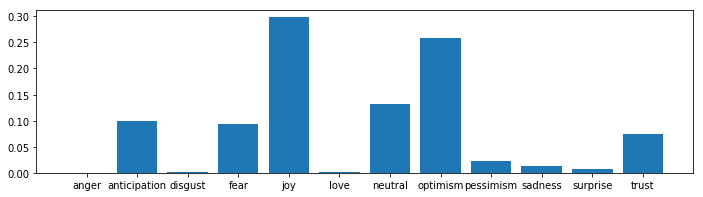

fka56ha
[1.42012001e-03 1.22447655e-01 1.53678667e-03 5.72870553e-01
 3.91622214e-03 7.26515951e-04 4.21999253e-08 6.15781806e-02
 3.36768874e-03 1.97012633e-01 4.33256291e-03 3.07909921e-02]


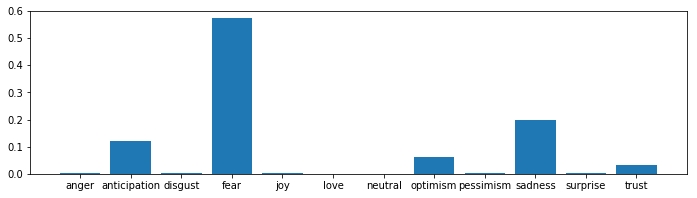

finry2a
[0.17321084 0.09045582 0.2521625  0.07128091 0.10162758 0.02119858
 0.00033467 0.05616608 0.10372068 0.06222304 0.02743127 0.04018806]


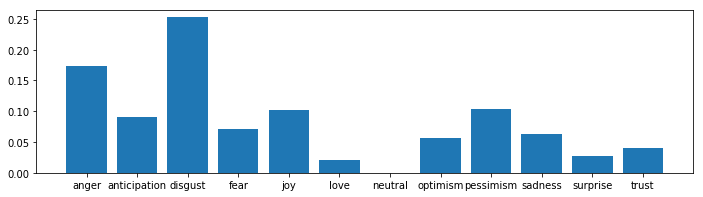

fl4e0zp
[0.00637825 0.20811443 0.00889637 0.42185265 0.03330876 0.00279904
 0.00618144 0.04319427 0.09712069 0.09389154 0.03389712 0.04436548]


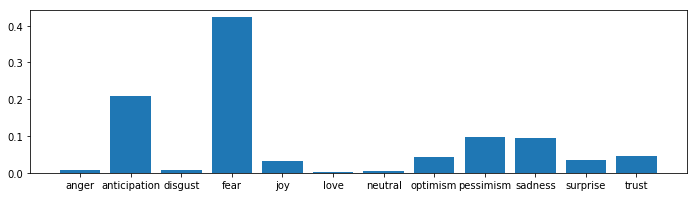

fkasyqk
[2.5902746e-02 2.4018495e-01 1.0586613e-01 1.3410559e-01 1.0656033e-04
 1.7158762e-05 9.2817118e-08 2.2651383e-03 4.7409046e-01 1.6179698e-02
 2.1732792e-04 1.0641282e-03]


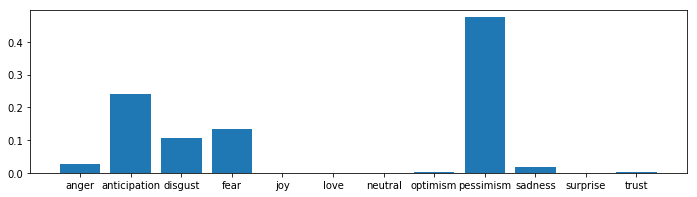

fgu8vbp
[6.80095796e-03 2.06088319e-01 5.44244014e-02 2.26212367e-01
 1.03679905e-02 1.02855088e-02 4.33013920e-05 2.20242426e-01
 1.40292034e-01 1.84048265e-02 2.19974741e-02 8.48403201e-02]


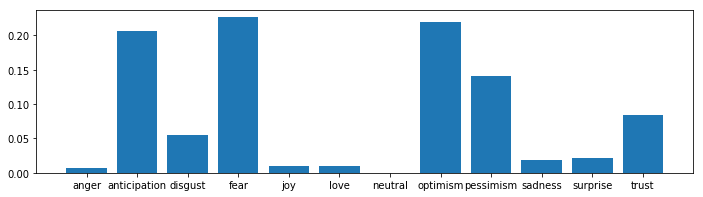

fkdoojx
[1.9906995e-01 1.4051597e-01 9.7385108e-02 1.2677121e-01 1.3479830e-03
 1.4995697e-03 1.9904253e-05 6.4139874e-03 3.3280057e-01 8.3191700e-02
 5.3651053e-03 5.6189802e-03]


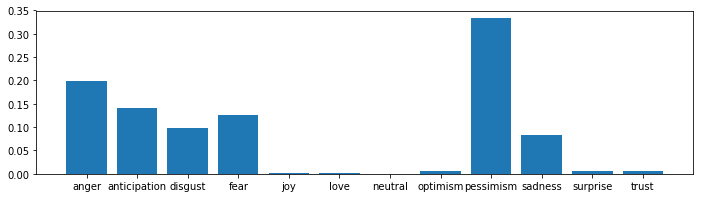

fkn4wls
[2.1633076e-02 1.9943690e-01 4.5581114e-02 2.3506717e-01 1.9735433e-02
 2.0369475e-03 8.5056752e-05 7.8506380e-02 3.2657668e-01 3.8671307e-02
 1.8144839e-02 1.4525184e-02]


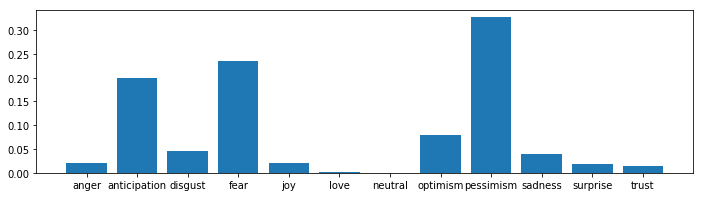

fl6fcpy
[3.8707133e-02 1.9548953e-01 8.3754748e-02 2.5331011e-01 1.6779365e-02
 6.8785218e-03 2.0024092e-05 8.0576077e-02 9.2000917e-02 1.7009376e-01
 2.8861072e-02 3.3528764e-02]


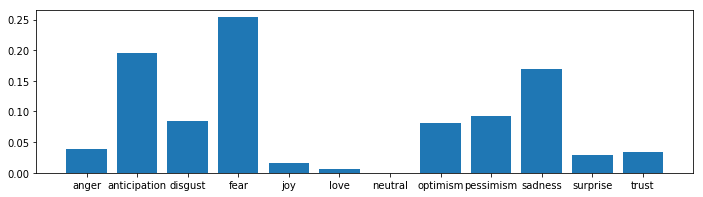

fjx0pdx
[3.1449512e-02 2.2417036e-01 1.1267057e-01 2.7600726e-01 4.7718231e-03
 8.2838861e-03 1.8013575e-06 3.1262830e-02 2.2409715e-01 5.4334659e-02
 1.7229894e-03 3.1227108e-02]


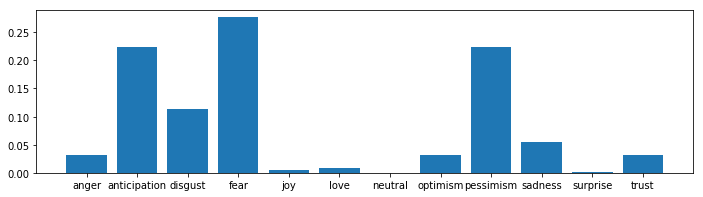

fkkiut4
[2.57902988e-03 3.13989043e-01 1.54780652e-02 1.86343327e-01
 1.24190105e-02 1.48583082e-02 8.15669118e-05 9.99268144e-02
 9.97686163e-02 1.05439968e-01 1.14202879e-01 3.49132754e-02]


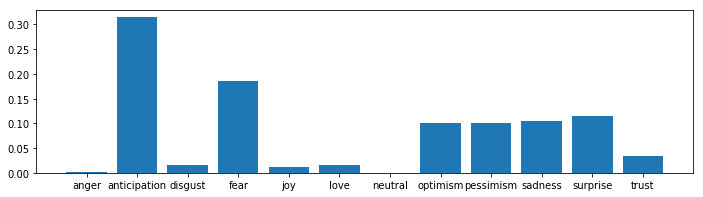

fkxgi0w
[0.1749622  0.28022948 0.0911658  0.12470827 0.02188187 0.0044867
 0.00031608 0.03956508 0.16239497 0.05668137 0.01216954 0.0314387 ]


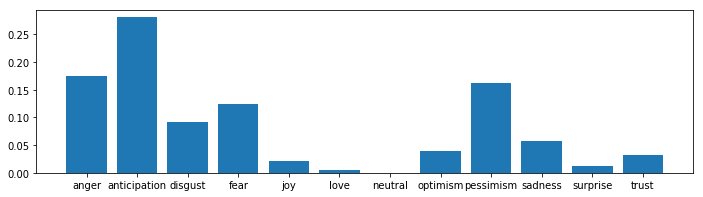

fiu9es9
[3.3880997e-02 2.2119613e-01 1.2312264e-01 2.6437354e-01 2.5049152e-03
 2.9281487e-03 1.4452546e-06 8.6063407e-02 1.4427373e-01 6.2953293e-02
 1.7327195e-03 5.6968983e-02]


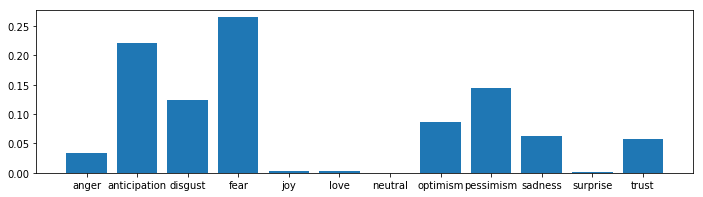

fkihy5v
[4.6601154e-02 2.3390667e-01 1.5400764e-01 1.1428041e-01 3.7491772e-02
 1.7358379e-02 2.0041470e-04 4.5095392e-02 1.5467481e-01 9.9669881e-02
 6.3595079e-02 3.3118498e-02]


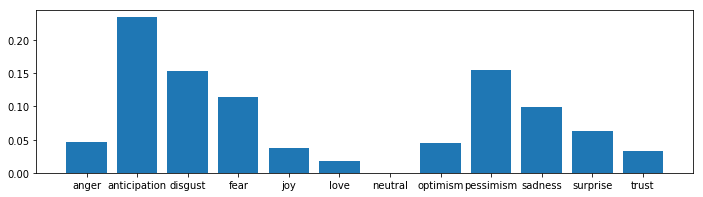

fl9f27j
[0.23717184 0.04478852 0.1830766  0.05698172 0.09557439 0.00114979
 0.01260472 0.01376987 0.2705838  0.04921746 0.02570127 0.00938008]


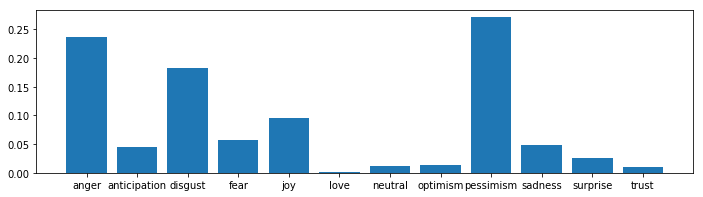

fkkvgee
[6.3708343e-02 3.1775311e-01 1.1476356e-01 1.7656392e-01 8.1123682e-03
 1.2737456e-03 2.4318450e-05 4.0709704e-02 2.1672659e-01 3.4345753e-02
 1.2219605e-02 1.3798926e-02]


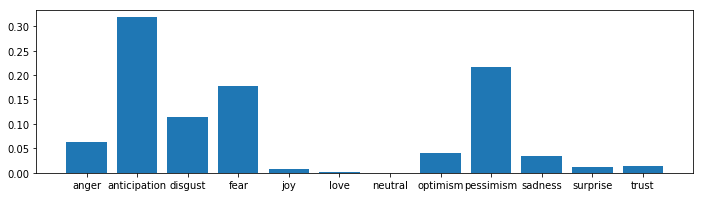

fldcky1
[1.0433213e-01 1.6736366e-01 1.7292379e-01 9.1752402e-02 2.2404902e-02
 7.9480279e-03 9.3012510e-05 3.7712503e-02 2.8444096e-01 6.3067012e-02
 3.4103721e-02 1.3857852e-02]


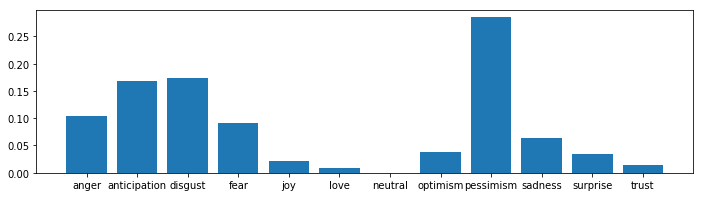

fkyw22k
[7.00713471e-02 1.71165675e-01 8.94456804e-02 1.18376434e-01
 2.83585507e-02 5.87423239e-03 1.17439951e-04 7.08484054e-02
 1.32676050e-01 2.48944491e-01 5.63903339e-02 7.73139205e-03]


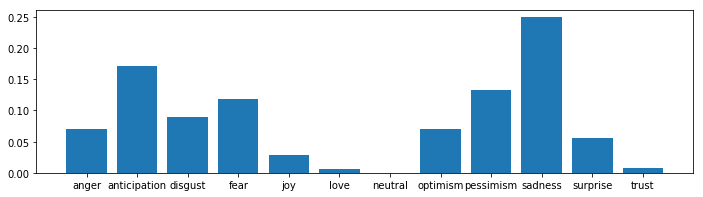

fkn2i1h
[9.1578439e-02 1.3375331e-01 1.1004652e-01 2.0601180e-01 1.9204022e-02
 4.5144975e-02 9.2988470e-05 5.1647507e-02 1.7700866e-01 1.0236531e-01
 4.2827073e-02 2.0319462e-02]


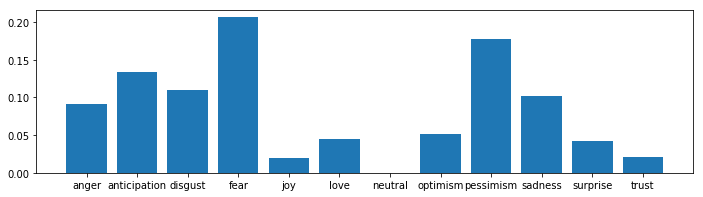

fisgzjc
[5.37575521e-02 2.36789465e-01 2.21799046e-01 1.22735322e-01
 1.56672241e-03 1.46345072e-03 2.50814742e-06 1.54025489e-02
 1.79521754e-01 1.35589510e-01 1.82219073e-02 1.31501155e-02]


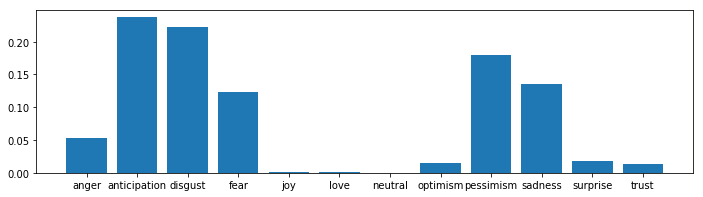

fjgo92f
[1.13594167e-01 1.18915312e-01 2.85666019e-01 7.93092549e-02
 5.91321401e-02 2.32079811e-02 1.22002246e-04 4.15913984e-02
 1.64101273e-01 1.96740516e-02 3.38321403e-02 6.08541593e-02]


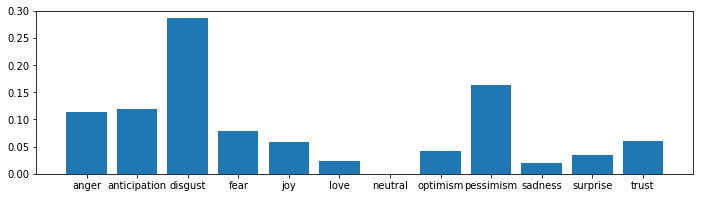

fk94ply
[5.0751515e-02 2.4814752e-01 4.0801708e-02 3.2264662e-01 1.5917519e-02
 5.8569801e-03 2.5868887e-04 1.1551879e-02 8.0988057e-02 1.0970986e-01
 2.6783474e-02 8.6586162e-02]


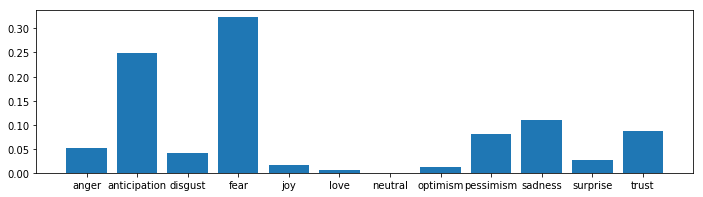

fi32mr0
[5.9066072e-02 1.7202736e-01 1.7569910e-01 3.2197547e-01 1.0049760e-02
 2.0197509e-03 1.4628541e-05 2.4480214e-02 1.7232415e-01 4.7371753e-02
 8.3346311e-03 6.6371146e-03]


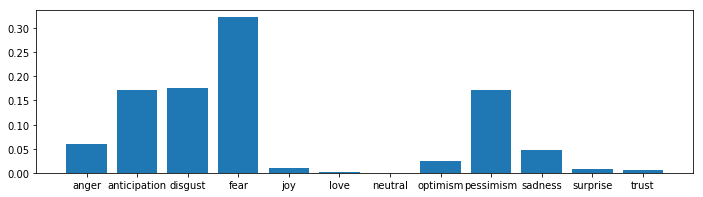

fl9o3uv
[0.1991238  0.18120143 0.13341855 0.09778381 0.04563157 0.01124172
 0.00034029 0.02983421 0.19242847 0.02327476 0.04627449 0.03944682]


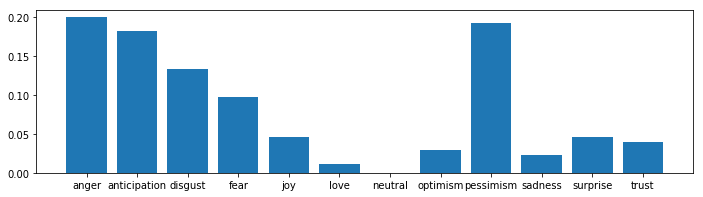

fks1k4k
[7.16818199e-02 2.50000715e-01 1.63760036e-01 1.22586869e-01
 4.42370260e-03 3.07090674e-03 2.16339095e-06 1.17076235e-02
 3.54687184e-01 8.94680712e-03 3.54731479e-03 5.58484579e-03]


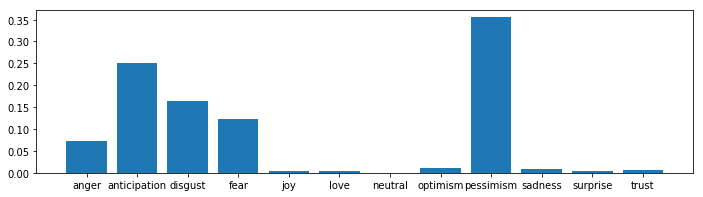

fldoefp
[0.03137092 0.10697412 0.06124952 0.15013818 0.15053473 0.02690403
 0.00059532 0.08951204 0.07190529 0.06373414 0.21293718 0.03414457]


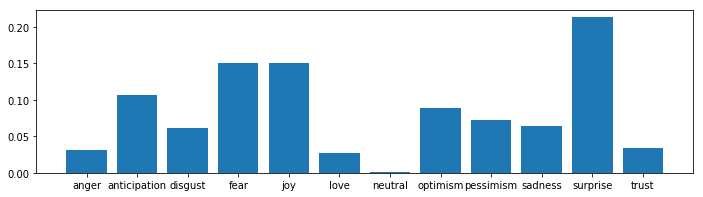

flbqe29
[0.08140706 0.2331101  0.05939578 0.16787218 0.15442014 0.02549893
 0.00540523 0.05287823 0.11018986 0.03711069 0.0371261  0.0355856 ]


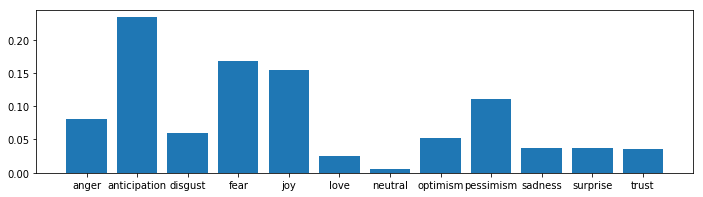

fl5fbi3
[1.51792377e-01 1.86514065e-01 1.24912426e-01 1.20036766e-01
 1.39534818e-02 1.07133454e-02 1.55738944e-05 1.32809747e-02
 1.95639834e-01 1.69111937e-01 1.11654522e-02 2.86375103e-03]


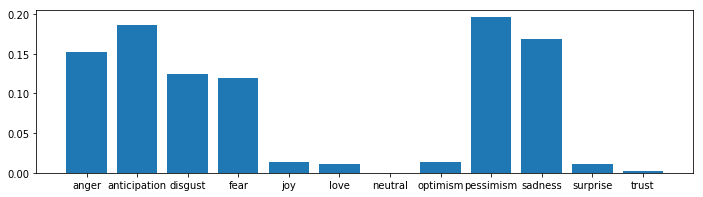

fl2r1ns
[1.3297220e-01 1.0313832e-01 1.8422593e-01 1.2299204e-01 2.9859919e-02
 5.1390573e-02 8.1366350e-05 8.8381320e-02 1.8740435e-01 3.6218408e-02
 1.3093772e-02 5.0241809e-02]


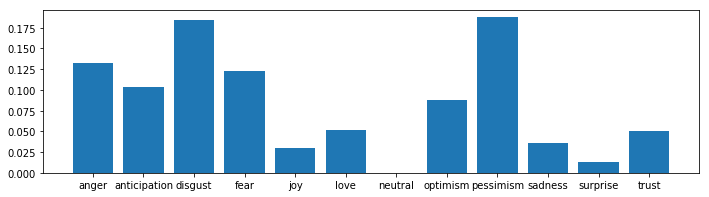

fkl3fny
[1.1001600e-01 1.7229716e-01 1.1717834e-01 2.9465246e-01 4.3317568e-03
 1.5677674e-02 3.2341507e-06 3.8301684e-02 1.1730415e-01 8.0101356e-02
 8.6304620e-03 4.1505639e-02]


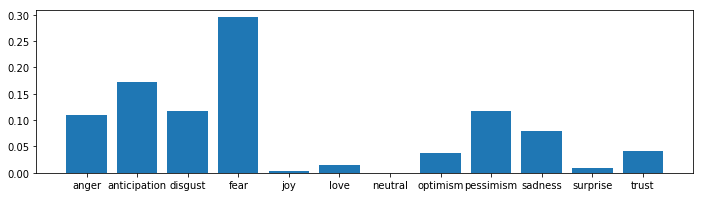

fkr727q
[1.0230255e-01 2.0368420e-01 1.1450301e-01 1.4483798e-01 3.1586080e-03
 1.1715390e-03 4.2750448e-06 7.8876548e-02 2.4932851e-01 7.3297180e-02
 7.7618393e-03 2.1073716e-02]


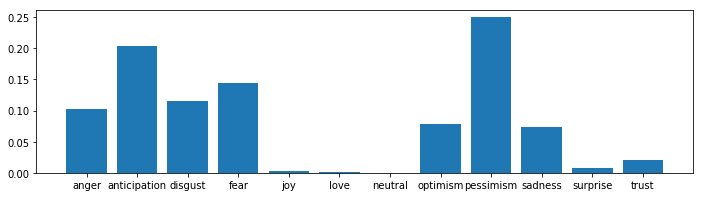

fk0azak
[6.3584231e-02 2.0301796e-01 5.3991228e-02 1.8223186e-01 1.7785565e-04
 3.9117385e-04 2.1087722e-06 4.9453941e-03 3.7915194e-01 1.0852085e-01
 2.5232297e-03 1.4621798e-03]


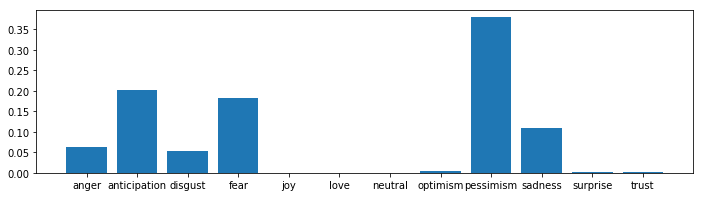

fk7sat2
[4.8461327e-01 4.5712996e-02 2.4916355e-01 1.9886795e-02 8.3743921e-03
 2.7645828e-04 1.4725357e-04 1.7641308e-03 1.7067626e-01 1.4589016e-02
 3.0578023e-03 1.7381175e-03]


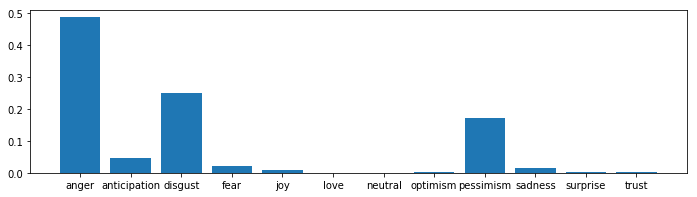

fkgt1v0
[0.02016336 0.43489772 0.0266387  0.1404216  0.00962821 0.00085912
 0.0073528  0.0065518  0.2628347  0.04567174 0.03362912 0.01135116]


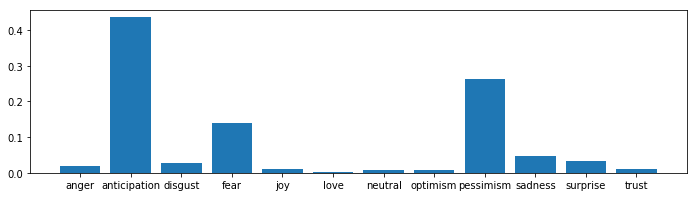

fizx0em
[6.3080773e-02 9.8760441e-02 5.5315431e-02 1.0124909e-01 1.9578838e-01
 2.3730798e-02 1.1100879e-04 2.5073758e-01 8.2725614e-02 6.0866319e-02
 3.8150579e-02 2.9483976e-02]


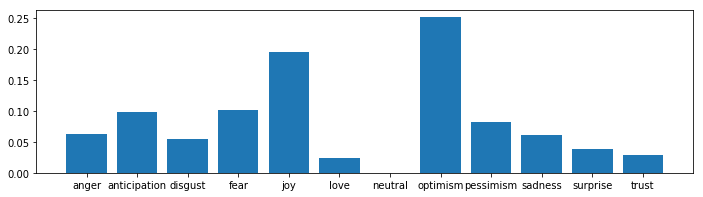

fl2nvhu
[2.51957681e-03 2.32078627e-01 6.26490638e-02 5.42828478e-02
 1.32654505e-02 3.38207791e-03 1.31867899e-04 2.81549960e-01
 1.30669877e-01 3.98954600e-02 4.28481773e-02 1.36727050e-01]


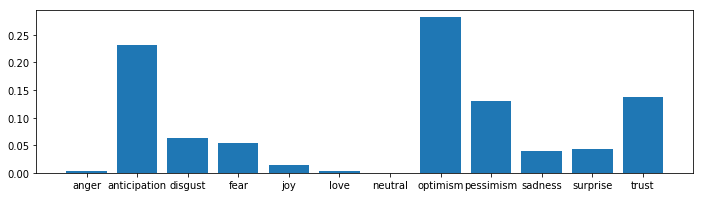

fjcur43
[1.8156196e-01 1.1823079e-01 2.0674610e-01 1.1886515e-01 9.7649135e-03
 9.4893957e-03 3.2962143e-05 1.6423510e-02 2.7495322e-01 3.3174489e-02
 1.4150774e-02 1.6606733e-02]


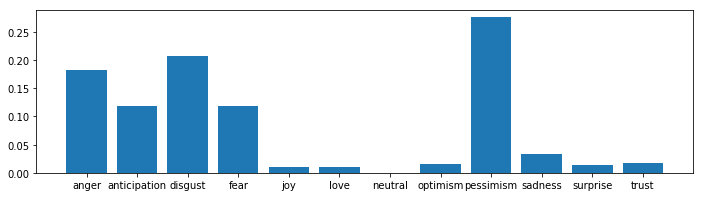

fl3uvch
[2.8290698e-01 7.4952692e-02 2.2793199e-01 5.3403541e-02 3.9971732e-03
 1.3594406e-03 9.1852680e-06 8.9635467e-03 3.1082642e-01 2.0964216e-02
 1.1859728e-03 1.3498806e-02]


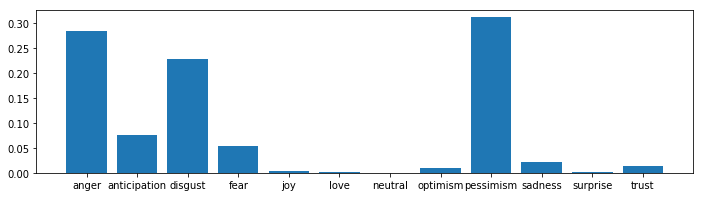

fgrz5qb
[4.91779782e-02 2.96272397e-01 1.08482406e-01 1.21680148e-01
 1.02035934e-02 4.21654154e-03 2.24143278e-05 9.96467322e-02
 1.64311841e-01 9.78109762e-02 2.88019124e-02 1.93730835e-02]


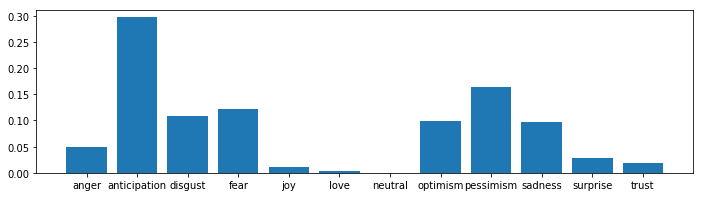

fkfzinn
[2.0616561e-02 2.5410062e-01 1.7799552e-01 7.9668881e-03 1.7286731e-01
 1.5474193e-02 7.0972892e-05 2.5874063e-01 2.8281614e-02 7.8770490e-03
 1.3971421e-02 4.2037286e-02]


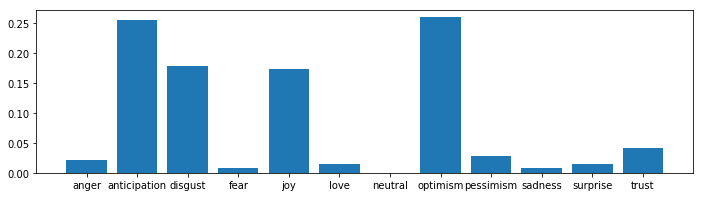

fj5oyw9
[7.1580485e-02 3.5575193e-01 1.4640611e-01 6.5003633e-02 3.6281606e-03
 6.1798544e-04 8.6210974e-05 2.5575729e-02 2.3676185e-01 5.2941225e-02
 1.0392146e-02 3.1254493e-02]


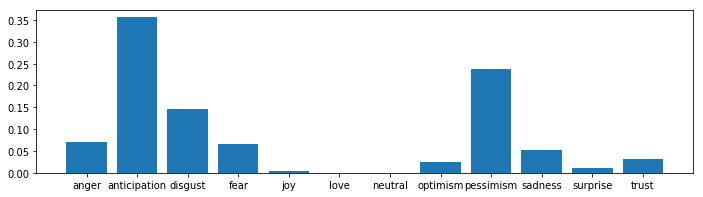

flb8hnb
[1.9415157e-01 1.1365624e-01 1.4811909e-01 9.0639919e-02 1.5006069e-02
 1.0767429e-03 1.2605333e-04 3.5236750e-02 3.2212907e-01 3.6420479e-02
 1.3259166e-02 3.0178878e-02]


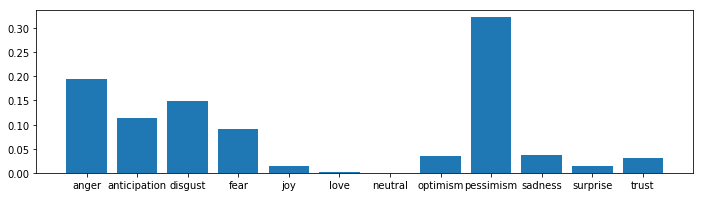

fg4abn6
[7.7232053e-03 2.0869422e-01 1.5004531e-01 1.8590233e-01 2.9290542e-03
 9.2259431e-03 3.0099848e-06 9.5822312e-02 1.9820212e-01 9.2879020e-02
 5.8879447e-03 4.2685550e-02]


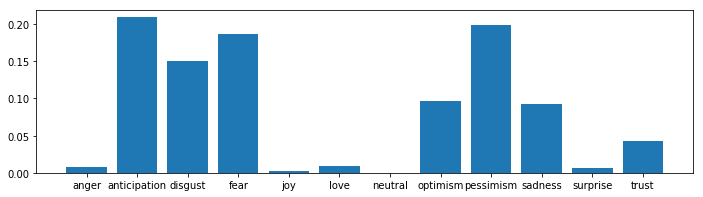

fl086p5
[2.0568854e-01 1.8367362e-01 1.6060045e-01 1.2435708e-01 4.6091944e-02
 8.7407259e-03 1.5564544e-04 5.9738975e-02 1.5914655e-01 2.5341250e-02
 1.2013503e-02 1.4451672e-02]


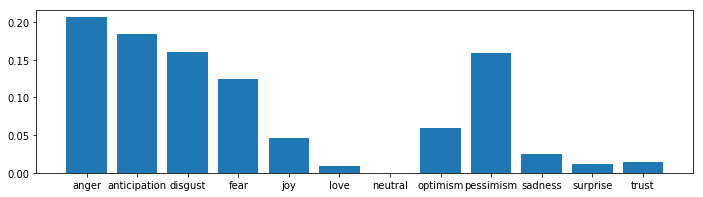

fjgq72q
[2.28958689e-02 2.16842338e-01 1.38011053e-01 1.35156095e-01
 4.07943223e-03 1.13135725e-02 3.74485194e-06 5.45810014e-02
 1.24889955e-01 2.22383067e-01 2.62623131e-02 4.35815491e-02]


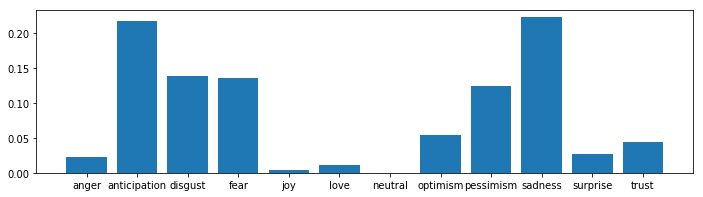

fkr8rmz
[5.00693284e-02 1.55743062e-01 8.26800093e-02 1.14519715e-01
 2.37844661e-02 2.09632311e-02 6.72384485e-05 1.71250030e-01
 1.76864460e-01 1.14085160e-01 2.99189333e-02 6.00543134e-02]


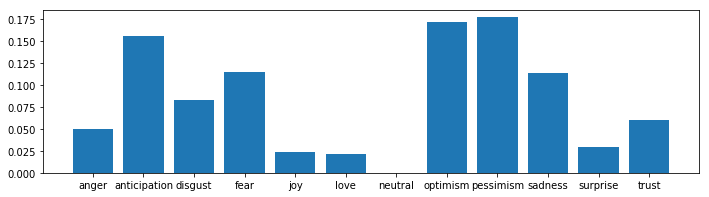

fgjej7x
[4.1811656e-02 3.5270336e-01 4.6773631e-02 1.3696463e-01 3.2538807e-03
 2.3350783e-03 2.3401501e-05 8.2572348e-02 3.0278739e-01 1.4805854e-02
 4.5416201e-03 1.1427169e-02]


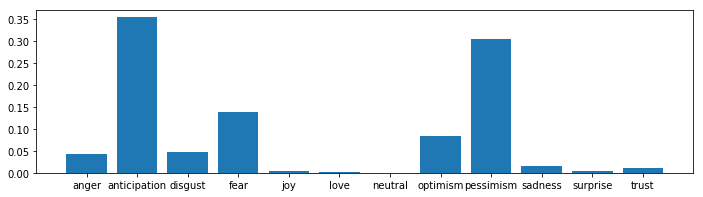

fl5dckq
[0.05477013 0.22613578 0.06027392 0.21472864 0.07682409 0.02173589
 0.00056308 0.06345003 0.14093193 0.03416694 0.03479816 0.07162139]


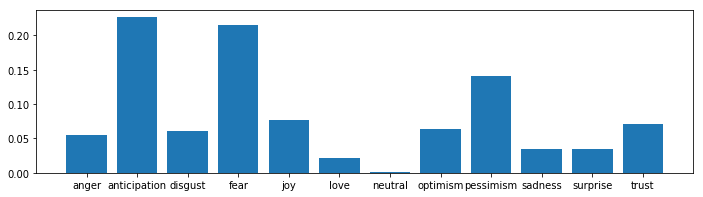

fgojgxz
[0.00089375 0.3463217  0.01744159 0.14281408 0.05561482 0.00849223
 0.00273398 0.19189076 0.02490432 0.05564653 0.06291065 0.09033554]


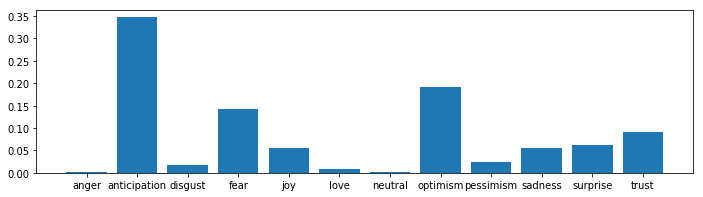

fkctrrh
[0.09848236 0.01802467 0.08061235 0.01106936 0.18912329 0.00423178
 0.37774277 0.01635447 0.13662866 0.01047672 0.04539202 0.01186158]


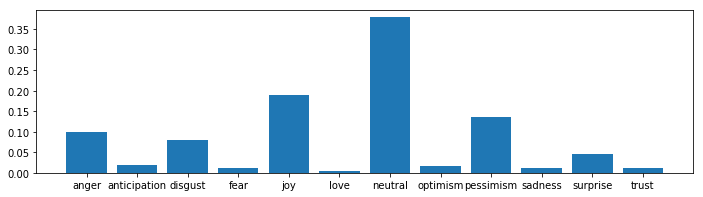

fkrzrws
[0.08437766 0.1636003  0.13278462 0.14866185 0.12372211 0.0162287
 0.00041322 0.09012507 0.0703762  0.07381162 0.02482833 0.07107028]


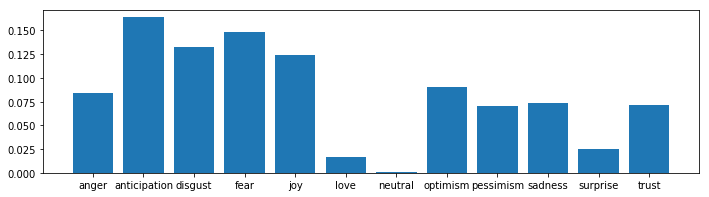

fkojkd7
[7.6353714e-02 5.3749293e-01 3.6931843e-02 5.6003049e-02 1.1742665e-02
 1.1228835e-03 1.1448725e-04 1.1367421e-01 6.0314611e-02 5.7621941e-02
 3.2956462e-02 1.5671138e-02]


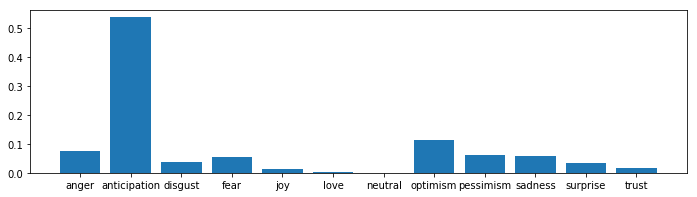

finybnr
[1.9626190e-01 1.4165723e-01 3.1573227e-01 2.8512156e-02 8.2589975e-03
 4.2201541e-03 2.8000028e-05 2.4914313e-02 1.7648526e-01 1.8190930e-02
 4.6916725e-03 8.1047095e-02]


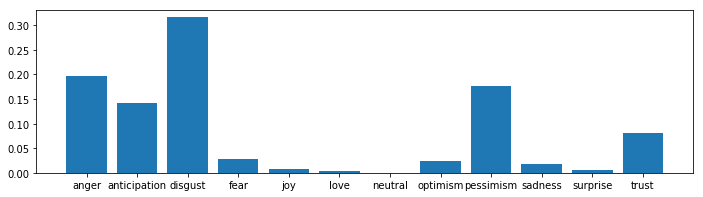

fkik2ex
[3.3287838e-02 4.2821532e-01 6.0345672e-02 9.1713786e-02 1.1105394e-02
 1.0220029e-02 2.1037178e-05 1.7415346e-01 9.9807270e-02 6.5252796e-02
 7.8155380e-03 1.8061772e-02]


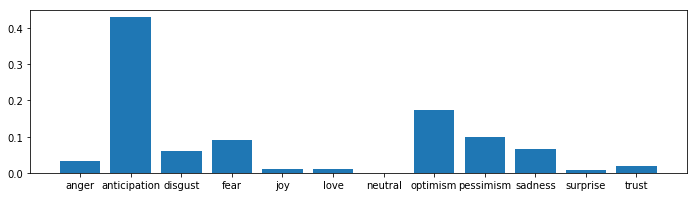

fl54mzj
[0.03407685 0.08950664 0.02276612 0.24742423 0.19707225 0.0080674
 0.0084865  0.13245034 0.11189056 0.03354033 0.06270709 0.05201156]


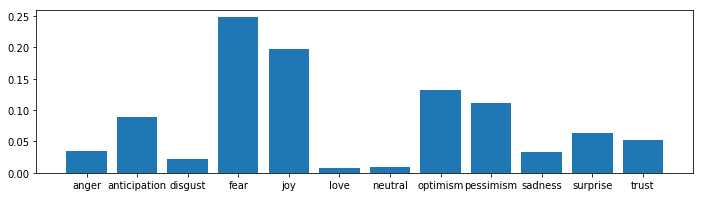

fjheg2p
[0.23877543 0.08568886 0.14580232 0.05155184 0.20154674 0.00473873
 0.01912117 0.04286749 0.09087744 0.05865694 0.02937173 0.0310012 ]


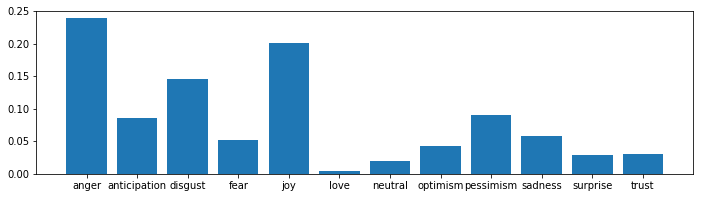

fl4wqrw
[1.4665338e-01 2.1398389e-01 1.3347138e-01 6.9922477e-02 3.4211826e-02
 1.8786093e-02 1.5304117e-04 7.2491698e-02 1.7223293e-01 5.9340201e-02
 1.9764308e-02 5.8988761e-02]


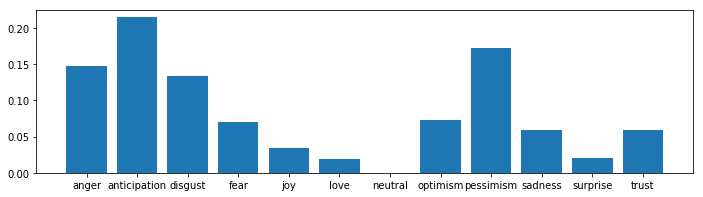

fhkvf0r
[6.8994023e-02 1.6644463e-01 2.3570879e-01 2.2902589e-01 1.2707382e-02
 6.5099724e-02 7.8762270e-08 3.8318511e-02 7.6880820e-02 4.9786557e-02
 1.7035674e-02 3.9997835e-02]


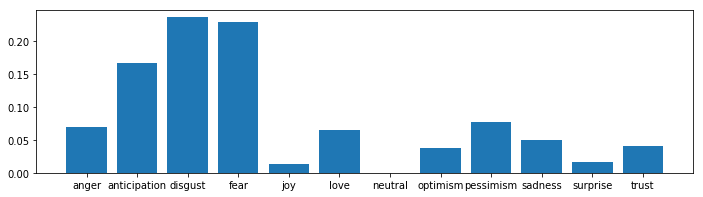

fldjpeg
[0.02912397 0.13945925 0.14048909 0.13321704 0.02036313 0.0135275
 0.00046476 0.02554607 0.25864413 0.06749763 0.0351213  0.13654613]


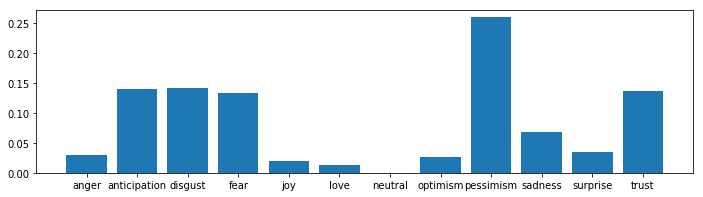

fkjuc9e
[5.1688501e-03 2.4588545e-01 1.2912726e-01 2.3854494e-01 3.3871601e-03
 4.3113800e-03 8.4757806e-07 2.2278839e-01 4.5876574e-02 3.3327807e-03
 1.8080433e-03 9.9768311e-02]


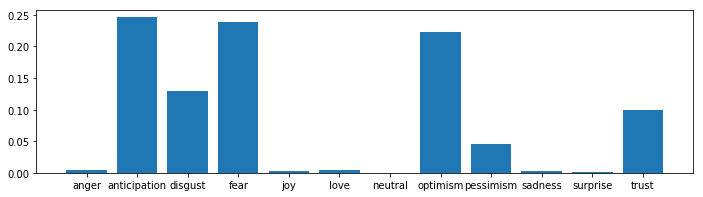

flaze0r
[0.03443937 0.25026152 0.03582833 0.10624564 0.08745103 0.00698782
 0.04350723 0.04825482 0.11166903 0.09700795 0.15666829 0.02167902]


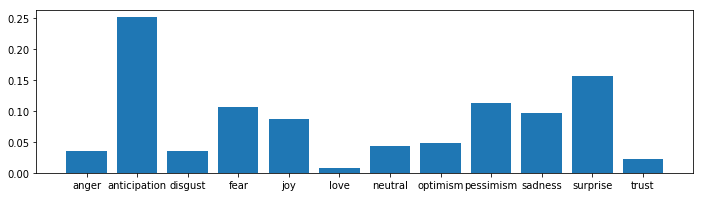

fkfhzpt
[2.1920322e-02 1.7322634e-01 5.2028608e-02 2.8111419e-01 9.6395072e-03
 4.0348470e-02 2.0667303e-05 1.1982212e-01 1.2719303e-01 7.7602550e-02
 2.6865475e-02 7.0218772e-02]


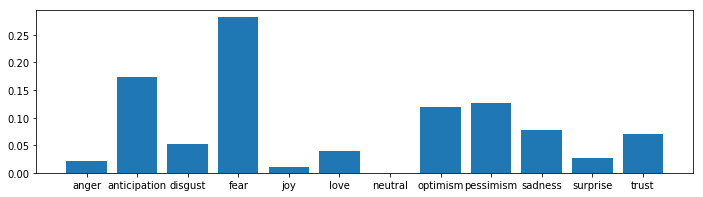

fkaai3a
[7.8970138e-03 1.7001341e-01 3.7062805e-02 5.6424655e-02 1.0236632e-02
 3.0636339e-02 2.5764223e-06 5.3330904e-01 1.1806948e-02 5.3982325e-02
 8.1912391e-03 8.0436997e-02]


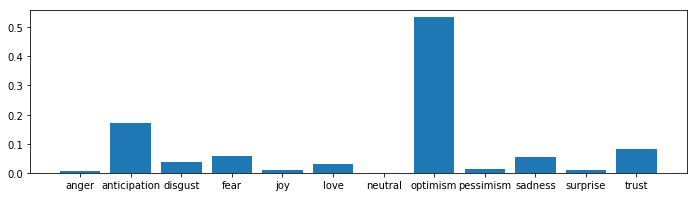

fimomsz
[0.0212001  0.19875704 0.16624165 0.21228494 0.02298823 0.00889366
 0.00028261 0.04097767 0.1682686  0.08363358 0.0251247  0.0513472 ]


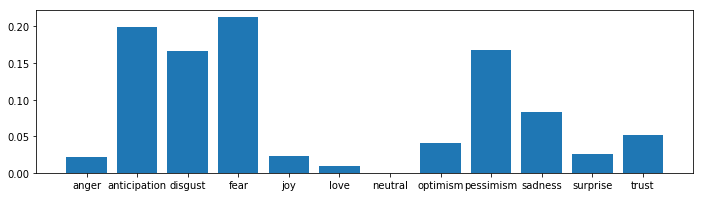

fj2oc0d
[4.2957675e-02 3.4173691e-01 8.1693210e-02 1.2561460e-01 1.1025323e-02
 1.9879090e-02 1.7405458e-05 1.5640894e-01 1.5363286e-01 1.7307656e-02
 4.9813623e-03 4.4744965e-02]


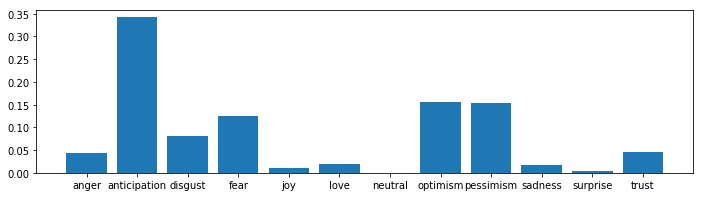

fg67mh0
[3.0369006e-02 1.3257143e-01 5.1214114e-02 4.0453017e-01 1.4113185e-02
 4.6094535e-03 7.7067074e-05 5.0845910e-02 2.2115402e-01 3.4851693e-02
 7.9998150e-03 4.7664050e-02]


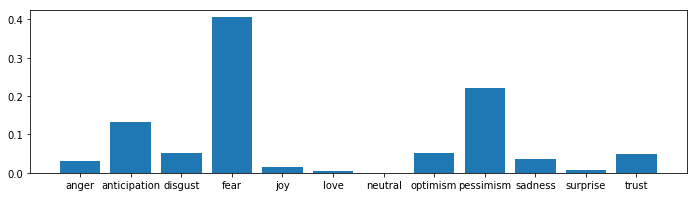

fjxta4g
[1.35536656e-01 2.42376029e-01 1.37789726e-01 1.70492679e-01
 1.28123919e-02 1.12284664e-02 2.91118158e-05 5.02858274e-02
 1.27760172e-01 8.20131078e-02 1.06751025e-02 1.90007053e-02]


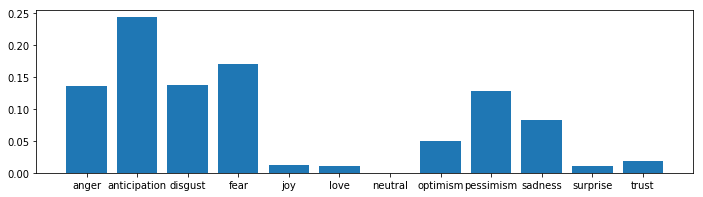

fjji71x
[7.9884015e-02 1.5413937e-01 1.7851336e-01 1.6197543e-01 7.3259897e-03
 1.1736104e-02 7.7331870e-06 9.1804728e-02 1.9869004e-01 9.0406150e-02
 9.0638641e-03 1.6453190e-02]


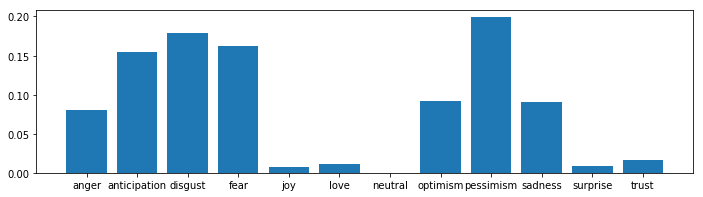

fkjd319
[0.08495532 0.26621673 0.1285955  0.10824699 0.08166057 0.01036969
 0.00145026 0.08234587 0.16647479 0.01911206 0.02561597 0.02495635]


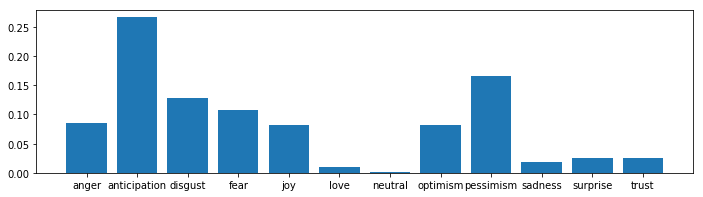

ffjd2mc
[8.2767509e-02 1.8538597e-01 1.3915995e-01 2.3630527e-01 3.7157850e-03
 2.5990443e-02 2.5043019e-07 9.6067652e-02 1.5112947e-01 5.5450547e-02
 4.1683931e-03 1.9858820e-02]


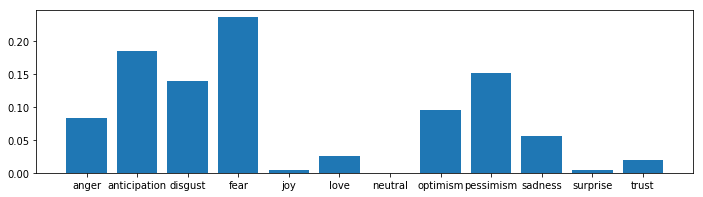

filgxn7
[6.1402380e-02 7.9162724e-02 2.4079567e-01 4.6217822e-02 1.1497152e-03
 4.1869047e-04 6.1205816e-07 8.1585199e-03 5.5171335e-01 3.6496047e-03
 1.1832115e-03 6.1477143e-03]


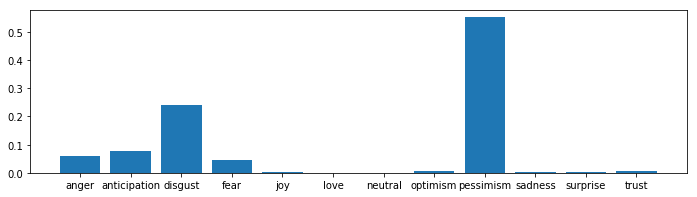

fijj3qh
[0.12310921 0.1885033  0.10932371 0.12434924 0.04063626 0.01156161
 0.00291848 0.0389266  0.2325425  0.03494007 0.03208183 0.06110711]


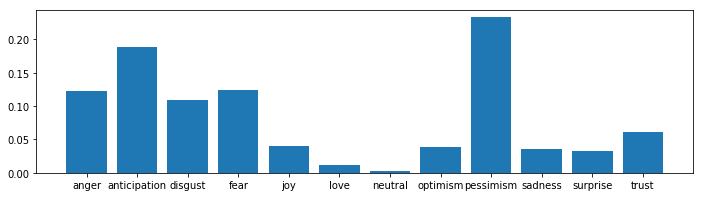

fle8li0
[0.01233382 0.12642422 0.01088561 0.12116066 0.15537639 0.00413356
 0.16425812 0.10005724 0.14945854 0.01556035 0.06719125 0.07316024]


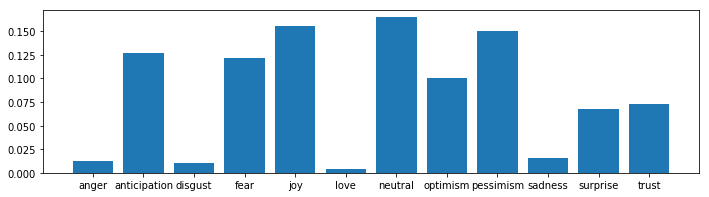

fl6c3sb
[0.00099337 0.23010476 0.00376121 0.12866981 0.03342113 0.00071843
 0.02055659 0.21978742 0.16572623 0.04083686 0.0306197  0.12480447]


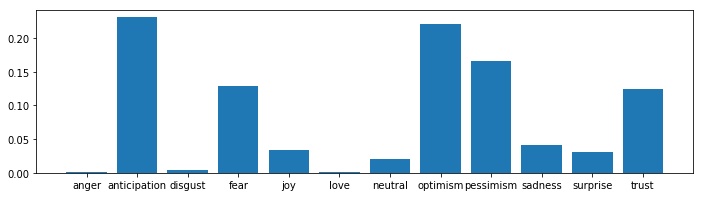

fghexrh
[5.8836255e-02 1.7910725e-01 4.3834496e-02 1.5717821e-01 1.9965032e-02
 6.3023488e-03 2.2153817e-04 6.8501651e-02 9.9813104e-02 2.9936820e-01
 1.1021202e-02 5.5850644e-02]


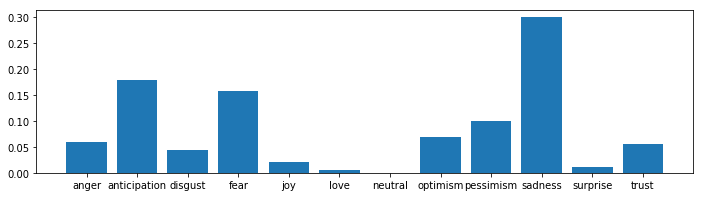

fk0187y
[1.2504034e-01 1.5016761e-01 1.3241978e-01 3.5562778e-01 5.4846685e-03
 1.5126033e-02 5.8517406e-07 2.2018764e-02 1.2843148e-01 4.6793368e-02
 6.2717400e-03 1.2617860e-02]


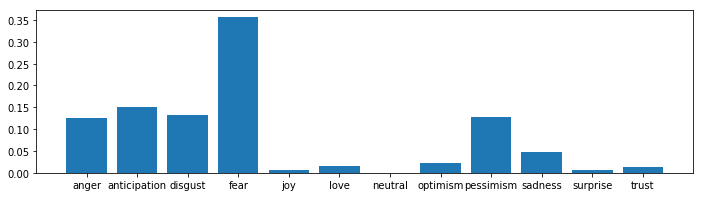

fj6yxgu
[0.0057177  0.23141535 0.01203082 0.17604569 0.03091586 0.00189687
 0.00783005 0.0726942  0.0886508  0.2058017  0.14068492 0.02631613]


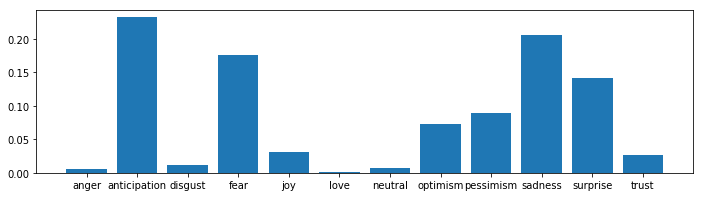

cwbvkzb
[1.8034799e-01 9.8914139e-02 2.4080478e-01 1.4612368e-01 7.9229409e-03
 1.5186410e-02 8.3081995e-06 2.3522552e-02 1.7991093e-01 9.1162026e-02
 5.1558162e-03 1.0940474e-02]


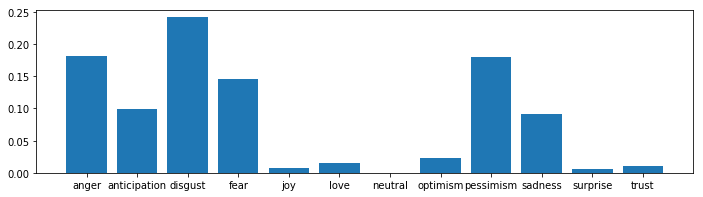

fkezyrx
[1.75503157e-02 2.36277163e-01 2.41357647e-02 1.20454654e-01
 5.16714342e-03 5.26014192e-04 3.39165184e-04 2.09852643e-02
 3.93207312e-01 7.51705542e-02 1.04738101e-01 1.44856435e-03]


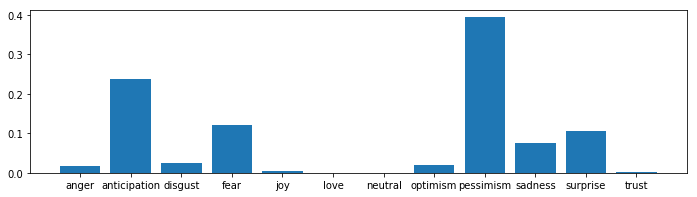

fk11z2y
[1.49259925e-01 1.83978021e-01 2.21519142e-01 1.12256974e-01
 3.44695337e-03 3.47658666e-03 3.75892455e-07 5.60271963e-02
 2.13784173e-01 4.19389158e-02 4.93910117e-03 9.37269069e-03]


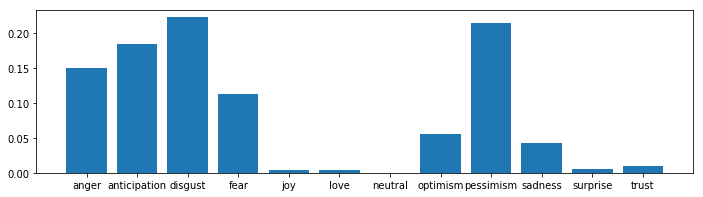

fkrbufu
[4.8451982e-02 2.3228277e-01 6.3267939e-02 2.0283836e-01 7.5777723e-03
 5.6470446e-03 6.9245179e-05 1.1921132e-01 1.5751797e-01 1.0370040e-01
 1.5568581e-02 4.3866593e-02]


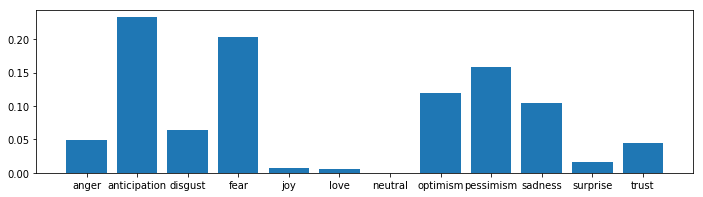

fkc9tm1
[2.4951058e-02 1.1777671e-01 5.4899268e-02 1.6789770e-01 6.0592759e-03
 2.2933763e-03 9.3418967e-06 6.2885709e-02 4.9220762e-01 4.0398680e-02
 1.7066853e-02 1.3554327e-02]


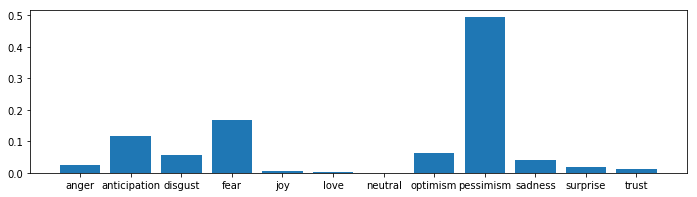

fh7ampy
[3.4628239e-02 1.8110639e-01 4.4728842e-01 4.8940852e-02 3.4835070e-04
 1.4704051e-03 6.4874243e-08 5.1132385e-02 2.1196695e-01 1.9192532e-02
 4.7167818e-04 3.4537902e-03]


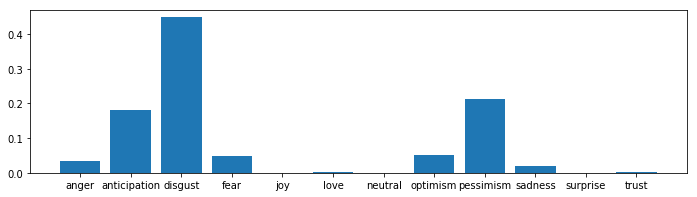

fjexp53
[0.04973286 0.43434763 0.02083721 0.07225403 0.05765701 0.00293972
 0.00397332 0.06619431 0.2466086  0.01256282 0.01169437 0.02119816]


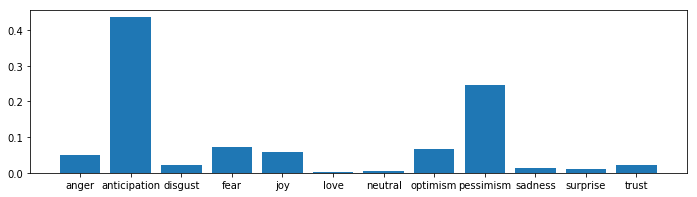

fk999pb
[3.37592587e-02 2.78819114e-01 9.80924964e-02 2.21767351e-01
 5.90721518e-03 6.35671709e-03 9.07737194e-06 7.55900741e-02
 1.17513254e-01 1.23851150e-01 4.90308739e-03 3.34311910e-02]


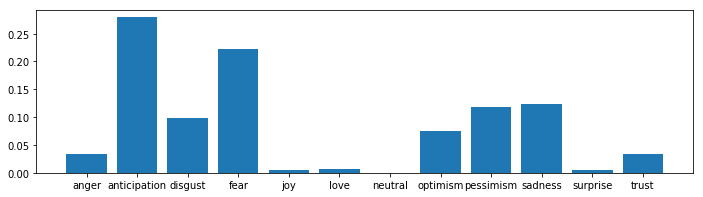

fldmipg
[2.5687680e-01 1.2958464e-01 1.9383645e-01 5.4849539e-02 6.1608725e-03
 3.2862169e-03 7.7514378e-06 4.2186614e-02 2.5854817e-01 4.3135393e-02
 3.6420925e-03 7.8854160e-03]


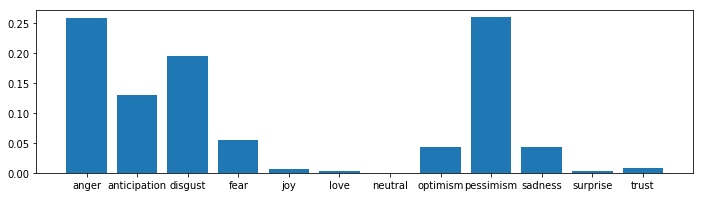

fl6qicb
[0.01448205 0.28548858 0.01705853 0.16511922 0.09771892 0.00398018
 0.00093405 0.13266051 0.0417171  0.07639469 0.0576323  0.10681388]


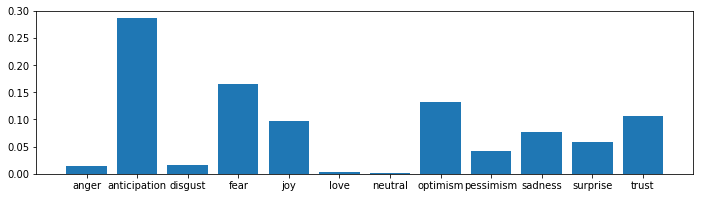

flaf87w
[5.7224706e-02 2.2496337e-01 7.7363096e-02 1.8332686e-01 3.5764845e-03
 1.5481540e-03 1.4728692e-05 2.6321901e-02 3.0128425e-01 1.0405232e-01
 1.2177829e-02 8.1463074e-03]


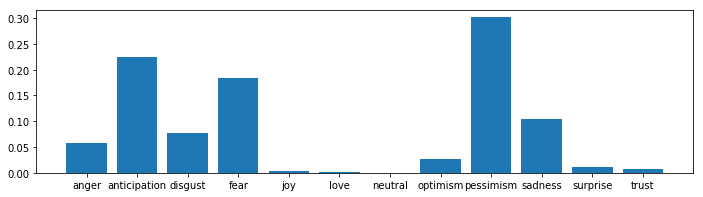

fldcxa7
[1.4759211e-01 1.8079971e-01 1.0847315e-01 2.8079620e-01 7.2249072e-03
 4.9588294e-03 7.8743460e-06 1.8189564e-02 7.0073947e-02 1.6042629e-01
 2.6327467e-03 1.8824659e-02]


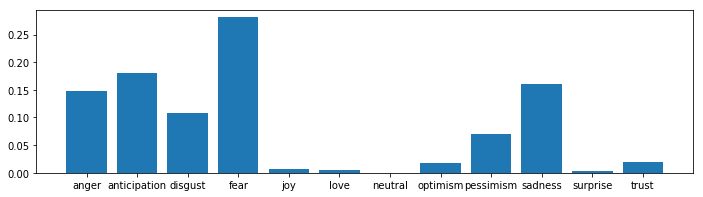

fj5t6hq
[0.01214887 0.37324423 0.01063204 0.15070894 0.06335975 0.0005313
 0.02066978 0.0272454  0.08606941 0.17741306 0.06612873 0.01184846]


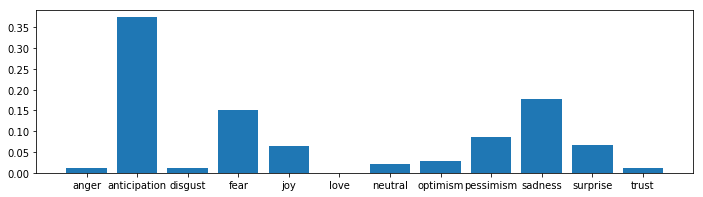

fj2lri0
[0.00694046 0.16525458 0.00801327 0.08591065 0.17501293 0.01085604
 0.04247276 0.19464587 0.13303937 0.02774332 0.0718556  0.07825509]


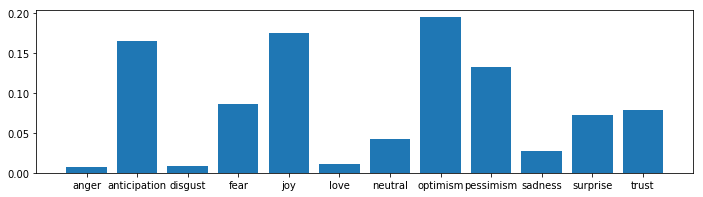

fkgjjye
[0.00324424 0.24737525 0.00452343 0.25122687 0.07052334 0.00255444
 0.00941952 0.12341835 0.08556227 0.11994968 0.03218615 0.05001639]


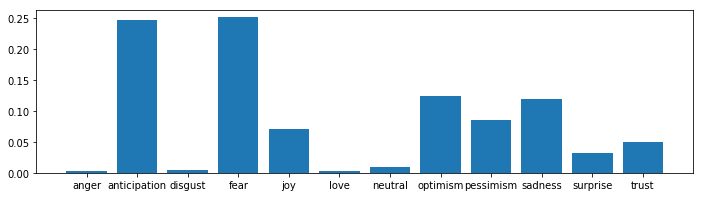

fl6l671
[2.5870770e-02 2.5358295e-01 3.9683357e-02 2.2849165e-01 2.1221060e-02
 9.2609264e-03 5.3093052e-05 1.1347988e-01 1.5574606e-01 9.3726836e-02
 3.3466950e-02 2.5416456e-02]


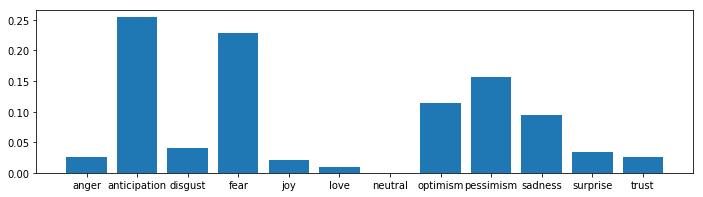

fh2ayco
[0.00440402 0.24607211 0.012481   0.34220818 0.02477193 0.00197377
 0.00284368 0.04989533 0.1517952  0.06816425 0.06637537 0.02901509]


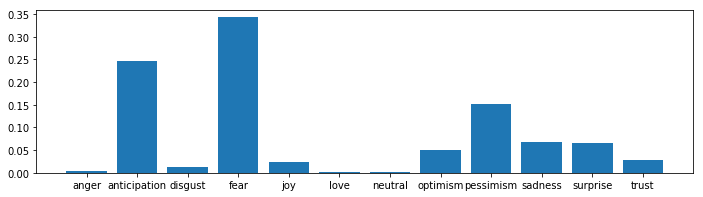

fjaedgi
[2.9484121e-02 3.0354026e-01 5.6904506e-02 1.2981866e-01 1.1057547e-02
 2.2608945e-03 2.3077477e-05 7.8500830e-02 3.5181841e-01 1.9316649e-02
 2.1577885e-03 1.5117145e-02]


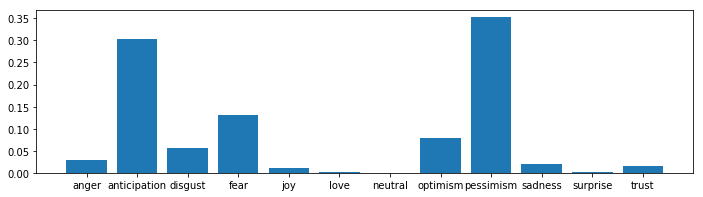

flayk04
[0.00608424 0.3282312  0.00977897 0.3595819  0.01070072 0.00127556
 0.00081374 0.06249495 0.12583452 0.07075983 0.01436717 0.0100773 ]


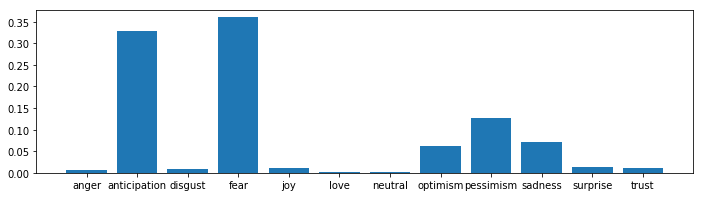

fiz0bmx
[0.00086703 0.11190978 0.0287991  0.06051143 0.23082957 0.03263943
 0.10526435 0.13671874 0.04988531 0.01437746 0.09636774 0.13183007]


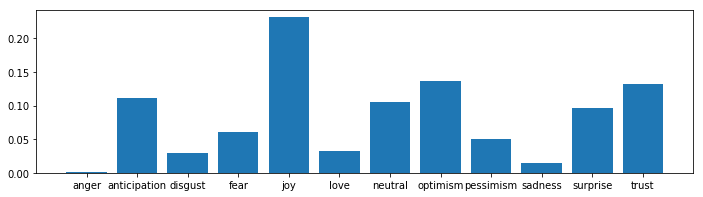

fkt20dk
[1.7269012e-02 2.2885902e-01 4.6232343e-02 1.8581921e-01 5.5983677e-03
 4.1155708e-03 5.1690677e-05 1.5967914e-01 2.2504385e-01 8.7949194e-02
 1.4554057e-02 2.4828473e-02]


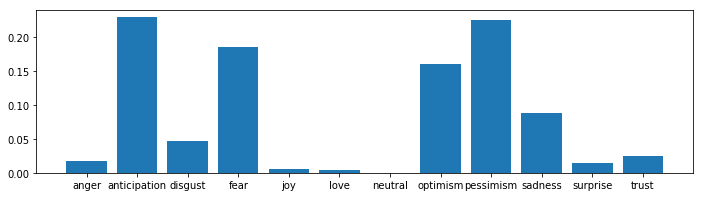

fjluhxu
[1.46400332e-02 2.33296454e-01 2.07242779e-02 2.09312037e-01
 2.93709943e-03 1.57234992e-03 3.01489363e-05 3.02972626e-02
 3.45625013e-01 1.03341445e-01 9.97208618e-03 2.82518566e-02]


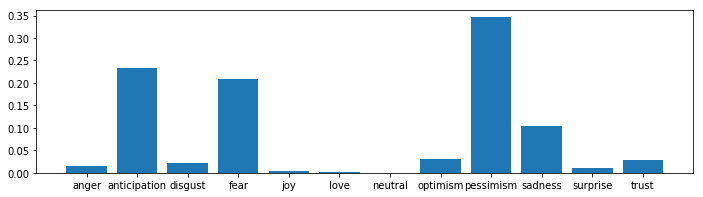

fj841ov
[1.1909406e-01 2.8919572e-01 1.2929271e-01 6.3347630e-02 4.5977891e-03
 3.9439839e-03 4.3866214e-05 3.7526734e-02 2.8579065e-01 1.6630314e-02
 4.0974822e-03 4.6439085e-02]


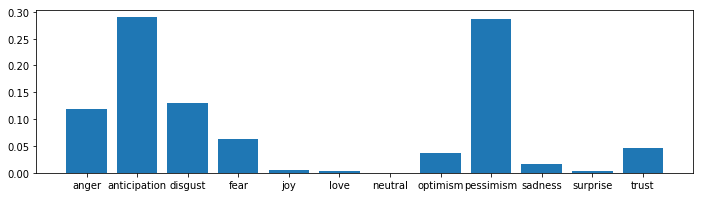

fil1py2
[1.9850866e-01 6.4720266e-02 3.6240080e-01 7.0867546e-02 2.8609319e-03
 2.3590676e-03 2.0594250e-06 2.0215821e-03 2.6317081e-01 2.2956513e-02
 7.5482293e-03 2.5835081e-03]


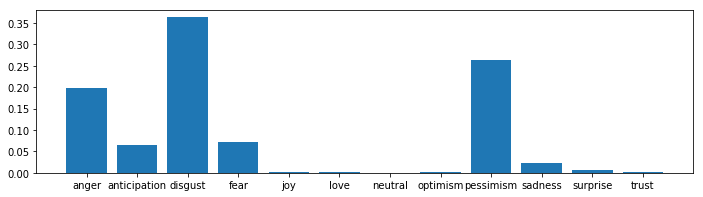

fkax939
[0.06576812 0.26432976 0.05397426 0.10924245 0.04556131 0.01003845
 0.00079449 0.04898533 0.22601096 0.11298394 0.05346963 0.00884121]


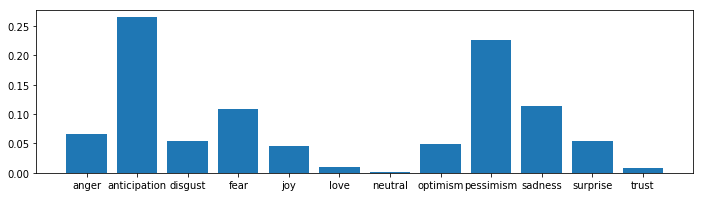

ffxau9q
[4.4003975e-02 3.7684488e-01 8.0058247e-02 2.3608299e-02 1.6400436e-02
 9.7793294e-03 3.4299566e-04 1.6086739e-01 1.9829275e-01 2.2461977e-02
 1.2694273e-02 5.4645449e-02]


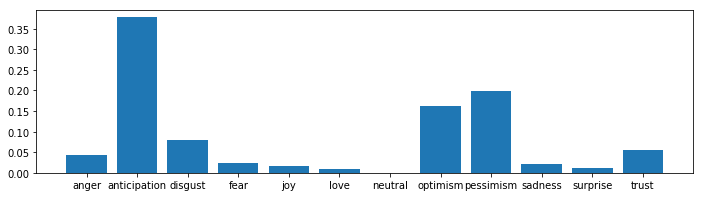

fjpd82l
[2.6261998e-02 2.0177637e-01 5.6632515e-02 1.4386210e-01 1.4394046e-02
 1.9444632e-03 4.0056013e-05 9.7147495e-02 2.7513587e-01 1.2993303e-01
 2.9521162e-02 2.3350840e-02]


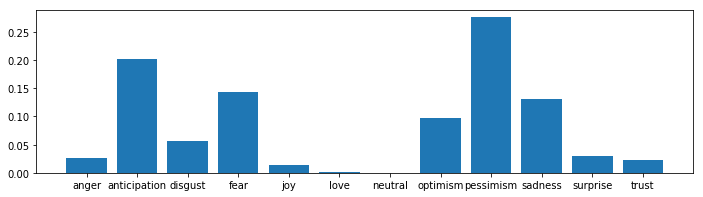

fl3meqx
[1.81587078e-02 1.54584929e-01 3.06777898e-02 2.13222831e-01
 1.89291872e-02 1.19292652e-02 1.22463034e-05 2.26264313e-01
 1.49644271e-01 5.98989725e-02 1.48127815e-02 1.01864815e-01]


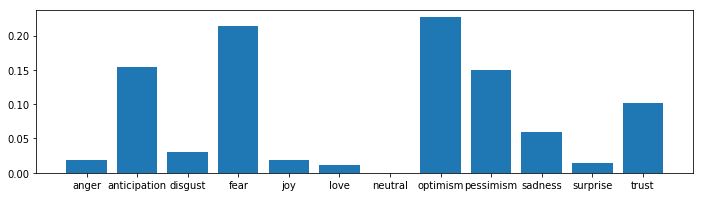

fjxf5wf
[8.3803702e-03 4.9427384e-01 1.8038614e-02 1.7051199e-01 6.6477025e-04
 1.1106064e-03 2.6988969e-06 1.1799956e-01 1.4995059e-01 1.8223038e-02
 4.1521289e-03 1.6691724e-02]


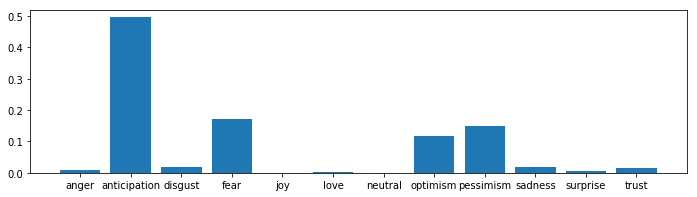

fjwbsv5
[1.4319742e-02 5.0921994e-01 1.9097131e-02 2.1444252e-01 9.3726259e-05
 3.1347125e-05 1.0380186e-07 7.8456542e-03 1.3060303e-01 1.0082752e-01
 1.6344693e-03 1.8849001e-03]


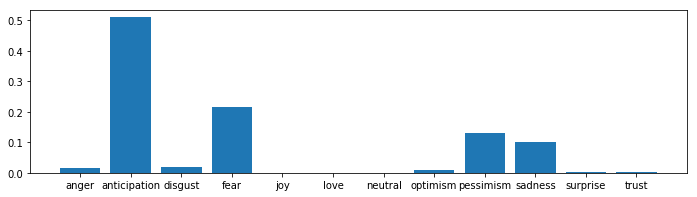

fic0rbf
[7.2186440e-02 3.1386375e-01 1.4052153e-01 2.6005967e-02 8.3348947e-03
 1.4366307e-02 9.9525096e-06 2.5034052e-01 1.1680544e-01 9.4668111e-03
 3.9345636e-03 4.4163913e-02]


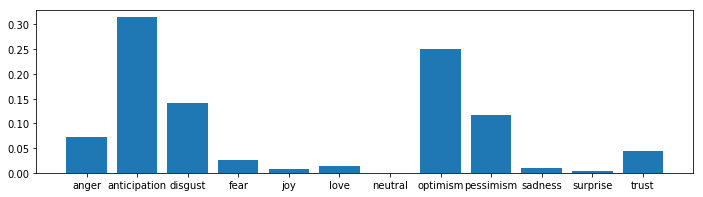

fgh79rq
[1.7670078e-02 1.6954479e-01 8.5739531e-02 2.5877187e-01 2.6161568e-02
 2.7369121e-02 1.3039057e-04 2.3330726e-01 6.8500400e-02 3.1069916e-02
 2.6847132e-02 5.4887936e-02]


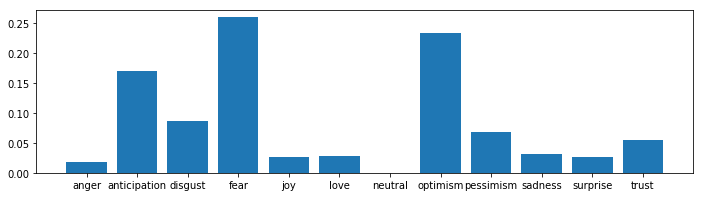

fj0oz9m
[6.9537938e-02 1.4507465e-01 2.9157087e-01 5.3912561e-02 6.8140584e-03
 1.8978415e-02 1.0123765e-06 1.0359175e-01 2.6892820e-01 2.0167394e-02
 7.2836187e-03 1.4139485e-02]


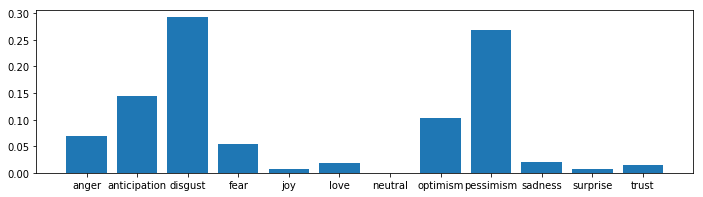

fkilmgg
[1.61541745e-01 1.47745863e-01 1.66492477e-01 5.18850833e-02
 2.51819454e-02 1.66067947e-02 1.08288965e-04 5.72466850e-02
 2.54822880e-01 5.09798601e-02 2.73890514e-02 3.99992801e-02]


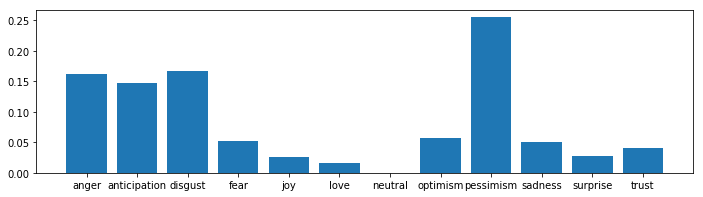

fkxd1zp
[5.6973216e-03 1.4479500e-01 1.1964126e-01 3.6456966e-01 2.0507961e-03
 4.4147419e-03 6.4333148e-07 1.0778140e-01 1.6089472e-01 2.7750507e-02
 1.1408823e-02 5.0995141e-02]


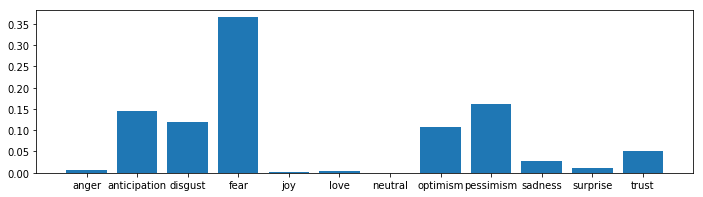

fl3x53u
[5.7349417e-02 2.1951857e-01 4.3092269e-02 2.5070339e-01 3.1560692e-03
 1.6394174e-03 2.2242235e-05 4.7860213e-02 2.6851198e-01 8.3083831e-02
 6.6817603e-03 1.8380791e-02]


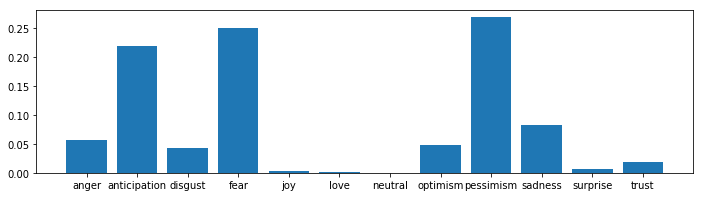

fjfzqgm
[4.5263622e-02 3.7002340e-01 6.8094544e-02 1.7805929e-01 3.1809844e-02
 2.2138408e-03 2.4441103e-04 5.0336044e-02 1.6113532e-01 4.4343151e-02
 1.2909303e-02 3.5567295e-02]


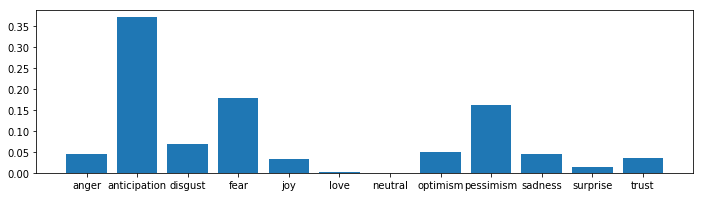

fib1wg0
[0.00538622 0.31070492 0.10206756 0.04144276 0.03340985 0.00666555
 0.00075235 0.13102202 0.13771084 0.09937648 0.04632954 0.08513196]


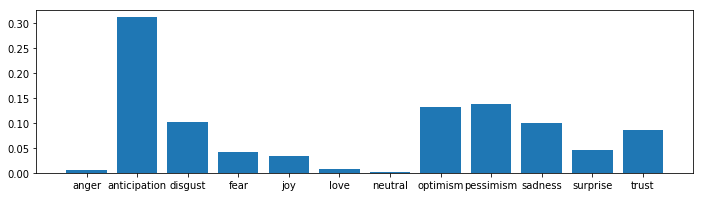

fkdk1r0
[0.00577592 0.09938768 0.01860862 0.13480853 0.24100733 0.02848323
 0.03365993 0.11578698 0.0467571  0.03180748 0.16849548 0.0754217 ]


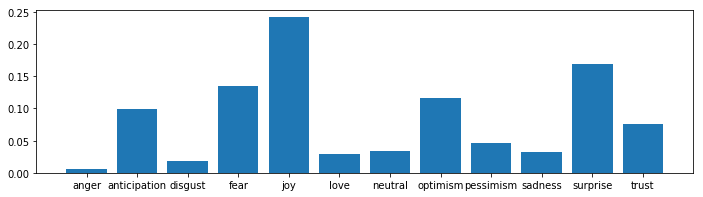

fk2qvld
[1.50384098e-01 1.01367064e-01 2.58300424e-01 4.14273888e-02
 6.30837977e-02 2.90521607e-02 1.63665536e-04 8.18404481e-02
 1.63297966e-01 4.31180187e-02 4.12926786e-02 2.66723130e-02]


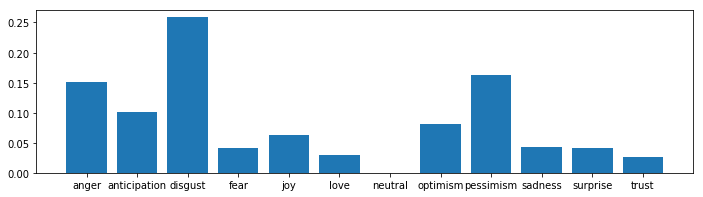

fjqal94
[2.15675384e-01 1.73119098e-01 2.42278054e-01 1.10198542e-01
 5.80806378e-03 4.69116308e-03 1.61368166e-06 4.82505113e-02
 1.07846886e-01 6.54189065e-02 1.78253197e-03 2.49293093e-02]


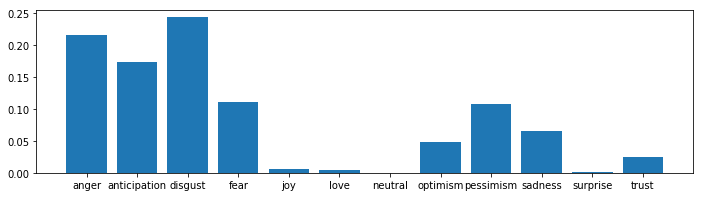

fl882zd
[1.3111161e-01 2.6338506e-01 1.1135167e-01 9.1601148e-02 1.2761140e-02
 6.2446822e-03 1.9407153e-05 1.3705488e-02 3.0131003e-01 5.4610197e-02
 2.8918684e-03 1.1007653e-02]


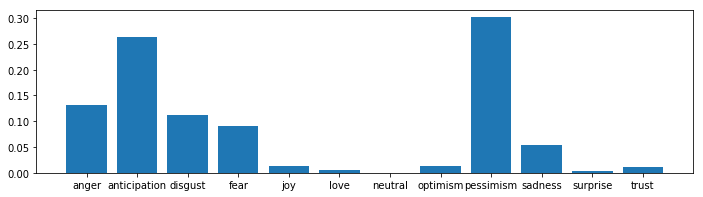

fkd4fwf
[0.00339457 0.30337185 0.00448352 0.358368   0.01741199 0.00121136
 0.01189973 0.04278741 0.11071847 0.08034973 0.04227543 0.02372799]


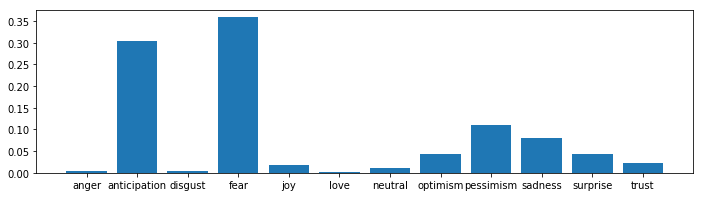

fg3ev48
[0.02779614 0.21556503 0.01840576 0.11789805 0.17114821 0.00248617
 0.08199172 0.03332835 0.08830328 0.10402717 0.07275221 0.06629791]


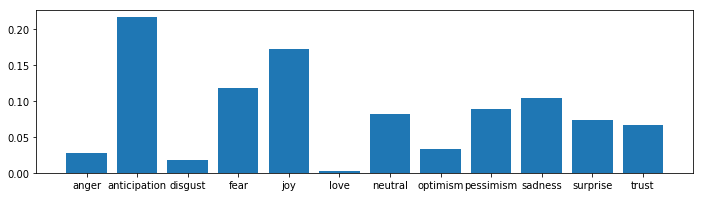

fkbekzx
[1.5075186e-01 1.6911592e-01 1.8555272e-01 1.3979179e-01 6.6984678e-03
 9.2768334e-03 1.7562961e-05 3.8691793e-02 2.0842476e-01 5.6522571e-02
 8.7817051e-03 2.6373968e-02]


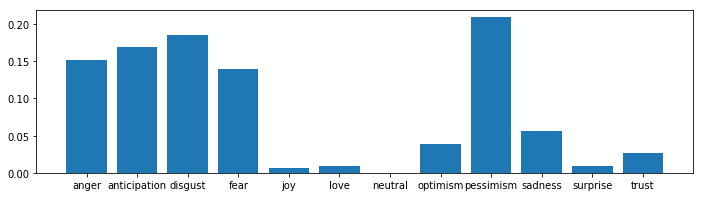

fkdm2cf
[0.10313039 0.12691095 0.14446217 0.06654067 0.08052094 0.01485715
 0.00145415 0.07121442 0.18404533 0.10706852 0.06402209 0.03577323]


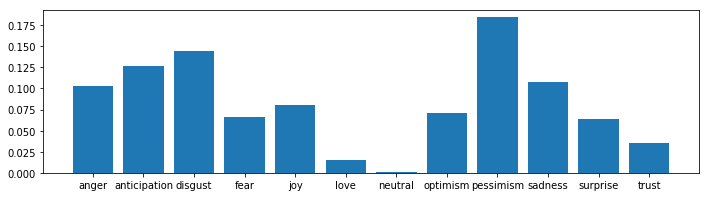

fktisey
[0.01153507 0.07537182 0.07544703 0.07164013 0.24416544 0.01402142
 0.01441028 0.11156882 0.06201765 0.08979937 0.0705103  0.15951268]


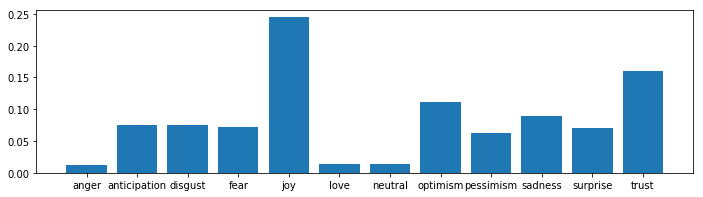

fla9pji
[1.2899031e-01 2.0869994e-01 2.8471532e-01 4.9428307e-02 2.9101580e-02
 5.2484102e-03 1.9196685e-05 3.3721998e-02 1.4340708e-01 7.0164882e-02
 7.4922484e-03 3.9010685e-02]


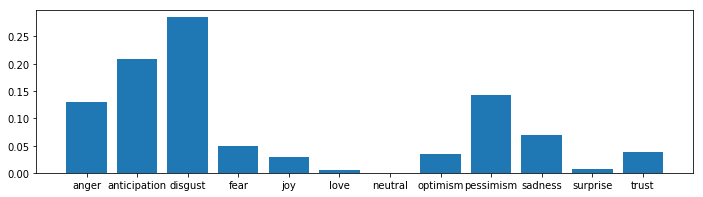

fiaao8h
[7.7008670e-03 2.0583236e-01 4.4204962e-02 1.4220564e-01 1.1952045e-02
 3.3918701e-03 2.1729872e-04 9.8338671e-02 2.6725689e-01 1.4277823e-01
 3.2019187e-02 4.4101939e-02]


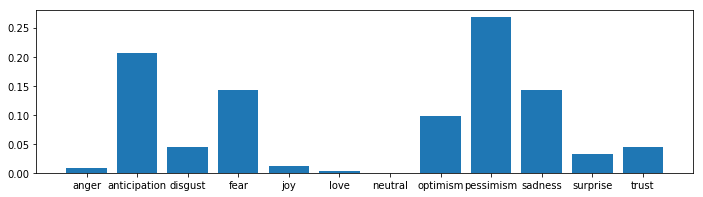

fj9as9b
[0.00138625 0.32701227 0.00528271 0.20394026 0.03673618 0.00884438
 0.00041873 0.16077985 0.05388819 0.11373315 0.0184954  0.06948247]


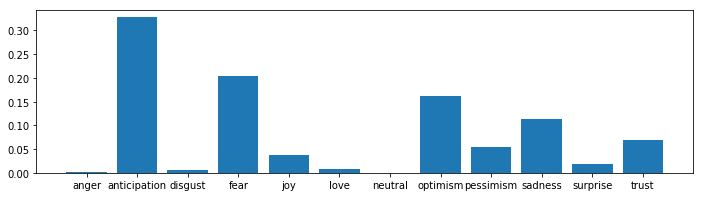

fk98j9m
[2.5408834e-01 9.6235976e-02 1.4688084e-01 9.4666645e-02 4.6742717e-03
 2.2596966e-03 1.4529186e-05 1.9061033e-02 3.3884463e-01 3.3765703e-02
 1.8279975e-03 7.6803160e-03]


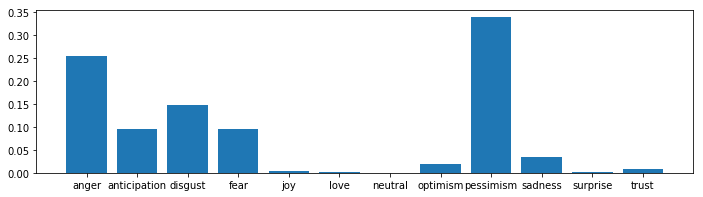

fgj2zqh
[4.61939676e-03 3.25289994e-01 5.01495320e-03 2.37271469e-02
 2.10661501e-01 7.62777356e-03 2.88788317e-04 3.70462865e-01
 1.80982444e-02 1.32914465e-02 5.08251181e-03 1.58353485e-02]


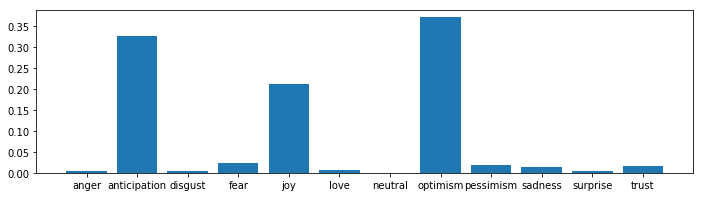

fgan688
[9.4829071e-03 9.0943575e-03 1.8477336e-02 1.1507384e-02 3.0342707e-01
 7.6557999e-03 1.6990690e-06 6.2181890e-01 3.7048967e-03 1.1209591e-03
 4.3750172e-03 9.3336944e-03]


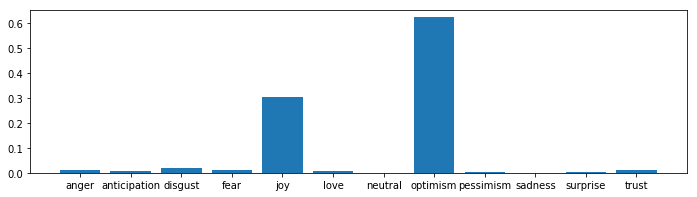

fkrv1y5
[5.79376228e-06 2.20332425e-02 1.15176979e-02 1.36253060e-04
 6.89801236e-04 6.52585208e-01 1.12349435e-10 2.92084277e-01
 1.52761888e-04 1.59963583e-05 3.46453162e-04 2.04324592e-02]


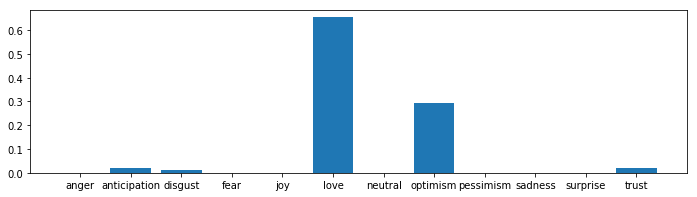

fj7n0qk
[6.0317352e-02 1.5245605e-01 1.0683554e-01 8.0496453e-02 1.3413458e-03
 9.9551296e-05 1.3359961e-04 1.2364725e-03 5.2497089e-01 6.4420596e-02
 5.7345405e-03 1.9576228e-03]


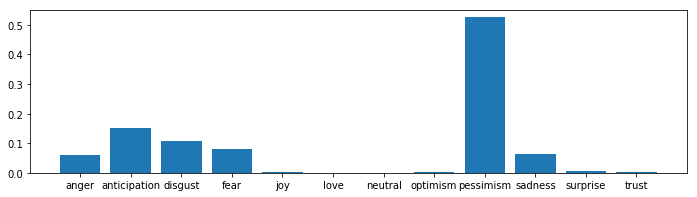

fl7hg7m
[1.9671576e-01 9.2676736e-02 2.8843984e-01 1.2573721e-01 2.7573893e-02
 2.3608012e-02 3.4974022e-05 1.9644378e-02 1.3852456e-01 4.2665388e-02
 8.7391362e-03 3.5640214e-02]


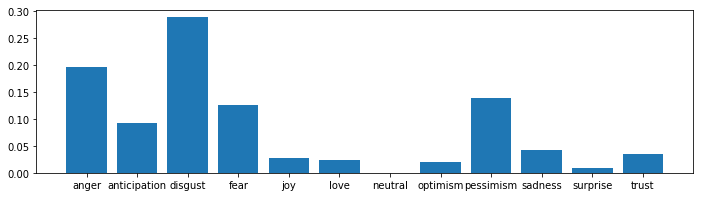

fld9yyw
[7.7995047e-02 5.8490448e-02 3.0207381e-01 6.7777954e-02 7.4421369e-02
 3.2436054e-02 1.6739925e-04 3.0343739e-02 1.1712474e-01 9.9812046e-02
 1.3025056e-01 9.1068363e-03]


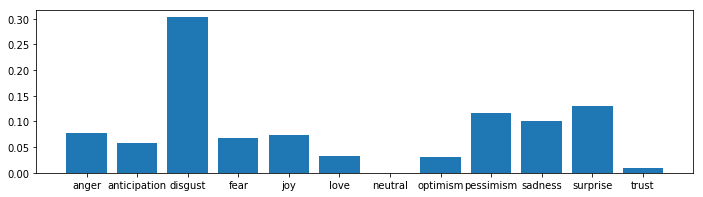

fj54tkg
[4.2236418e-02 1.8170813e-01 8.5940473e-02 3.0793381e-01 1.8870663e-02
 1.6207701e-02 4.9231050e-05 9.7203359e-02 9.6759796e-02 8.2866907e-02
 2.4003513e-02 4.6220019e-02]


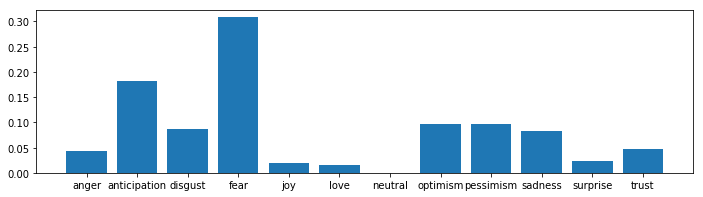

fka4im2
[8.1201922e-03 1.4535378e-01 3.0547893e-02 4.9205098e-01 5.7873144e-03
 7.1996958e-03 1.3589006e-06 9.0633087e-02 4.8848245e-02 1.3438873e-01
 1.0801336e-02 2.6267311e-02]


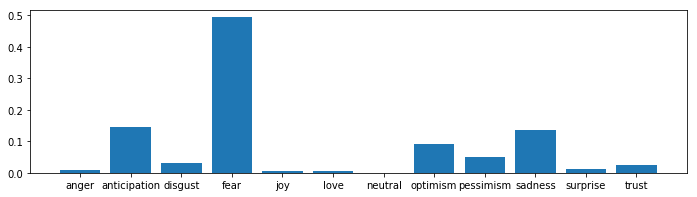

fkmvcbw
[1.4024614e-01 1.5997013e-01 2.0311444e-01 8.8111991e-03 1.2200750e-01
 4.7117788e-02 1.0522843e-05 2.2271487e-01 1.4406861e-02 8.3923154e-03
 3.0948827e-02 4.2259380e-02]


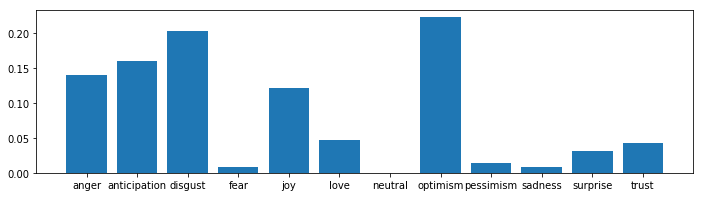

fjlsjwl
[8.7370805e-02 2.4041301e-01 1.0868298e-01 1.6610008e-01 4.4365954e-03
 1.0754376e-03 6.5512904e-05 8.0685141e-03 2.4847502e-01 1.2349983e-01
 6.2519652e-03 5.5601648e-03]


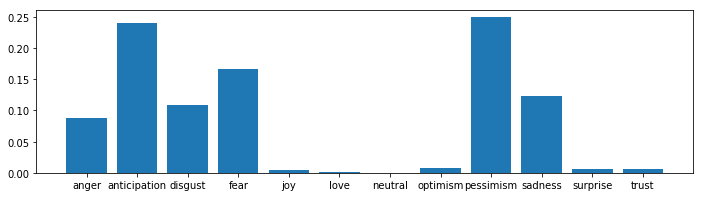

fkpy0b0
[9.2197739e-02 2.0811930e-01 1.0893287e-01 1.3796544e-01 2.7772212e-02
 1.6781224e-02 6.0060145e-05 3.9473448e-02 1.6710168e-01 5.2749824e-02
 1.3185072e-01 1.6995559e-02]


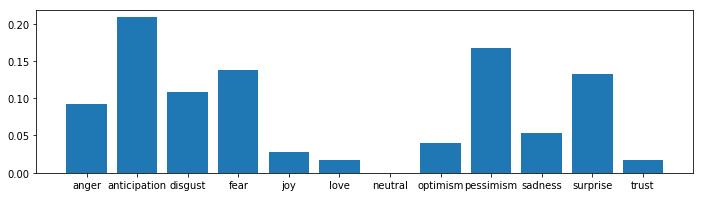

flaii0i
[2.6867043e-02 3.0815294e-01 5.5880833e-02 2.6285914e-01 4.2921784e-03
 6.0684176e-04 2.2052413e-05 1.1830843e-02 2.5304893e-01 6.9494545e-02
 3.6926989e-03 3.2519561e-03]


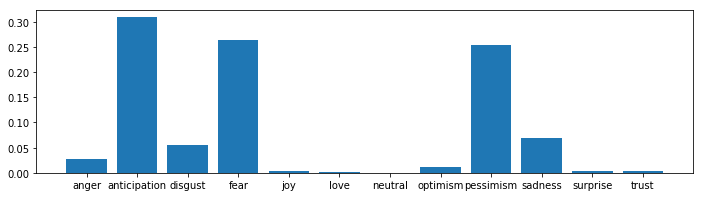

fki45u1
[2.0733342e-01 1.2343207e-01 1.8648694e-01 3.8382780e-02 4.3297890e-03
 4.0242043e-03 1.8996036e-05 9.4381627e-03 3.9634663e-01 1.4564975e-02
 6.5280581e-03 9.1140596e-03]


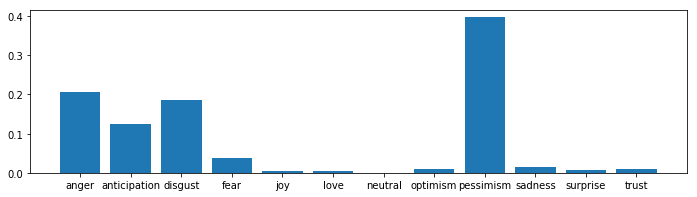

fi11uta
[1.9850866e-01 6.4720266e-02 3.6240080e-01 7.0867546e-02 2.8609319e-03
 2.3590676e-03 2.0594250e-06 2.0215821e-03 2.6317081e-01 2.2956513e-02
 7.5482293e-03 2.5835081e-03]


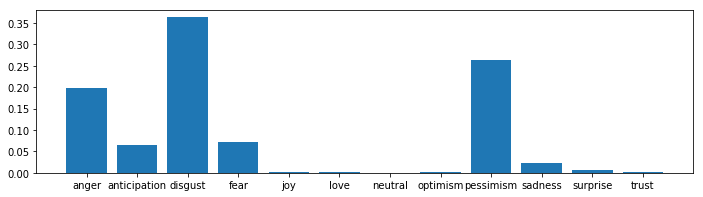

fkowyni
[1.9052824e-02 1.6353369e-01 5.7468530e-02 8.1054166e-02 8.2011424e-02
 4.6099871e-02 2.5121803e-05 3.6681914e-01 5.8622036e-02 2.8940359e-02
 1.1797107e-02 8.4575713e-02]


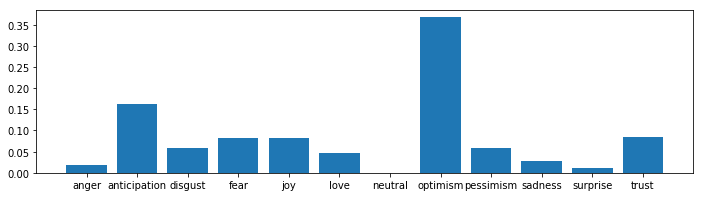

fjck737
[3.87459934e-01 3.88957746e-02 3.40309501e-01 2.63218619e-02
 1.47665683e-02 1.72844473e-02 7.95198730e-07 2.23781969e-02
 1.03541024e-01 2.14110576e-02 1.93902128e-03 2.56917961e-02]


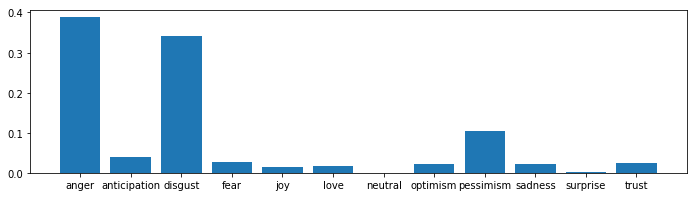

fk7cdqm
[2.3407346e-01 1.3261452e-01 2.2060609e-01 5.1688332e-02 3.9749281e-03
 3.1806598e-03 4.3073042e-06 3.5688233e-02 2.4381746e-01 5.1204748e-02
 4.4558779e-03 1.8691329e-02]


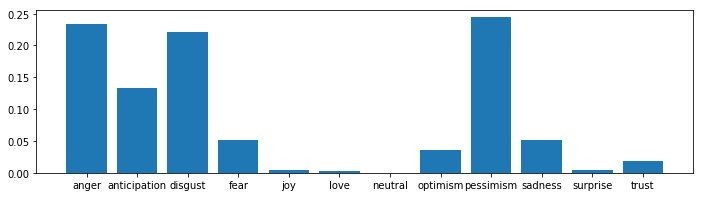

fklfokv
[0.05287589 0.08828656 0.1813981  0.06288565 0.07221118 0.01041071
 0.00059871 0.19818835 0.21594557 0.03822236 0.01907285 0.05990405]


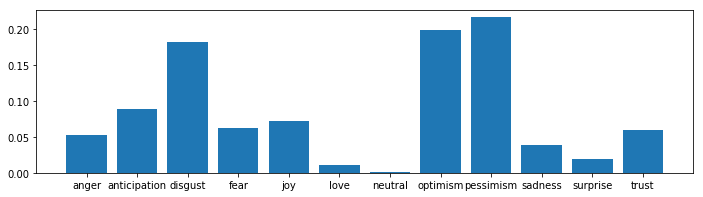

fjyeu4c
[7.1136601e-02 1.8345632e-01 9.0595998e-02 4.2384110e-02 4.8056532e-02
 4.5798749e-02 1.5254483e-04 1.7302254e-01 8.4116340e-02 2.5513748e-02
 8.9719407e-03 2.2679456e-01]


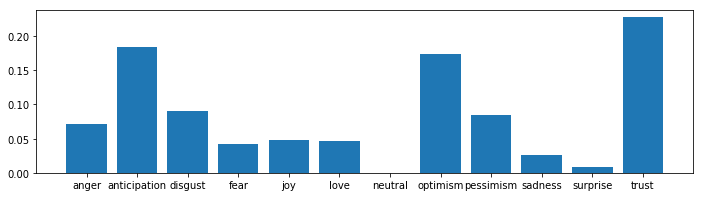

fkdzjzi
[0.01005422 0.29583436 0.03964897 0.15017587 0.06668236 0.0132235
 0.00094618 0.18563645 0.07940488 0.05259456 0.03723954 0.06855916]


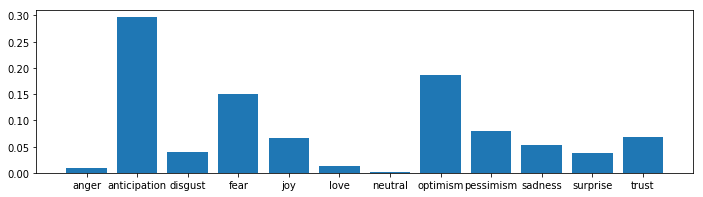

fho2abj
[1.1572096e-01 2.1840365e-01 1.4422715e-01 2.0282157e-01 4.0753707e-03
 4.1368627e-03 5.2298078e-06 4.1662354e-02 1.7935537e-01 4.7834672e-02
 3.3598489e-03 3.8397055e-02]


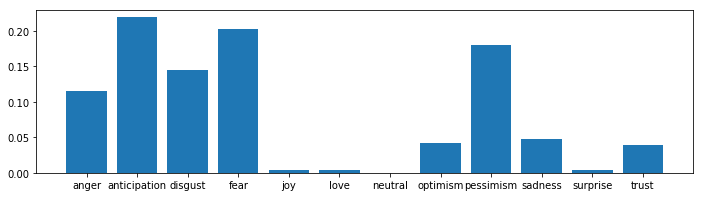

fjht1vn
[0.00040552 0.1982167  0.00165318 0.350841   0.02079347 0.00454748
 0.0006707  0.21882361 0.09343328 0.03810875 0.03417934 0.03832692]


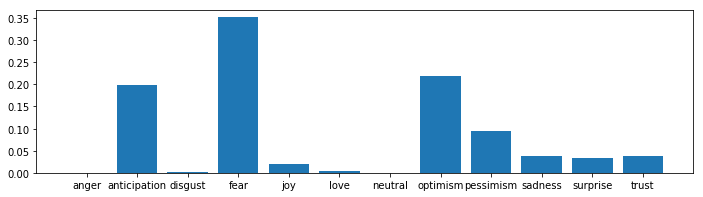

fgualg9
[6.6375881e-03 5.4681128e-01 1.5272580e-02 8.5275434e-02 3.0050894e-02
 3.7623220e-04 5.8225407e-03 2.6399866e-02 2.0401520e-01 2.1030873e-02
 5.1425159e-02 6.8823406e-03]


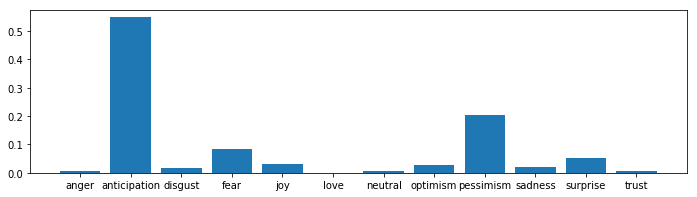

fkk930a
[0.20507874 0.14181283 0.12803619 0.03812229 0.10203883 0.04449843
 0.00030149 0.11288546 0.10921783 0.03079518 0.0436005  0.04361227]


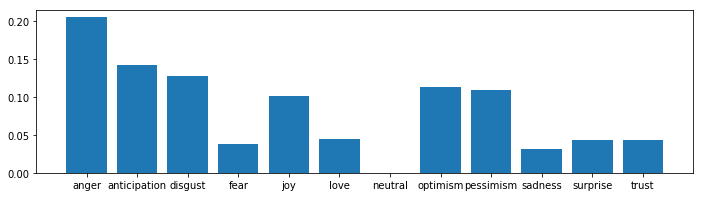

ffsda5l
[7.6000944e-02 1.9728625e-01 1.3154590e-01 1.6058785e-01 9.3598390e-04
 5.1065721e-03 3.0301564e-07 5.6141790e-02 2.8161946e-01 7.9007909e-02
 3.1312050e-03 8.6358953e-03]


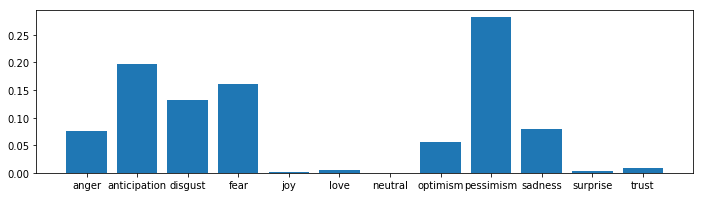

fko5wvd
[8.1284210e-02 1.7508359e-01 1.8295102e-01 2.8580889e-01 4.1660797e-02
 2.4136776e-02 1.9045294e-05 5.0580848e-02 8.7121993e-02 4.1988201e-02
 9.0936869e-03 2.0270973e-02]


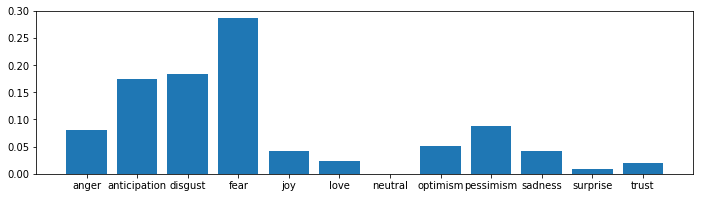

fkaywi7
[0.0261667  0.12568782 0.05581214 0.23036845 0.03531921 0.017927
 0.00035427 0.128357   0.27031675 0.01651252 0.01490039 0.07827769]


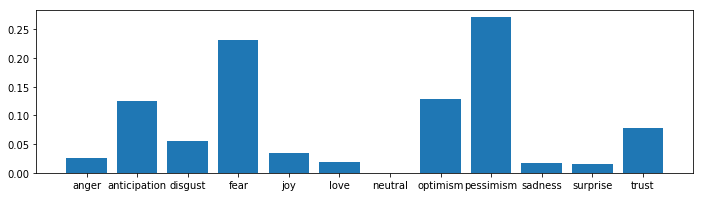

flcpegb
[5.6294844e-02 7.6434009e-02 1.8467459e-01 1.2705764e-01 5.1111281e-03
 7.3346123e-03 3.3349932e-06 1.5741707e-01 3.2794574e-01 1.1751201e-02
 4.9235527e-03 4.1052286e-02]


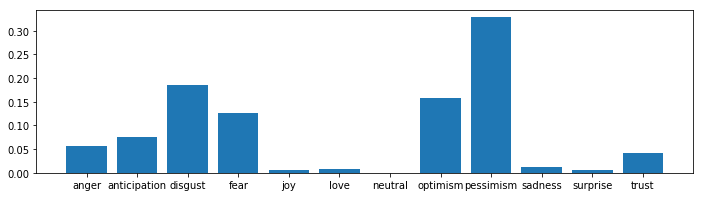

fkjxibk
[3.28043610e-01 1.11633696e-01 2.12460548e-01 3.99252251e-02
 6.56733988e-03 1.40921760e-03 2.63932998e-05 4.63921158e-03
 2.22691715e-01 5.39325029e-02 9.90356039e-03 8.76692496e-03]


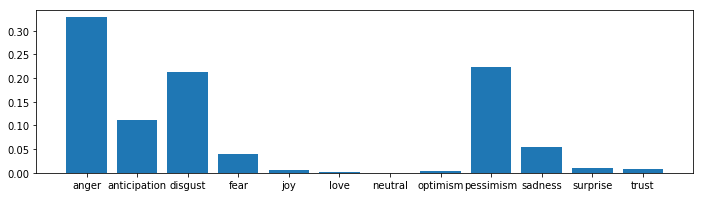

fkou3hn
[0.01425107 0.49080163 0.01381153 0.05708461 0.02211835 0.0006599
 0.01073348 0.07930886 0.14472212 0.0625825  0.08780644 0.01611947]


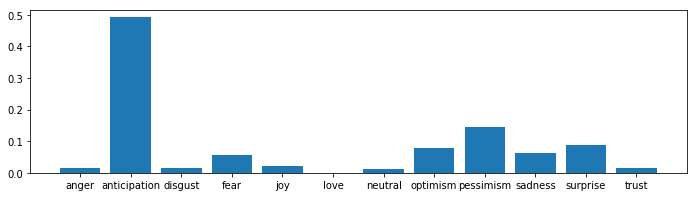

flccmus
[2.5599476e-02 5.1140063e-02 7.9877689e-02 3.2237852e-01 2.2984466e-02
 1.5581046e-02 1.2843206e-05 1.9711229e-01 1.5073429e-01 5.6914274e-02
 1.2361455e-02 6.5303572e-02]


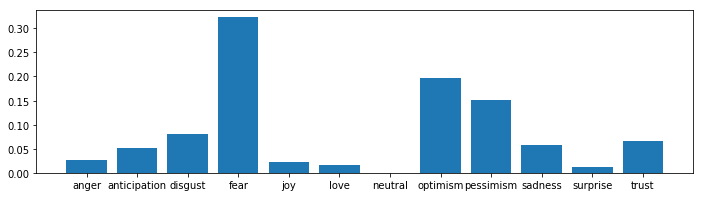

fj3gprp
[6.1858378e-02 3.0335715e-01 1.1496571e-01 1.7731196e-01 6.3651423e-03
 3.3577357e-03 1.4007513e-05 2.4968999e-02 9.9326789e-02 1.8254992e-01
 1.7660132e-02 8.2640927e-03]


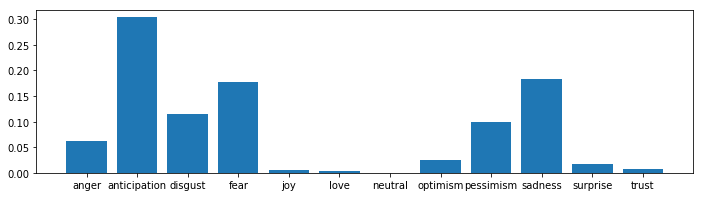

fkafqc8
[0.06559157 0.0732903  0.07282431 0.02080256 0.23144315 0.0150906
 0.01640279 0.08546506 0.15275441 0.09596083 0.09354967 0.07682478]


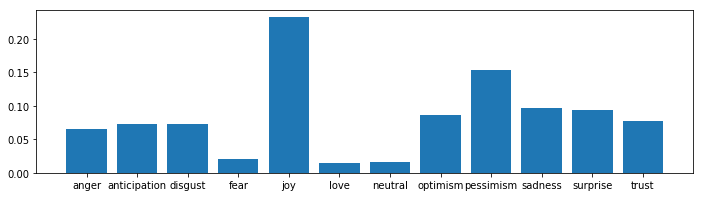

fkwl28q
[2.6915858e-03 2.0091455e-01 2.5249222e-02 7.2910711e-02 1.4474054e-02
 3.4810022e-02 5.0312854e-05 3.9955303e-01 6.8164438e-02 4.9097281e-02
 6.1996285e-02 7.0088468e-02]


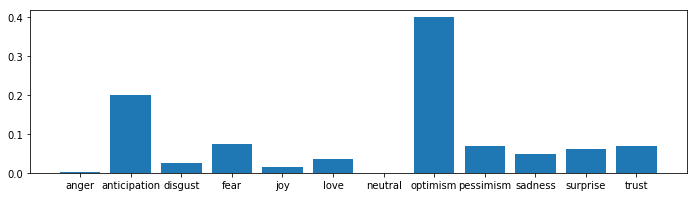

fjm8hp7
[1.5622885e-04 1.6429294e-02 2.6206838e-03 1.6322879e-02 2.1619899e-03
 9.3118967e-03 5.0893419e-08 5.4774851e-01 3.6058621e-03 2.1390079e-03
 1.6815433e-03 3.9782211e-01]


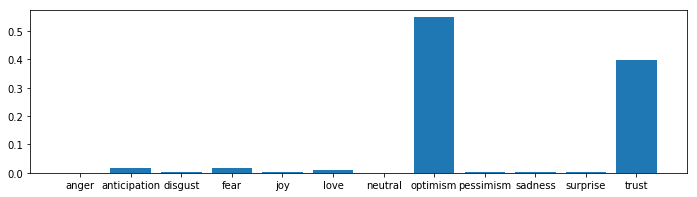

fkb0drn
[2.3184684e-01 1.9607569e-01 2.9694542e-01 4.0808819e-02 1.2923784e-02
 3.8292727e-03 4.8601000e-06 1.1083047e-02 1.7961659e-01 1.0373011e-02
 3.5916709e-03 1.2900966e-02]


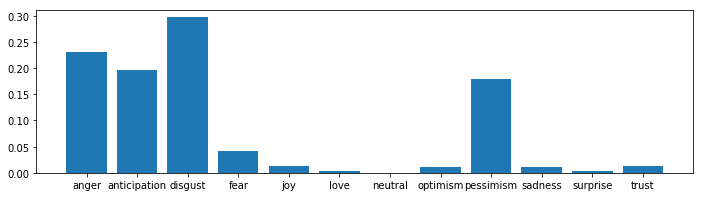

fi371zo
[2.2251416e-02 4.0925935e-01 7.0859149e-02 1.0346288e-01 2.2462811e-02
 4.8648184e-03 6.3110580e-05 7.1517482e-02 7.2911941e-02 1.3003263e-01
 5.5624586e-02 3.6689889e-02]


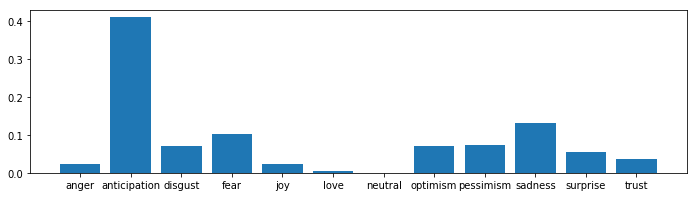

fkgqncd
[3.70611139e-02 4.08655345e-01 7.63967037e-02 1.08039245e-01
 1.64165143e-02 6.89543411e-03 1.00058845e-04 7.14736730e-02
 1.43305570e-01 7.56189451e-02 2.13048980e-02 3.47325057e-02]


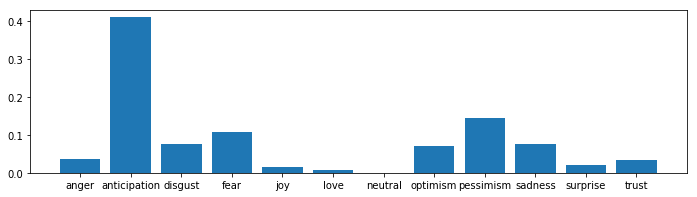

fj3lvf2
[1.1885488e-02 1.3905083e-01 1.2965857e-02 3.6995915e-01 1.3952787e-03
 5.3112968e-03 2.2937713e-06 5.2877557e-02 2.3075464e-01 1.6123964e-01
 9.2155356e-03 5.3424430e-03]


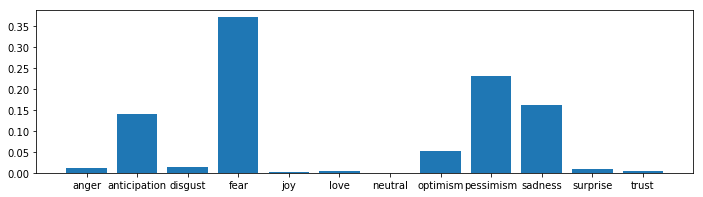

fjgh2s2
[4.01172973e-02 1.09928720e-01 7.69884884e-02 4.67207916e-02
 2.91494187e-02 1.00816995e-01 2.06591329e-04 3.05631906e-01
 1.92721501e-01 2.02824585e-02 4.75655012e-02 2.98702456e-02]


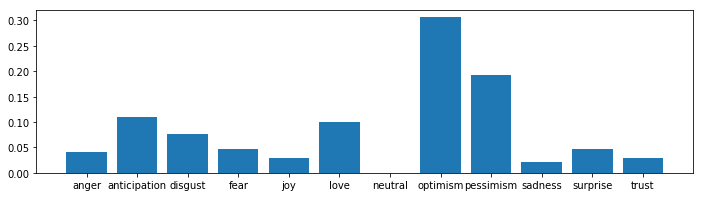

fkw1bju
[7.4002035e-02 2.9394409e-01 2.5700500e-02 2.0328319e-01 2.0409780e-02
 4.9542151e-03 2.2506254e-04 7.2295137e-02 1.8454297e-01 5.2070666e-02
 1.2366682e-02 5.6205656e-02]


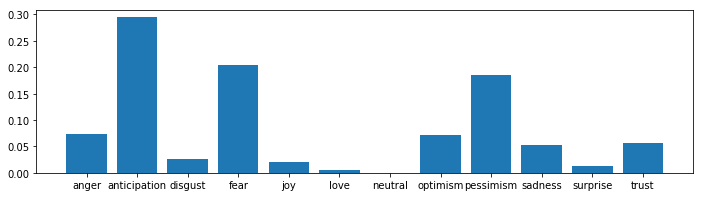

fl7p4sj
[0.26494128 0.05775736 0.16668111 0.12263029 0.07603315 0.00476028
 0.0044549  0.00996105 0.1815477  0.06977837 0.02938086 0.01207369]


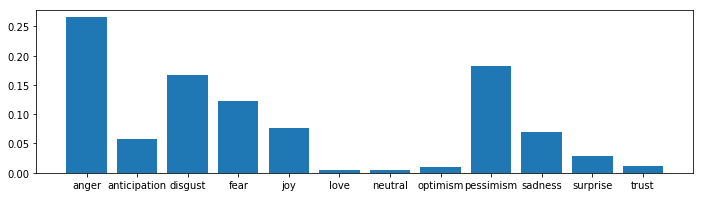

fkirq3e
[2.5143771e-02 2.8634995e-01 4.0261820e-02 8.9487359e-02 2.7482053e-02
 3.2761838e-02 3.3014498e-05 3.1207165e-01 6.6026911e-02 4.1305181e-02
 2.7838156e-02 5.1238291e-02]


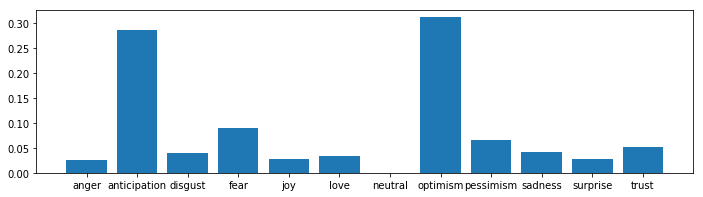

fh4r49d
[1.5087569e-02 3.2766527e-01 1.6218352e-01 9.8445088e-02 1.3877052e-02
 2.5098637e-02 5.0816812e-05 1.3485889e-01 1.0629949e-01 5.4139003e-02
 8.6382898e-03 5.3656451e-02]


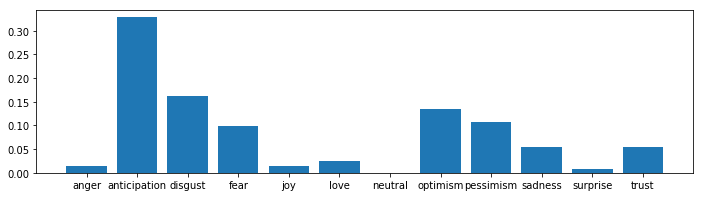

fk84tyf
[2.6591551e-02 1.1883663e-01 1.7124568e-01 1.4344767e-01 3.3154342e-02
 4.2867769e-02 9.1928068e-06 5.7906374e-02 2.8390661e-01 6.2272333e-02
 1.8589450e-02 4.1172393e-02]


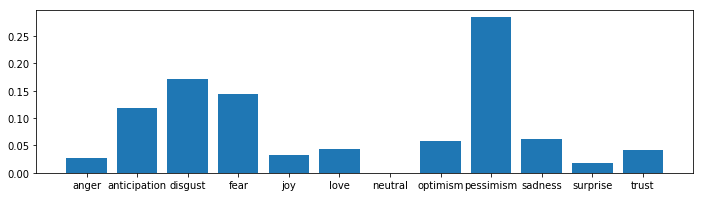

fl9hmnk
[0.03921114 0.0824444  0.09268259 0.04828545 0.1609668  0.01907453
 0.000824   0.20157182 0.12723622 0.13827321 0.02828945 0.06114043]


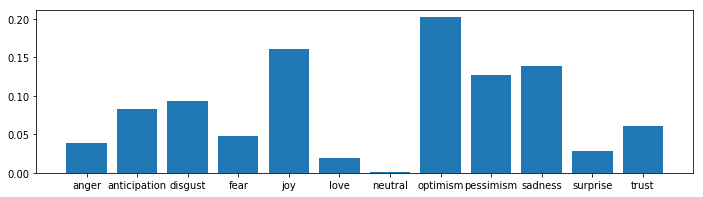

fg4lxb9
[0.02569422 0.48361874 0.02583158 0.02648137 0.03903897 0.02526431
 0.00796774 0.137541   0.10453881 0.00745596 0.06139733 0.05516986]


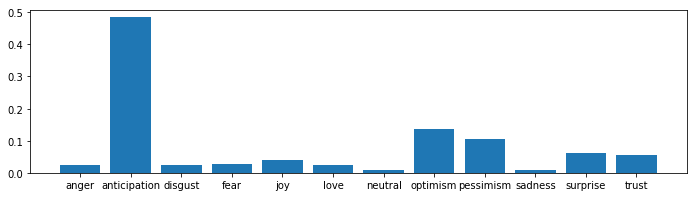

fji6imr
[4.61939676e-03 3.25289994e-01 5.01495320e-03 2.37271469e-02
 2.10661501e-01 7.62777356e-03 2.88788317e-04 3.70462865e-01
 1.80982444e-02 1.32914465e-02 5.08251181e-03 1.58353485e-02]


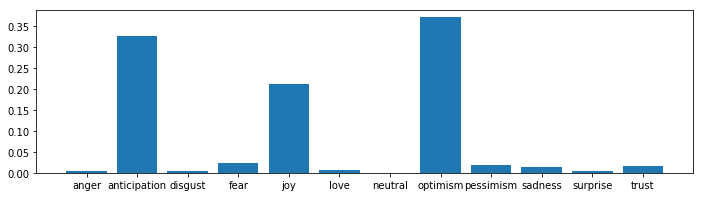

fks4tny
[0.08886205 0.44401202 0.10279252 0.01213106 0.16016105 0.0056644
 0.02208583 0.03077061 0.07577074 0.00932791 0.01776965 0.03065214]


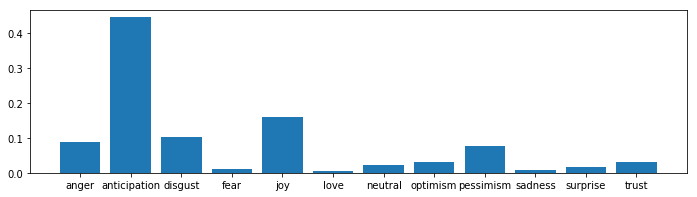

fjmi56e
[0.12638424 0.41038257 0.05901263 0.10166692 0.02108534 0.0044416
 0.00063113 0.03513275 0.16152285 0.03628088 0.01902645 0.02443261]


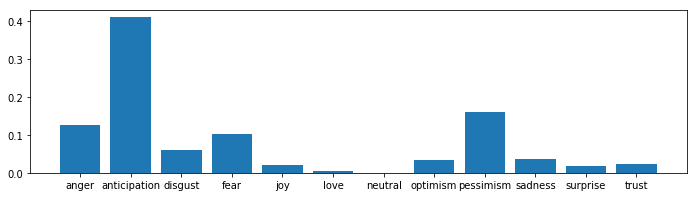

fkh71ra
[6.35360256e-02 2.74609745e-01 6.53025135e-02 2.58354157e-01
 1.47003345e-02 7.80877238e-03 8.81242740e-05 4.45286632e-02
 1.29557669e-01 1.10669270e-01 1.81908663e-02 1.26538770e-02]


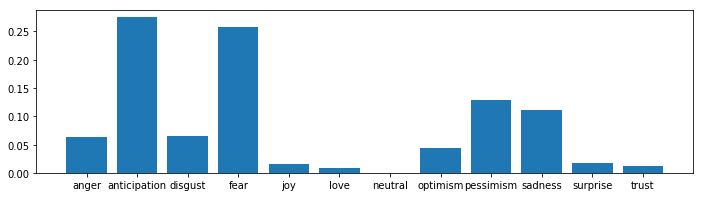

fl3pnwr
[1.0558524e-03 2.9816371e-01 1.5018299e-02 2.4205193e-01 2.0419238e-03
 5.8580004e-03 4.9899410e-07 3.1011513e-01 5.1227838e-02 4.7477078e-02
 2.6127128e-03 2.4377001e-02]


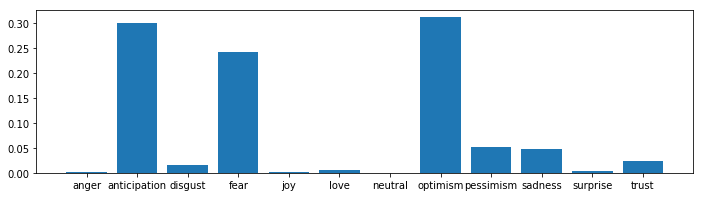

fkar0t9
[5.4553270e-02 7.9628527e-02 1.3556613e-01 1.9080369e-01 1.7207038e-02
 1.9689346e-02 2.1295489e-05 2.5172930e-02 3.1722084e-01 1.1982478e-01
 3.4922399e-02 5.3898231e-03]


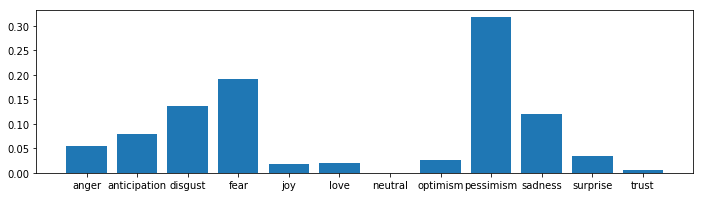

fl6rn8m
[4.8928526e-03 3.0628619e-01 1.3156347e-02 2.9398981e-01 1.6306787e-03
 6.1679064e-05 2.0730911e-05 1.8697904e-02 3.3348557e-01 1.8089360e-02
 5.6590992e-03 4.0298258e-03]


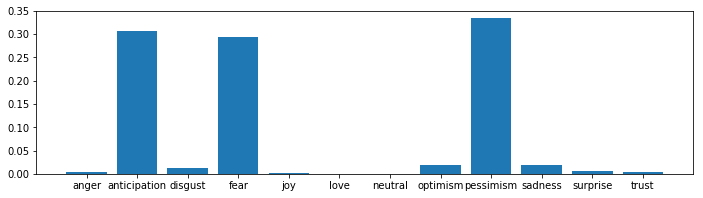

fl5w98a
[0.03477262 0.15439066 0.03521217 0.26494822 0.0497658  0.0005227
 0.01255773 0.02957053 0.2904     0.07717311 0.04306505 0.00762145]


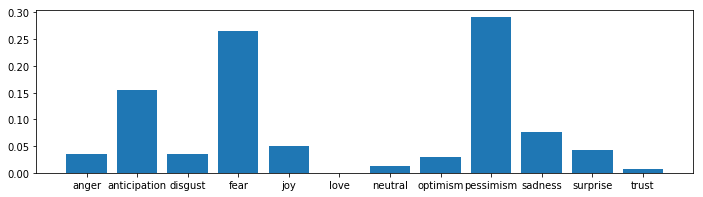

fj4x5hf
[0.04334593 0.25220513 0.04118559 0.17216446 0.00968342 0.00247686
 0.00073167 0.0238679  0.38656867 0.0395867  0.01165546 0.0165283 ]


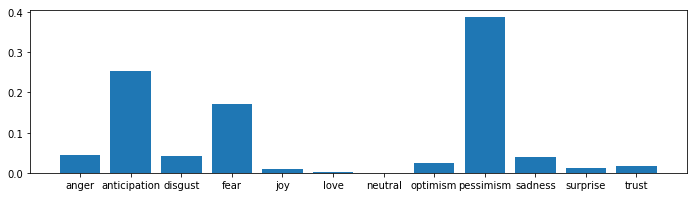

fiaewcz
[2.6716819e-02 2.6985514e-01 6.1566107e-02 2.4778000e-01 1.8738443e-02
 6.5050097e-03 3.5032092e-05 3.1699959e-02 1.5137884e-01 1.3764775e-01
 4.4014443e-02 4.0625404e-03]


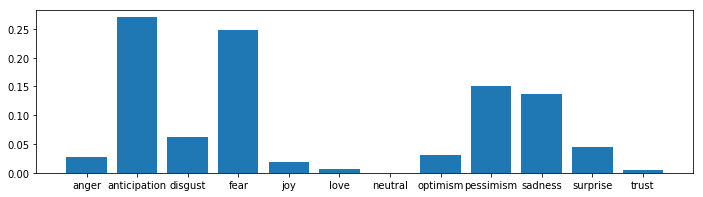

fl3zab8
[1.8355399e-01 2.7750596e-01 2.0769329e-01 5.2479401e-02 2.4692357e-02
 1.0543777e-02 3.7310394e-05 4.3309394e-02 8.7067753e-02 7.2036386e-02
 2.8753329e-02 1.2327101e-02]


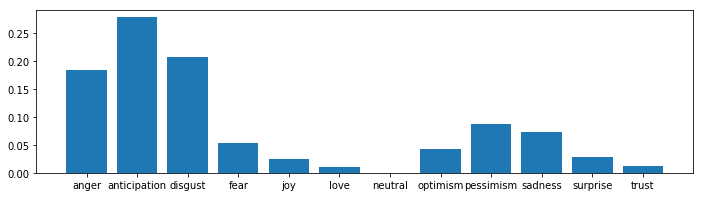

ffep14t
[0.16796556 0.01600186 0.13448058 0.01460166 0.41415367 0.01278181
 0.04034265 0.02355636 0.03468043 0.06752276 0.05762654 0.0162861 ]


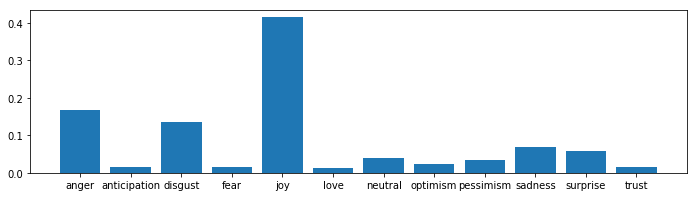

fkfnhuo
[0.3077538  0.11567985 0.10594343 0.08041339 0.04867436 0.00569023
 0.0016296  0.03405105 0.18996482 0.05387574 0.01936457 0.03695914]


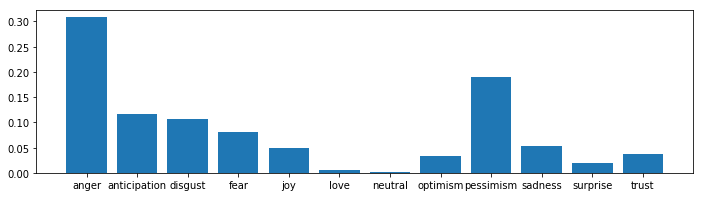

fk1q58s
[0.02200967 0.17811899 0.01939489 0.30229506 0.07280733 0.00824973
 0.00848293 0.06678609 0.1407658  0.0589249  0.07134459 0.05082002]


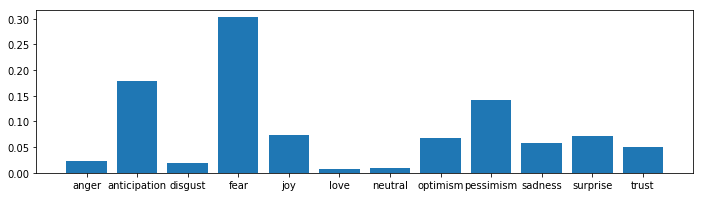

fgs6sfn
[0.09025488 0.14311805 0.1720224  0.12120713 0.12580293 0.01378098
 0.002973   0.06600193 0.1009656  0.04996697 0.05076331 0.06314281]


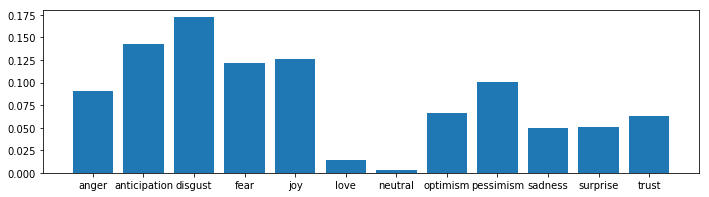

fjwnk1x
[1.38969235e-02 1.76883757e-01 5.31536825e-02 4.56766307e-01
 7.98750296e-03 8.15711077e-03 1.10486426e-05 1.16411574e-01
 6.85858950e-02 6.25743419e-02 7.23754521e-03 2.83343848e-02]


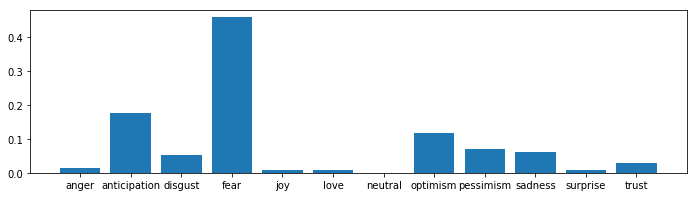

fktmbq3
[0.02723274 0.20587055 0.06988786 0.16294512 0.03834459 0.01018972
 0.00038654 0.10410599 0.11981507 0.16799815 0.05966919 0.03355454]


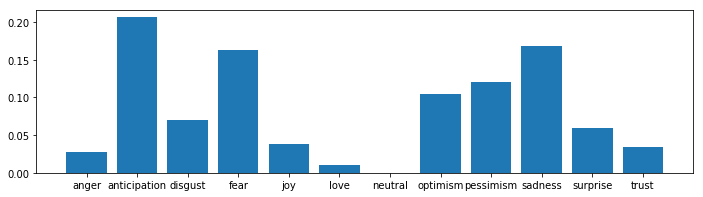

fj5prvq
[9.58433151e-02 1.00765385e-01 2.57483393e-01 2.36422047e-01
 3.00656036e-02 2.34860871e-02 6.10322741e-06 1.31481737e-01
 5.23753986e-02 1.88534185e-02 6.23922702e-03 4.69782427e-02]


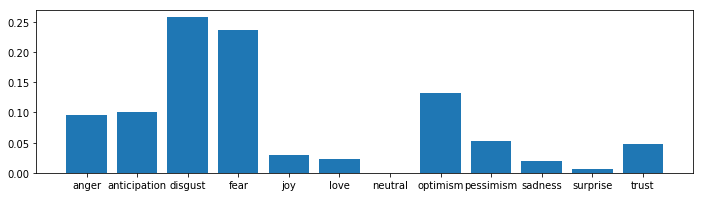

fje473n
[0.00478442 0.37488377 0.02837074 0.00832753 0.04256248 0.00073571
 0.00395385 0.01994887 0.46331298 0.01808565 0.00841117 0.02662282]


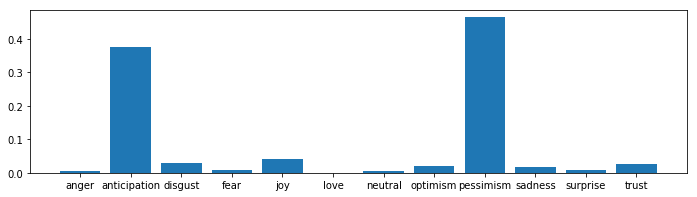

fkrm7zs
[0.02641163 0.26793563 0.06851526 0.0630993  0.03837163 0.01541687
 0.00047581 0.26233244 0.1254424  0.02512185 0.01758824 0.08928903]


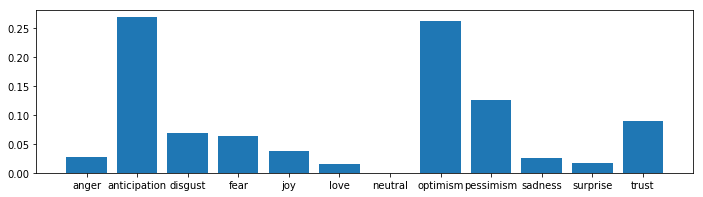

fk6hxe5
[0.00901166 0.20724016 0.01064271 0.0827512  0.03496841 0.00655904
 0.0003721  0.3367559  0.14127184 0.03424684 0.05927198 0.07690816]


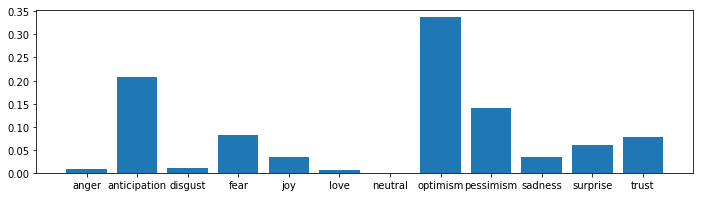

fgkr0wg
[4.81600262e-04 3.12581867e-01 2.72318218e-02 3.24803948e-01
 2.37703044e-03 5.03371889e-03 1.40935808e-05 1.23507820e-01
 1.06293865e-01 5.95650375e-02 2.45406702e-02 1.35686425e-02]


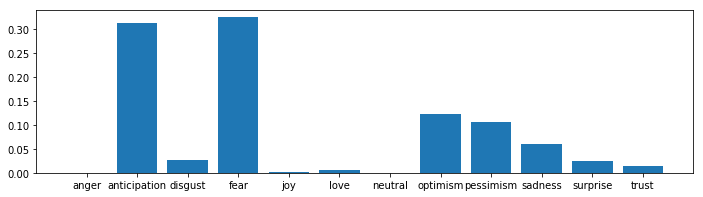

fkzolpe
[1.5399586e-01 8.5035041e-02 2.0597713e-01 1.4541124e-01 5.1400904e-03
 3.4857024e-03 2.2125676e-05 1.5357938e-02 3.1425643e-01 3.5516512e-02
 2.1603646e-02 1.4198324e-02]


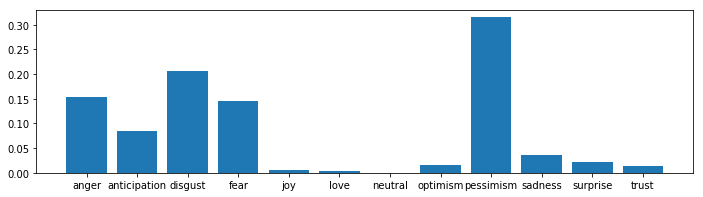

flbxcbh
[0.02114054 0.16400762 0.04655989 0.1397495  0.14340194 0.03248544
 0.00358748 0.23238766 0.12723283 0.0104211  0.01041158 0.06861439]


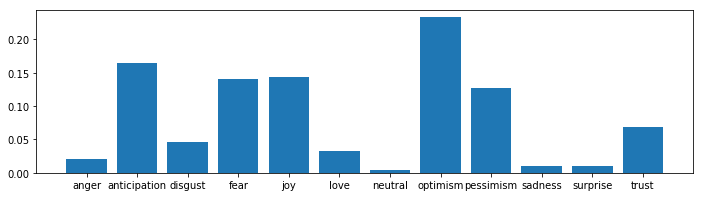

fk8r377
[6.7258276e-02 1.3078910e-01 2.1522714e-01 6.9303028e-02 3.6610506e-02
 4.0248267e-02 2.0205480e-05 2.4298801e-01 8.1365235e-02 1.7372398e-02
 1.7657656e-02 8.1160158e-02]


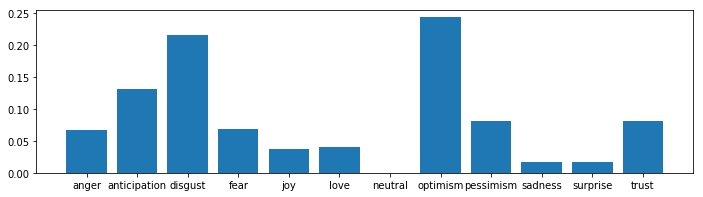

fkxzkyy
[0.00753997 0.3523083  0.01581354 0.20632125 0.05231575 0.00324684
 0.00365919 0.08185268 0.10211772 0.06679535 0.04925921 0.05877017]


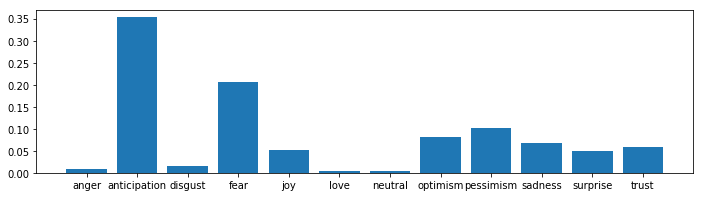

fjfm0ik
[6.7180514e-02 7.4076168e-02 5.9959227e-01 4.5225229e-02 3.3686755e-03
 4.7613430e-04 6.9166781e-08 9.8794121e-03 1.9275527e-01 5.1954654e-03
 5.8038009e-04 1.6704715e-03]


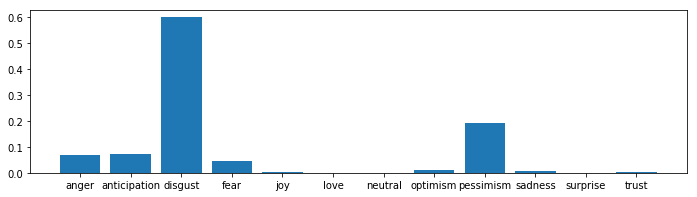

fkgf57y
[0.21788424 0.15069504 0.15185732 0.03818663 0.06667419 0.02746503
 0.00046801 0.06534814 0.15273961 0.0608939  0.04119086 0.02659698]


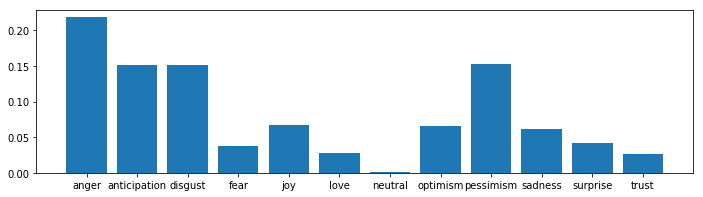

fi5pt5x
[0.00519082 0.10421187 0.01785817 0.06338149 0.12880391 0.00297602
 0.0775648  0.13990805 0.15930307 0.05766305 0.18245335 0.06068539]


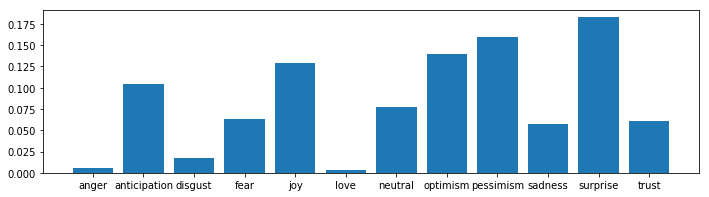

fj48xtu
[0.19609493 0.06695176 0.19911337 0.04231518 0.14156161 0.02576491
 0.0005656  0.07754574 0.05920752 0.02283346 0.02549826 0.14254771]


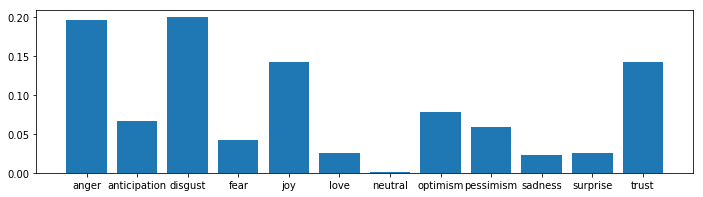

fgv975e
[1.3002966e-02 3.3607207e-02 2.9587170e-02 6.3840128e-02 2.2732336e-03
 6.8235002e-04 6.2331218e-08 2.1628716e-03 9.4601801e-03 8.3917564e-01
 3.7892591e-03 2.4190091e-03]


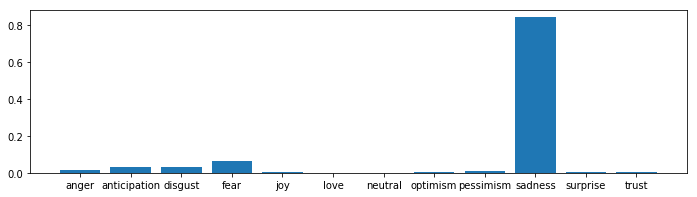

fk15qw0
[9.56917033e-02 1.13085136e-01 1.32795468e-01 2.07933038e-01
 1.33978818e-02 1.93194067e-03 5.89073497e-05 5.31228520e-02
 3.25345248e-01 2.47619562e-02 8.18079244e-03 2.36950833e-02]


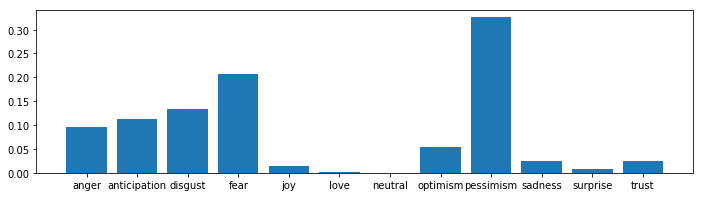

fhzxg9h
[0.02911371 0.24715708 0.11139836 0.11921176 0.19691621 0.01159548
 0.01812871 0.01118832 0.10615601 0.07129823 0.05946924 0.01836699]


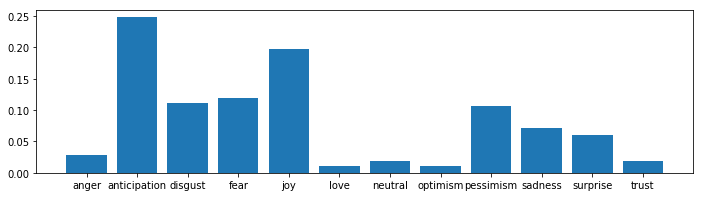

fkzuv72
[2.1089377e-01 9.3253240e-02 2.4688008e-01 1.8499499e-02 3.3887602e-02
 3.9447851e-02 1.6652029e-05 8.7908916e-02 1.2783925e-01 8.9662388e-02
 1.1549417e-02 4.0161382e-02]


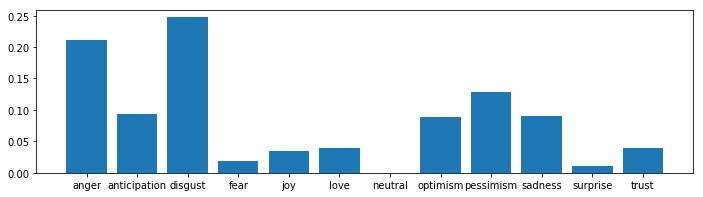

flbybgn
[1.5319963e-01 9.5606327e-02 1.5838917e-01 5.4138146e-02 4.3208029e-02
 1.9210560e-02 2.7937074e-05 8.1458464e-02 2.0959774e-01 1.5578264e-01
 1.2850209e-02 1.6531080e-02]


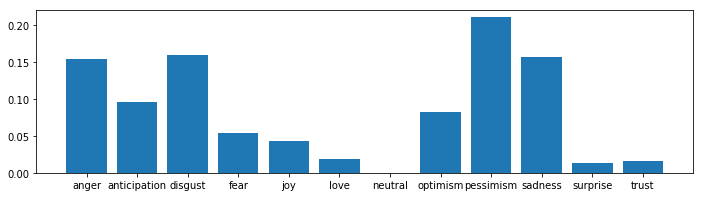

fhzqbcb
[0.14560817 0.25899932 0.093514   0.1033638  0.03948411 0.00417953
 0.00100201 0.01091544 0.08916909 0.11351658 0.12954664 0.01070131]


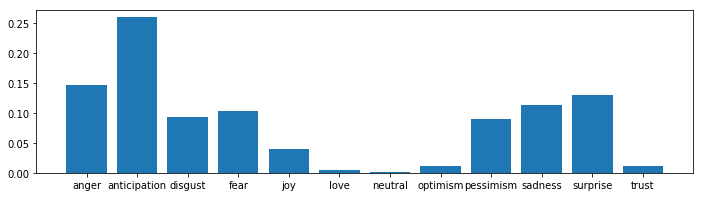

fg334s4
[0.05277094 0.13808572 0.10444539 0.21140598 0.09732807 0.01093087
 0.00283744 0.05877762 0.10887187 0.07139162 0.11479469 0.02835976]


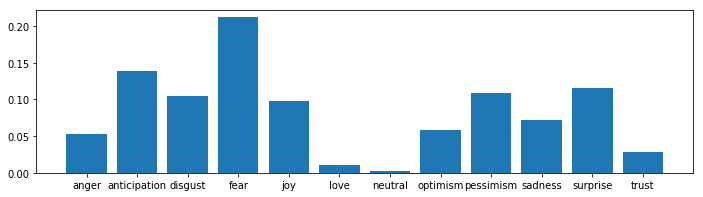

ffjrzy0
[7.8978986e-02 4.2322811e-01 1.0782232e-01 6.1034266e-02 2.2747973e-03
 2.0910089e-03 1.4936350e-06 1.3344606e-02 2.2678897e-01 7.1551897e-02
 1.1930629e-03 1.1690554e-02]


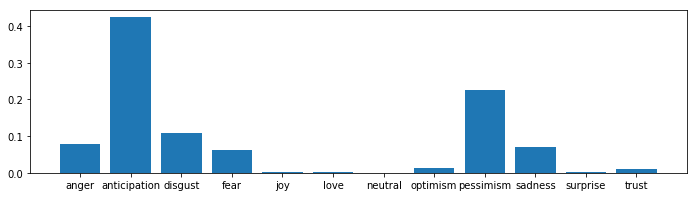

fk93urp
[5.04356716e-03 1.78368017e-01 1.83919091e-02 3.48505825e-01
 9.59187001e-03 2.14424985e-03 7.05172934e-05 2.09209502e-01
 1.02727875e-01 7.20538348e-02 4.71745105e-03 4.91753221e-02]


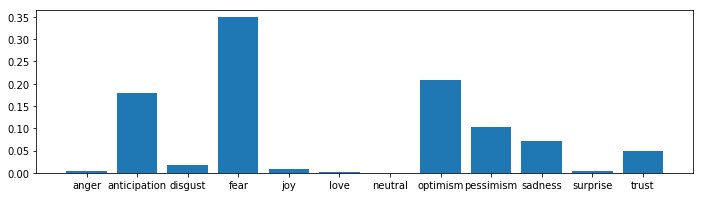

fklgmt3
[0.07014737 0.35285908 0.07081052 0.09823971 0.0100722  0.00088234
 0.00051111 0.01679911 0.23100051 0.10889489 0.01922267 0.02056055]


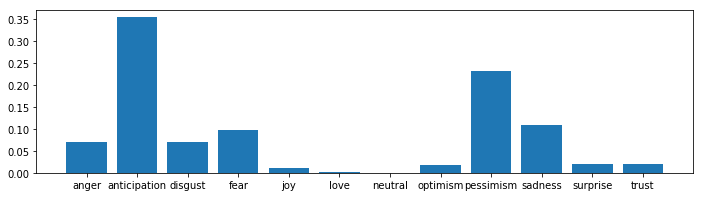

fk3qhzo
[7.7077769e-02 3.4875643e-02 2.1015520e-01 9.2672415e-02 3.7124914e-01
 1.2725039e-02 2.3750166e-04 8.6730286e-02 7.4071124e-02 3.5182193e-03
 6.5691327e-03 3.0118614e-02]


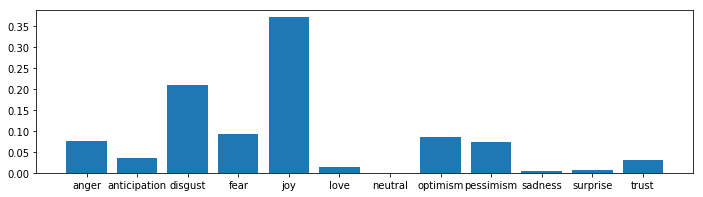

fki7ptw
[0.02787969 0.2862263  0.05831743 0.07755385 0.01278466 0.00787719
 0.00183864 0.05196092 0.1604543  0.20296983 0.06909041 0.04304683]


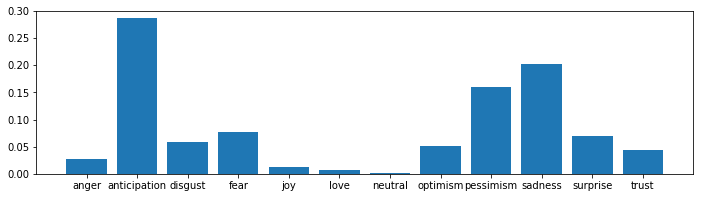

fkdzj1f
[1.2285513e-02 2.9341963e-01 1.5056854e-02 3.3688995e-01 1.1854681e-02
 5.6069503e-03 7.5377946e-05 7.8587465e-02 5.1330648e-02 1.3720663e-01
 3.9960723e-02 1.7725574e-02]


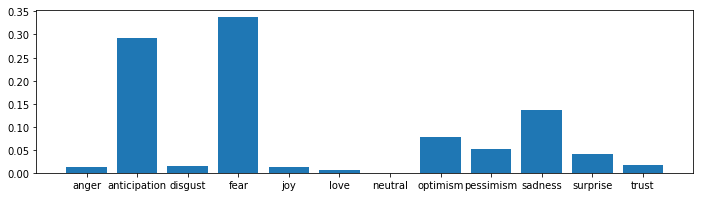

fl27xkl
[0.0320606  0.07766822 0.09588125 0.11066636 0.13147625 0.01153199
 0.01280903 0.12882495 0.1639604  0.05201572 0.07574696 0.10735827]


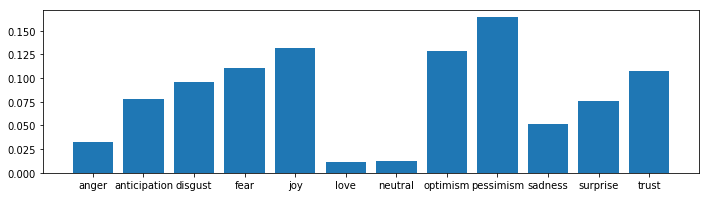

fhe8055
[0.00216918 0.27525598 0.00447895 0.22998564 0.01748522 0.00578452
 0.00029259 0.21251555 0.1013917  0.09478252 0.01917821 0.03667982]


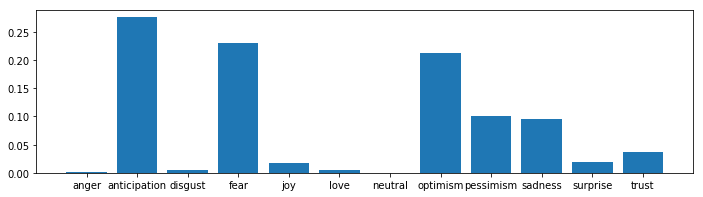

fg7wh07
[0.11403544 0.19692777 0.0709547  0.06355257 0.22309071 0.00667949
 0.01060265 0.06291134 0.19099976 0.00406684 0.0276802  0.02849851]


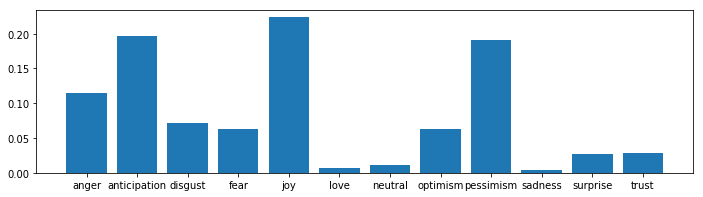

fjooqpx
[1.22772098e-01 1.97530940e-01 6.82587028e-02 1.83197469e-01
 2.27370486e-02 1.02374889e-02 1.03519924e-04 3.96042950e-02
 1.86326310e-01 1.29269376e-01 1.25212772e-02 2.74414793e-02]


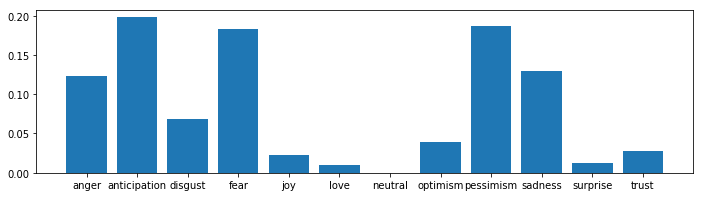

fkyu66p
[1.20280474e-01 1.75257757e-01 1.00052617e-01 1.16993181e-01
 1.20247845e-02 1.03574675e-02 2.25092754e-05 3.05950101e-02
 3.07909280e-01 1.06845595e-01 8.19179043e-03 1.14694526e-02]


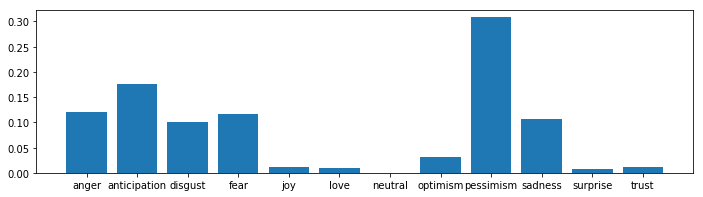

fl4mtue
[4.6207166e-01 3.7112597e-02 1.4827344e-01 3.6985848e-02 1.0126630e-02
 1.6330566e-02 3.1966786e-06 8.9798719e-02 1.4654282e-01 1.5614250e-02
 5.0889333e-03 3.2051325e-02]


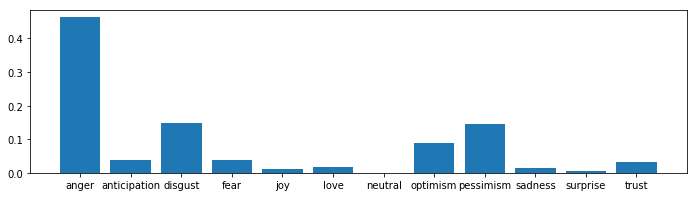

fla444k
[8.9626284e-03 1.0654656e-01 6.2816255e-02 2.7518660e-01 2.8135823e-02
 4.0928647e-03 9.3197370e-05 8.5246526e-02 2.7414033e-01 7.6063670e-02
 4.6935990e-02 3.1779613e-02]


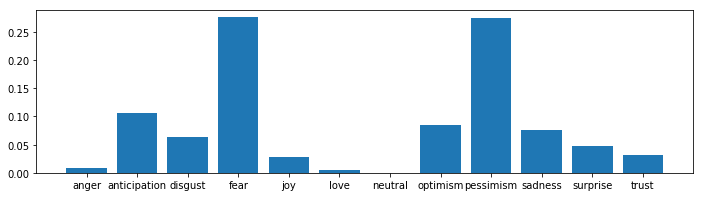

fj1x0mn
[2.7469024e-02 2.6445466e-01 1.0174608e-02 1.7298111e-01 1.0475395e-02
 1.1486969e-04 1.5285111e-03 5.0238157e-03 4.6620494e-01 3.6163464e-02
 3.3981123e-03 2.0115981e-03]


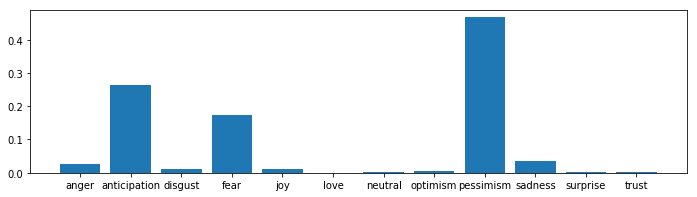

fjxw2sl
[2.6793775e-01 4.6844508e-02 2.9484645e-01 7.9483777e-02 9.8509924e-04
 1.9259333e-03 2.5058273e-07 1.1867344e-03 2.8615493e-01 1.7341804e-02
 1.7706086e-03 1.5221139e-03]


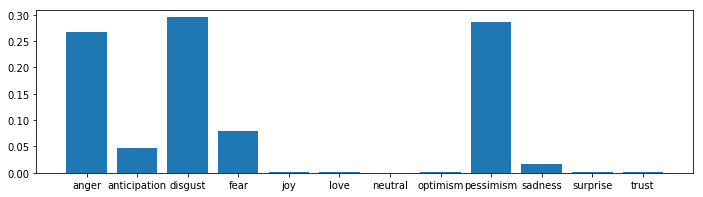

fjgmmcx
[6.60638884e-02 1.00646399e-01 1.40080601e-01 1.41337961e-01
 1.47804655e-02 4.83760983e-02 1.05340332e-04 1.56367779e-01
 2.04361781e-01 3.06407418e-02 2.08524968e-02 7.63864964e-02]


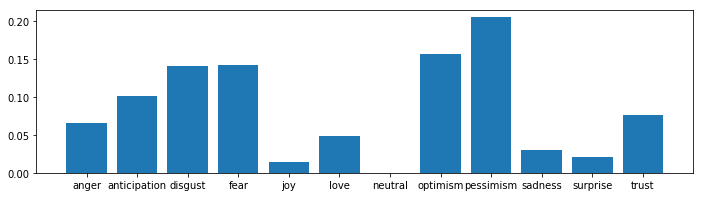

fi1ix9l
[9.8652050e-02 2.2637576e-01 1.5841180e-01 7.0267372e-02 3.4123522e-03
 5.3742563e-04 8.6051594e-05 1.5452867e-02 3.1615946e-01 9.1256469e-02
 4.6876352e-03 1.4700866e-02]


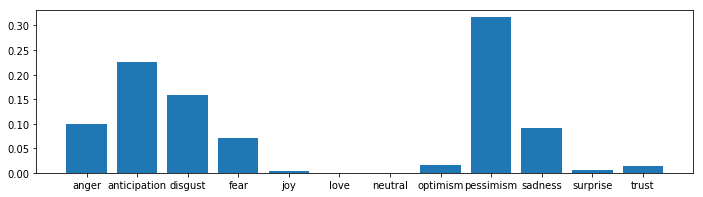

fkd4g1z
[2.8603068e-01 2.8070506e-02 1.7703831e-01 9.6930958e-02 7.2926894e-04
 3.1391981e-03 8.5358856e-08 1.9797438e-03 3.8829803e-01 1.5145552e-02
 1.5062317e-03 1.1314912e-03]


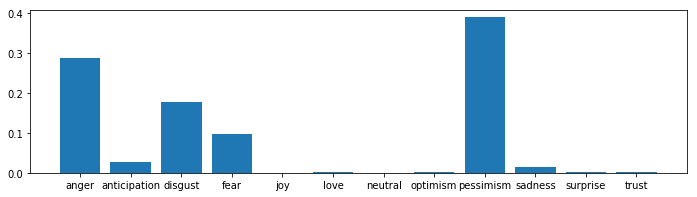

fhielm1
[0.06144324 0.13675845 0.07202219 0.14091398 0.12644288 0.01504804
 0.00826352 0.02475166 0.08974155 0.18658647 0.09410967 0.04391843]


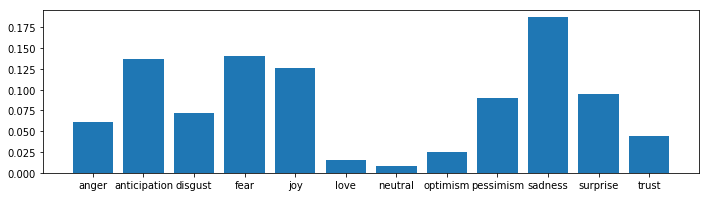

fjlb7zm
[1.0463970e-01 1.1548407e-01 2.0717269e-01 2.0020840e-01 2.8755106e-02
 1.2773821e-02 8.1180351e-06 1.9794134e-02 2.1059497e-01 4.7968298e-02
 3.9600469e-02 1.3000241e-02]


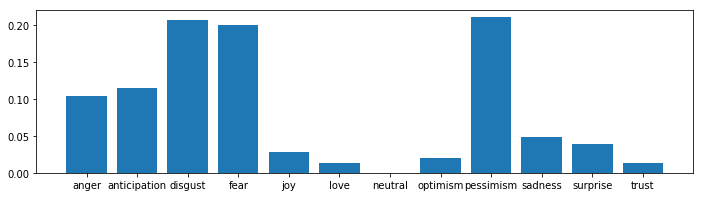

fl1tq3i
[0.00236866 0.22042765 0.0141883  0.11001562 0.05248657 0.02194842
 0.00615877 0.2939883  0.13972192 0.02989799 0.05583234 0.05296542]


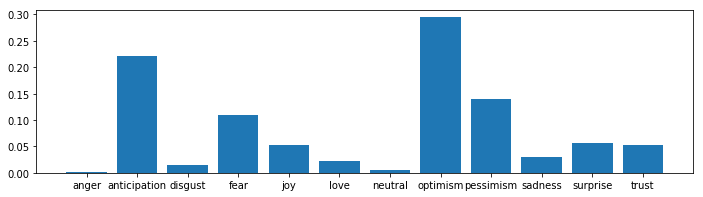

fkdubi2
[7.8964344e-04 4.1594964e-01 3.0455575e-04 4.7722001e-02 4.5353282e-02
 2.1814152e-04 1.0280787e-01 1.3228938e-01 2.1464773e-01 1.3093667e-02
 2.0879495e-03 2.4736183e-02]


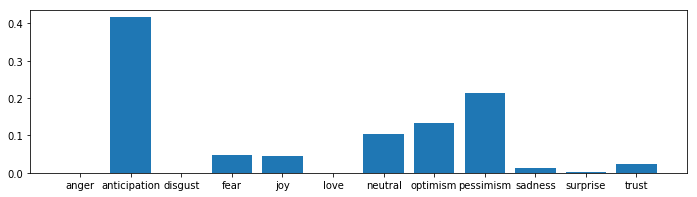

fk0g08i
[5.6227010e-02 3.6425483e-01 5.6486871e-02 2.2315691e-01 2.8816769e-02
 6.3178283e-03 6.7186869e-05 8.6240903e-02 1.0389448e-01 3.2239553e-02
 3.7443782e-03 3.8553350e-02]


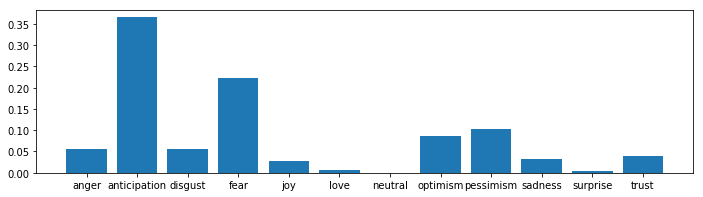

fgo0nai
[5.7147078e-02 1.4218502e-01 9.0570830e-02 5.7624843e-02 1.0930776e-01
 1.2601131e-02 7.7277269e-05 1.4407684e-01 6.0847227e-02 8.7120757e-03
 6.2963068e-03 3.1055355e-01]


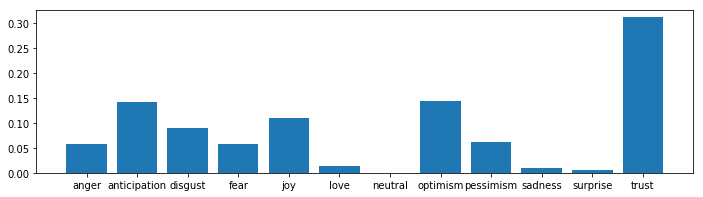

fjv7a13
[2.1745607e-02 1.9263497e-01 6.4994417e-02 3.3134052e-01 2.9747719e-02
 7.4664708e-03 5.8007994e-05 1.4966984e-01 6.2440496e-02 3.1197105e-02
 3.3053014e-02 7.5651869e-02]


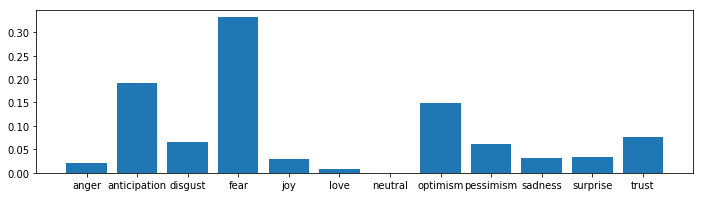

fkk3di1
[2.1275717e-01 8.2514808e-02 2.9678556e-01 1.3401476e-02 5.1331975e-02
 5.1422510e-02 2.5486006e-05 8.1242926e-02 1.3878475e-01 1.4413451e-02
 3.2332111e-02 2.4987847e-02]


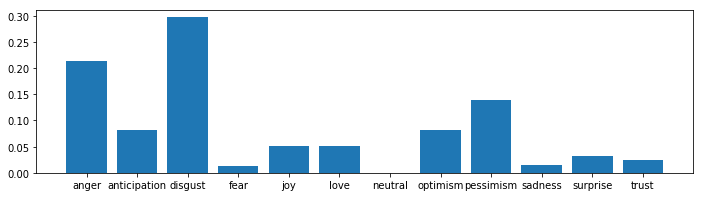

fkd7n63
[1.61925778e-01 2.95601636e-01 4.97721396e-02 1.05380915e-01
 8.47485848e-03 2.96202116e-03 6.18013291e-05 5.43507524e-02
 1.78923070e-01 1.04408316e-01 2.02420410e-02 1.78966746e-02]


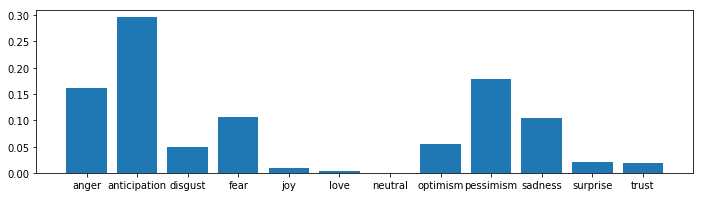

fkrx2e8
[6.52849004e-02 1.00924425e-01 2.23524883e-01 3.47256124e-01
 6.24094857e-03 1.85762346e-02 1.53239796e-06 2.58090831e-02
 1.27303779e-01 3.87650132e-02 4.02343832e-03 4.22895998e-02]


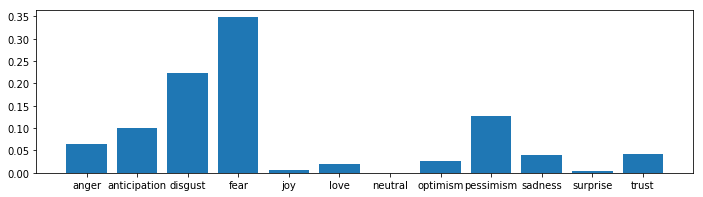

fhdrcvv
[6.4767348e-03 4.4490373e-01 2.3877246e-02 9.2372857e-02 5.9266519e-03
 2.7714933e-03 1.0071426e-04 5.5958990e-02 2.1386607e-01 1.0478907e-01
 2.2623625e-02 2.6332812e-02]


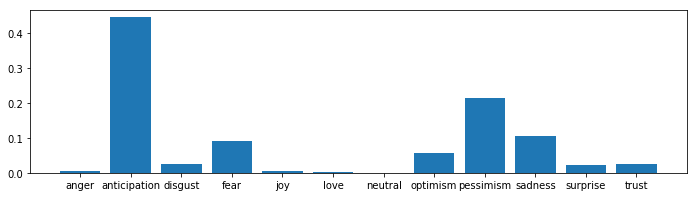

fl4wc0y
[1.2301255e-01 9.3743175e-02 1.5679881e-01 2.2212626e-01 2.0669756e-02
 5.3690947e-03 3.3318553e-05 5.1470287e-02 2.0935914e-01 7.2784036e-02
 2.0542262e-02 2.4091298e-02]


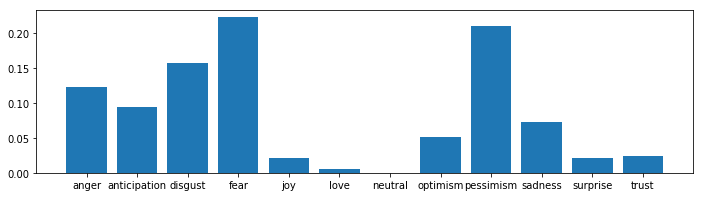

fk738ww
[2.1014002e-01 1.9411215e-01 2.1243356e-01 7.1637318e-02 1.8429009e-02
 5.7202200e-03 4.4954537e-05 1.9220924e-02 2.2950049e-01 2.3785528e-02
 2.5102065e-03 1.2465664e-02]


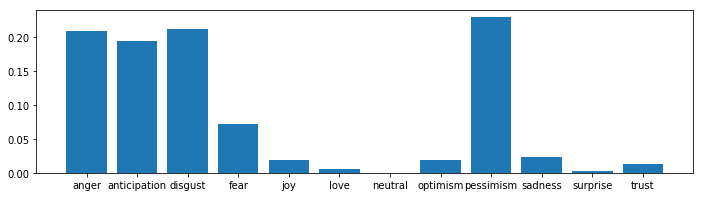

fhbj408
[9.9749885e-02 1.7080905e-01 1.6411971e-01 2.0769055e-01 8.3073163e-03
 9.6873576e-03 3.1803327e-06 1.5976621e-02 8.2478590e-02 2.0352739e-01
 1.2779913e-02 2.4870522e-02]


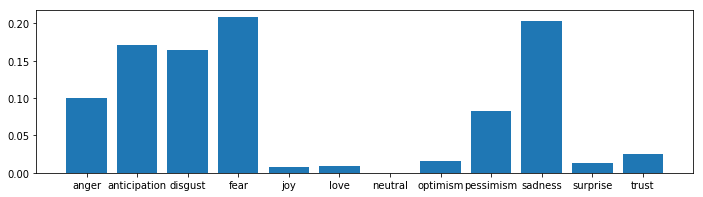

fge9otq
[5.0305631e-02 2.6920602e-01 7.4766651e-02 1.6274020e-01 1.0430558e-02
 9.0361582e-03 2.9880782e-06 2.0020948e-01 1.3360387e-01 2.7545184e-02
 2.5089574e-03 5.9644263e-02]


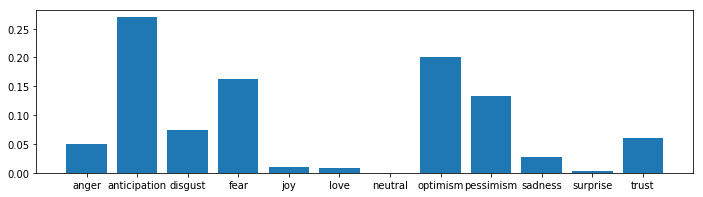

fh8gvyc
[2.5692049e-01 1.8708153e-01 2.2925900e-01 9.8077983e-02 5.2225278e-03
 1.5114569e-03 1.8143051e-05 1.5945517e-02 1.5239674e-01 3.4125593e-02
 3.7907988e-03 1.5650142e-02]


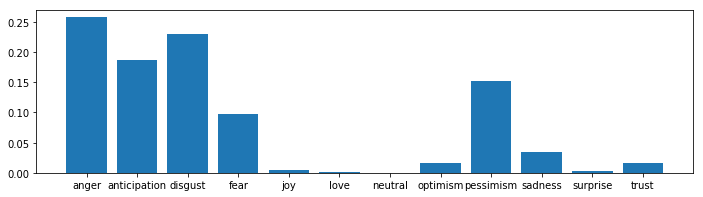

fkdrdub
[1.9441469e-02 2.3297074e-01 2.6045904e-02 6.7134105e-02 5.1848241e-03
 3.4756055e-03 1.7431981e-05 3.0533513e-01 1.3352843e-01 1.6558520e-01
 6.5221763e-03 3.4758873e-02]


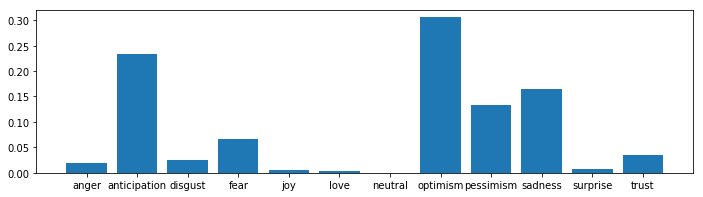

fk5k7v3
[4.48357202e-02 1.79345027e-01 1.28720313e-01 2.39971563e-01
 2.11992376e-02 2.61173453e-02 8.90534211e-05 1.05949976e-01
 1.43229321e-01 5.06995767e-02 2.64995098e-02 3.33433710e-02]


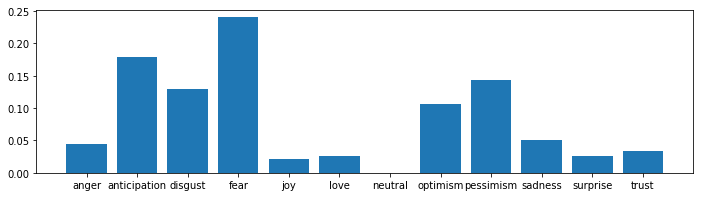

fjoyie4
[7.6846361e-02 1.6337855e-01 1.0913352e-01 1.5694717e-01 3.3717975e-02
 6.2967464e-02 3.5399818e-05 1.0775961e-01 9.6840389e-02 3.3131249e-02
 2.9310346e-02 1.2993199e-01]


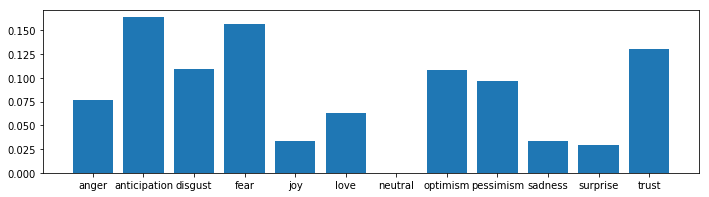

fjesvxu
[4.61939676e-03 3.25289994e-01 5.01495320e-03 2.37271469e-02
 2.10661501e-01 7.62777356e-03 2.88788317e-04 3.70462865e-01
 1.80982444e-02 1.32914465e-02 5.08251181e-03 1.58353485e-02]


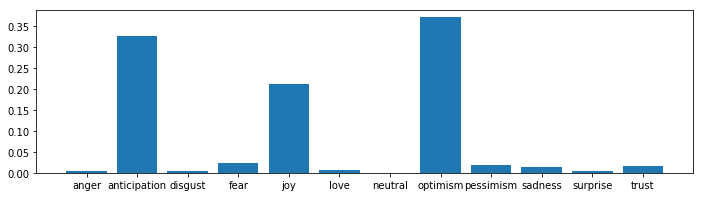

fj601m8
[1.5171751e-01 1.6554214e-01 2.1630704e-01 1.4674897e-01 7.8976009e-04
 3.2339498e-04 8.6743548e-06 1.2642435e-03 2.5659975e-01 4.7395606e-02
 4.7892965e-03 8.5135577e-03]


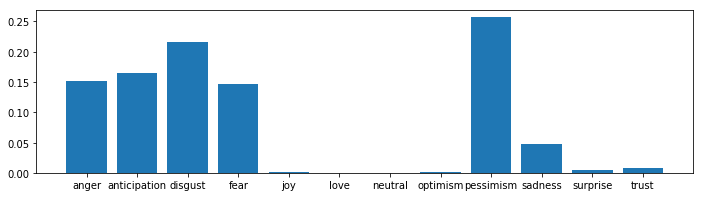

fge4cgu
[3.8977161e-02 2.2683042e-01 1.4931631e-02 1.9089046e-01 2.4869595e-02
 2.3221541e-03 1.9268773e-04 9.0114132e-02 1.5817347e-01 1.9479601e-01
 4.4002920e-02 1.3899321e-02]


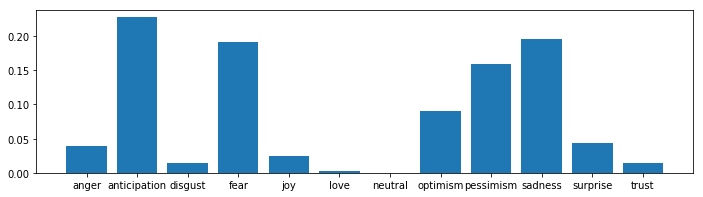

fkpy4y3
[1.1349245e-01 9.8166168e-02 2.8913102e-01 6.1888836e-02 8.7457255e-02
 1.4081957e-02 1.8439845e-04 5.5579428e-02 1.3944373e-01 3.9709639e-02
 3.3318639e-02 6.7546435e-02]


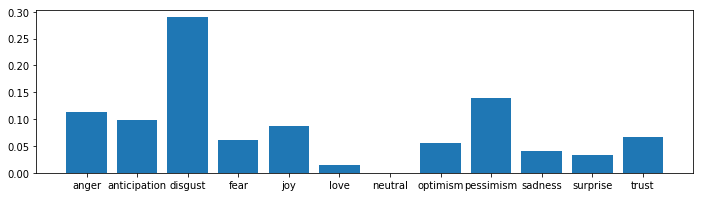

fiu21ct
[0.0118035  0.4000922  0.10630973 0.02753689 0.04929781 0.00377692
 0.00221669 0.07755469 0.07692826 0.04291077 0.1582992  0.04327334]


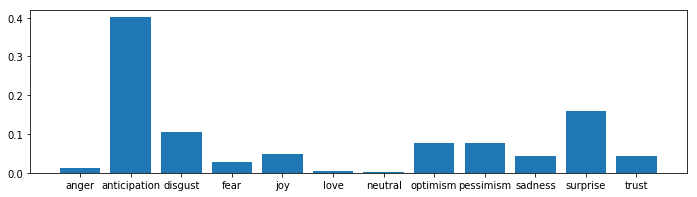

fi91uks
[4.19797041e-02 2.67132729e-01 7.90167078e-02 1.75089687e-01
 2.61930190e-02 4.29675467e-02 3.17812955e-05 1.20062366e-01
 1.21544577e-01 7.06533045e-02 1.79795250e-02 3.73490751e-02]


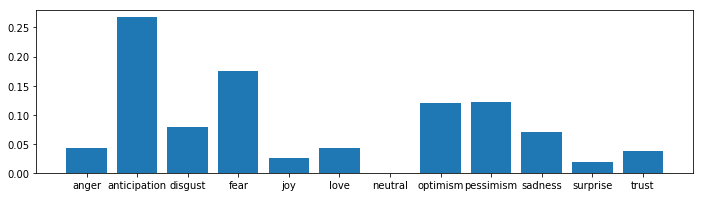

fkwqxo9
[3.2941446e-01 1.1707061e-01 1.6512129e-01 1.1394199e-01 1.1030489e-02
 2.1386361e-03 2.3455302e-04 5.7050148e-03 1.3964389e-01 9.1114990e-02
 5.1975399e-03 1.9386439e-02]


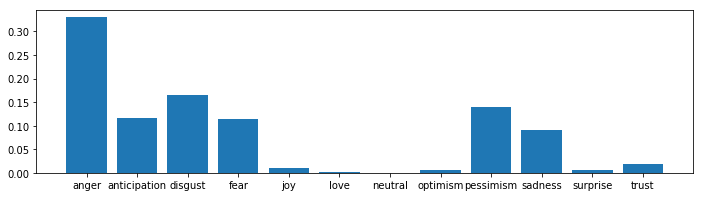

fklurar
[3.50334458e-02 3.78317028e-01 2.99335923e-02 2.26616293e-01
 2.09747814e-02 2.29755277e-03 1.24202794e-04 1.16114661e-01
 1.04313925e-01 3.59011553e-02 4.40612156e-03 4.59671952e-02]


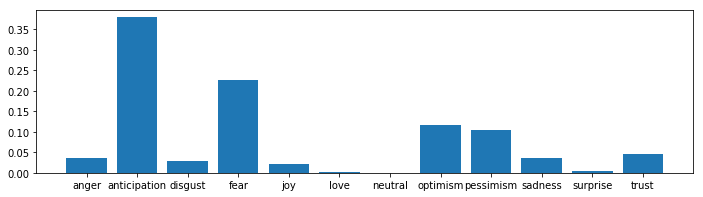

fk5cxor
[0.1714663  0.06662848 0.23952459 0.08845532 0.08540395 0.01273341
 0.00079937 0.03497603 0.20316766 0.04677649 0.02292016 0.02714829]


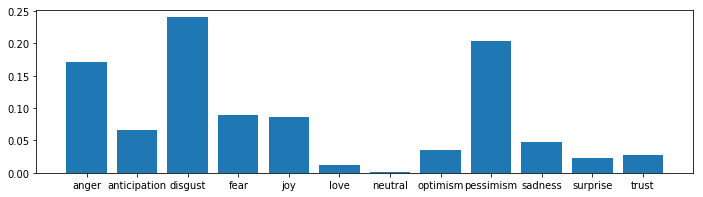

fis8h17
[7.81737361e-03 2.79350668e-01 4.38377820e-02 1.67164847e-01
 4.55009285e-03 2.23827595e-03 7.78298345e-05 3.35699357e-02
 2.89181083e-01 1.24495313e-01 1.35396905e-02 3.41771878e-02]


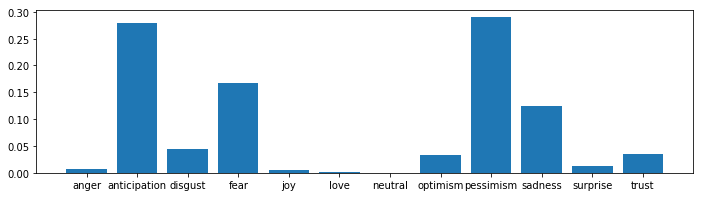

fity0qm
[0.1076251  0.1917779  0.07099151 0.12837242 0.02451379 0.00300465
 0.0021872  0.06974237 0.3201469  0.02837448 0.03280116 0.02046243]


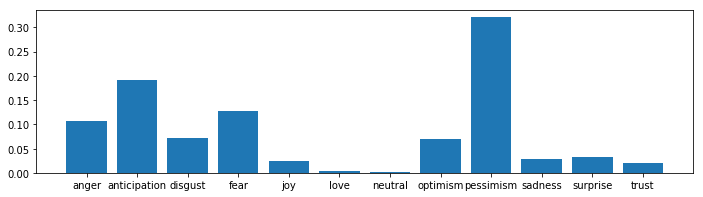

fj83o4x
[6.8533416e-03 3.5610619e-01 1.8807221e-02 3.0159995e-01 4.4352631e-03
 2.8660037e-03 8.6721657e-06 5.7471022e-02 1.6842979e-01 4.1729406e-02
 4.9660583e-03 3.6727063e-02]


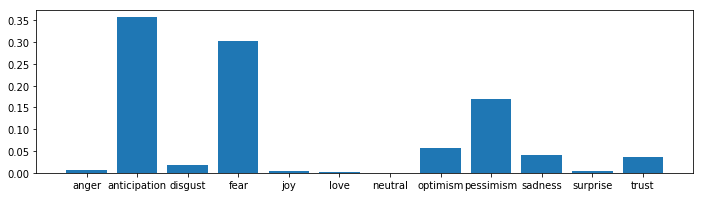

fk81t64
[0.00521629 0.06550856 0.03659138 0.11677866 0.2131168  0.01200056
 0.0082696  0.31303465 0.06534056 0.00549912 0.04020485 0.11843897]


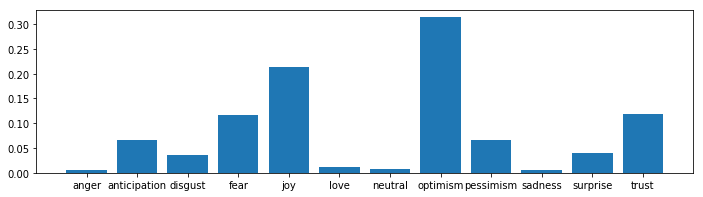

fkm8b1l
[1.4823368e-01 1.1743585e-01 2.2443053e-01 3.4034077e-02 5.1362444e-02
 1.8598014e-02 2.2354402e-04 1.5805964e-01 1.6116947e-01 2.1835150e-02
 1.7797377e-02 4.6820275e-02]


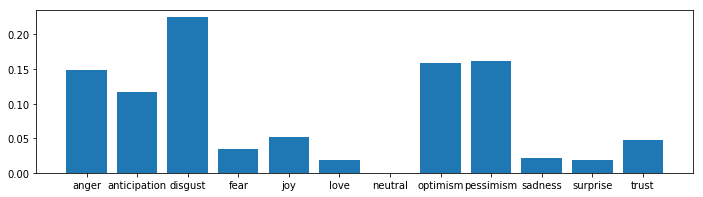

fkwstef
[0.00067525 0.2815941  0.00422701 0.1097789  0.04499622 0.00253256
 0.00734883 0.25403056 0.02792864 0.01461369 0.20181811 0.0504562 ]


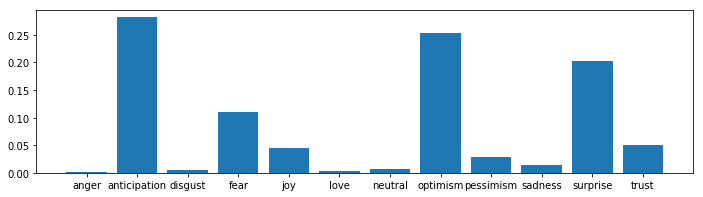

ffppuuh
[1.7541651e-01 1.1094419e-01 1.1574253e-01 1.4901200e-01 4.4591915e-02
 1.3483004e-02 1.9110007e-04 3.6868233e-02 2.5302866e-01 2.5256120e-02
 1.6964154e-02 5.8501620e-02]


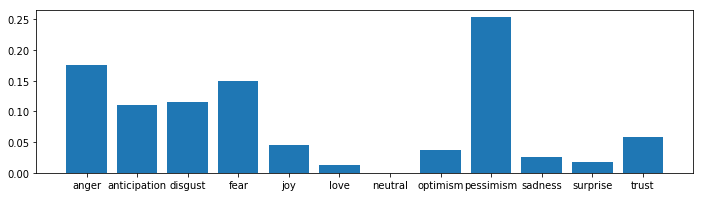

flan01i
[0.03731305 0.21657342 0.05849897 0.11888839 0.06596388 0.01054451
 0.00694193 0.03927608 0.3183499  0.04960899 0.0518654  0.02617541]


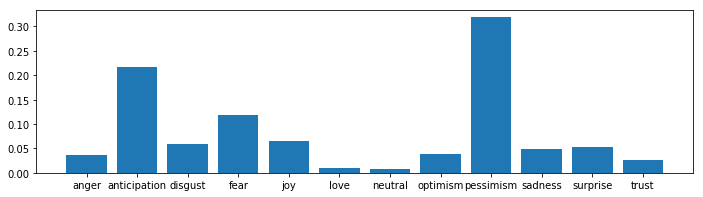

fkvz0rt
[2.0463711e-03 1.5020666e-01 1.3387648e-02 1.3339271e-01 8.1068808e-03
 2.3451874e-02 6.4558492e-07 5.5294698e-01 3.2188866e-02 2.4429323e-02
 1.4340410e-02 4.5501735e-02]


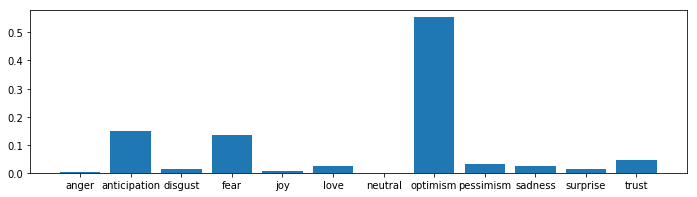

fk53a31
[2.39013490e-04 1.00285374e-02 9.05494453e-05 1.31088933e-02
 7.78998062e-03 3.72652892e-07 9.13751185e-01 6.37626159e-04
 7.05314847e-03 2.55121328e-02 2.16796454e-02 1.08945605e-04]


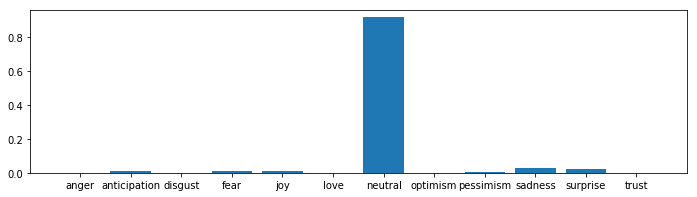

fjimbj8
[1.7810132e-01 2.9006472e-01 1.9168653e-01 1.0390502e-01 1.1121485e-03
 2.0156815e-03 4.5211615e-07 1.0785483e-02 2.0152001e-01 1.5376650e-02
 1.5386324e-03 3.8933803e-03]


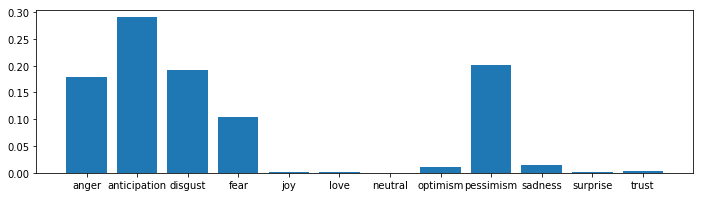

fj6ahtm
[0.01334614 0.30733067 0.04324589 0.22173616 0.02662801 0.00562824
 0.00191189 0.077376   0.19982523 0.03417667 0.00580795 0.06298716]


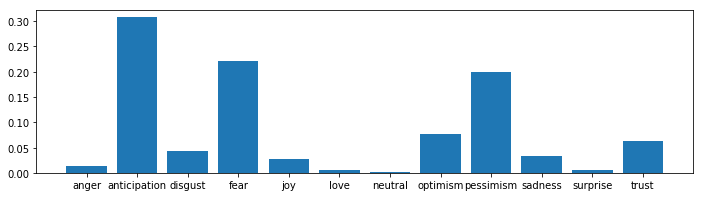

fkpkzbl
[0.0728953  0.1287411  0.1295378  0.15308438 0.0437356  0.00913337
 0.0014119  0.02159538 0.3394999  0.01827032 0.06741089 0.01468408]


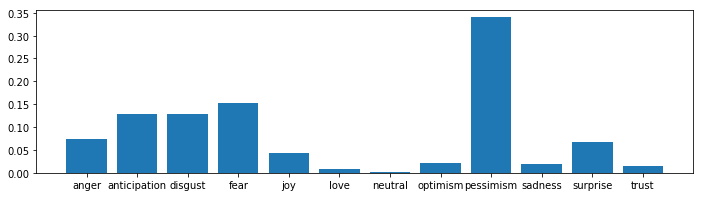

ffc8yo2
[2.0119236e-01 1.3246191e-01 1.1364719e-01 1.6917677e-01 3.4833571e-03
 1.6138625e-03 8.4390067e-06 2.3533102e-02 3.0879974e-01 3.4206025e-02
 1.0166910e-03 1.0860487e-02]


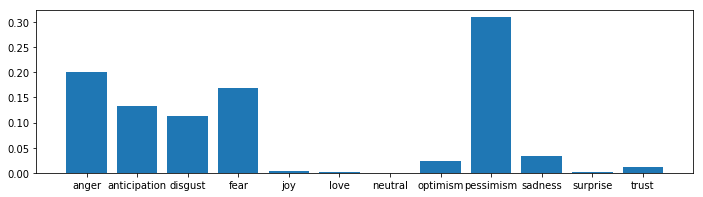

flbv3ui
[7.0455015e-02 3.0355856e-01 1.8931724e-01 1.5276411e-01 5.2262223e-03
 2.4682900e-03 2.3230599e-05 6.6092119e-02 9.1505833e-02 1.0437711e-01
 3.9257328e-03 1.0286494e-02]


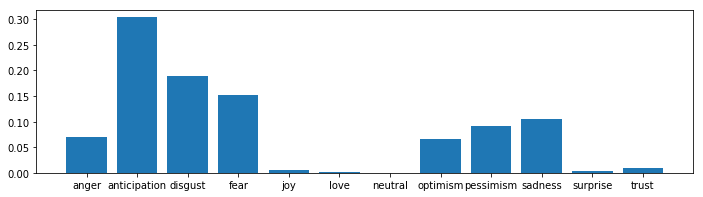

fiv4bph
[8.2785971e-02 2.3884612e-01 2.0528618e-01 8.3601199e-02 1.3694556e-02
 9.7157564e-03 3.7262700e-05 2.6690228e-02 2.7827922e-01 2.1880945e-02
 2.9616749e-02 9.5658442e-03]


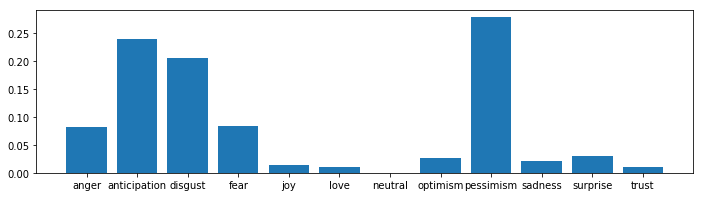

fgife36
[1.3129932e-01 2.0310898e-01 1.5481621e-01 1.4412780e-01 7.8877686e-03
 3.2831382e-03 7.1877941e-05 7.3783837e-02 2.3820418e-01 2.8688360e-02
 4.7715879e-03 9.9569056e-03]


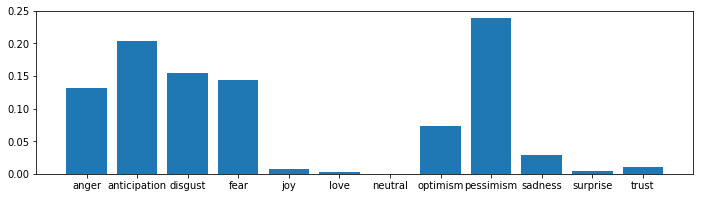

fkhqcwp
[1.9122081e-02 2.5149921e-01 1.6560966e-01 7.7111241e-03 1.7735416e-01
 1.7299267e-02 7.3405572e-05 2.7132702e-01 2.3740351e-02 7.5994208e-03
 1.4084941e-02 4.4579383e-02]


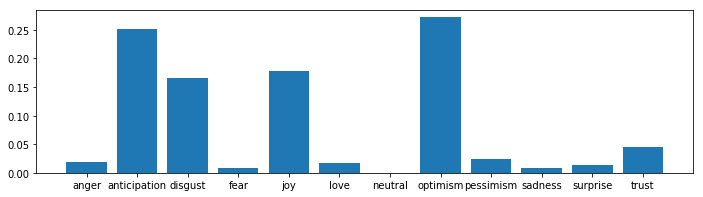

fkay1na
[0.0074494  0.23231453 0.02817447 0.23546508 0.02751333 0.0007166
 0.0023049  0.02028693 0.38153747 0.00898357 0.02540862 0.02984513]


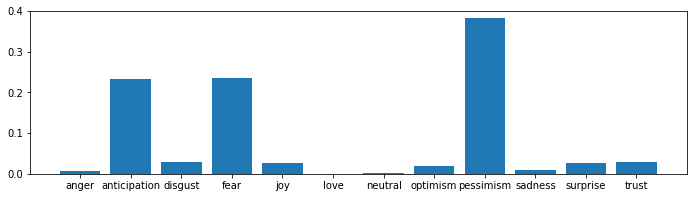

fjg4x4q
[0.00447915 0.41940036 0.00875264 0.19437739 0.01325957 0.00315972
 0.00149482 0.03219155 0.23807254 0.06647459 0.0146246  0.00371308]


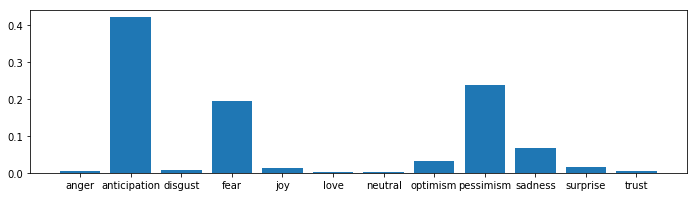

flbzyqx
[8.8118672e-02 8.4304951e-02 1.4489639e-01 2.5719771e-01 4.5232520e-02
 1.6976941e-02 1.2984837e-07 1.8833630e-01 2.5703048e-02 1.3427669e-01
 2.4714700e-03 1.2485207e-02]


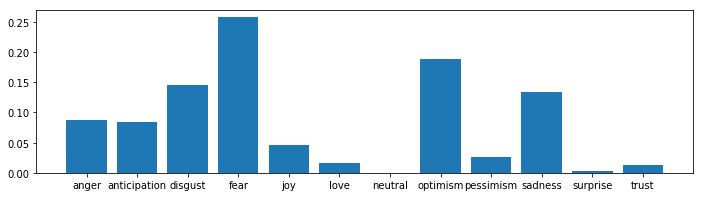

fk52d7w
[0.07673164 0.32513833 0.0909387  0.05876983 0.10510887 0.00644848
 0.00087433 0.05358025 0.12685004 0.04724297 0.03093113 0.07738544]


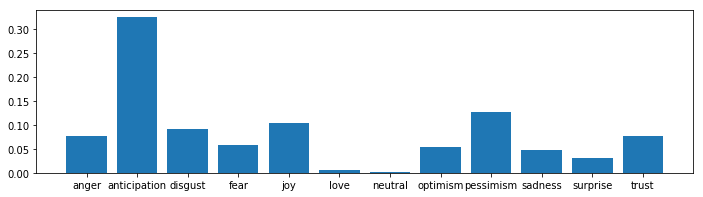

fjgrw0y
[1.0899250e-01 1.4677416e-01 1.9122201e-01 2.2264498e-01 1.7404255e-02
 5.3196480e-03 2.1335465e-05 1.9880585e-02 2.3258258e-01 1.8063582e-02
 6.8066283e-03 3.0287707e-02]


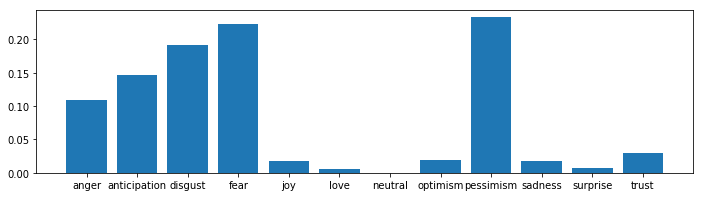

fk3ngea
[2.1221566e-01 8.2267351e-02 3.9773291e-01 2.8832491e-02 1.2094198e-02
 1.8817516e-03 2.5575790e-05 1.2807643e-02 1.8713461e-01 4.0499736e-02
 1.6486883e-02 8.0211479e-03]


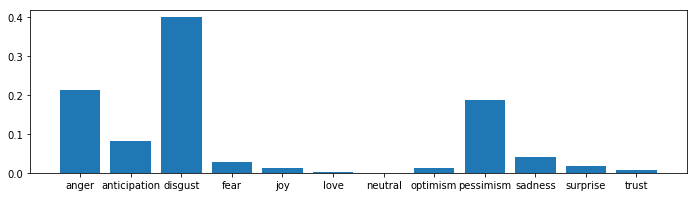

fksc5wq
[0.02333358 0.30634245 0.05112357 0.29951298 0.01587016 0.00658801
 0.00040271 0.03680492 0.06449997 0.12873368 0.02841684 0.03837112]


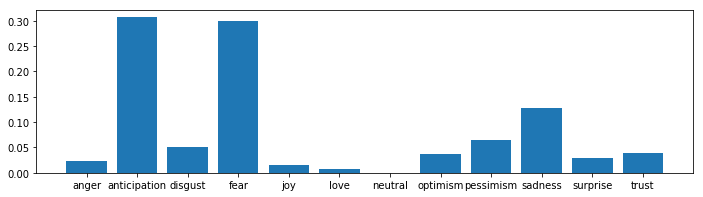

fjxu6lb
[2.8402956e-02 2.6177409e-01 9.5999949e-02 1.0221583e-01 2.6801217e-02
 3.9280234e-03 2.1160005e-04 4.4285834e-02 3.0442572e-01 8.8064848e-03
 6.6332050e-02 5.6816328e-02]


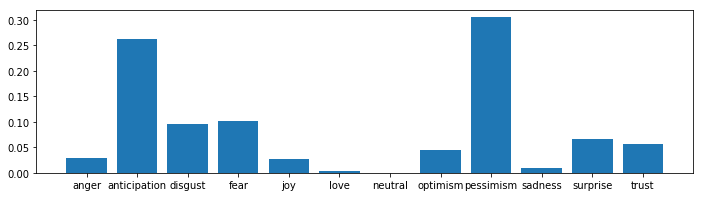

flcbbns
[0.11311472 0.14523323 0.19315739 0.03493755 0.05046888 0.00237208
 0.01106466 0.01037168 0.20813751 0.15891302 0.05789648 0.01433281]


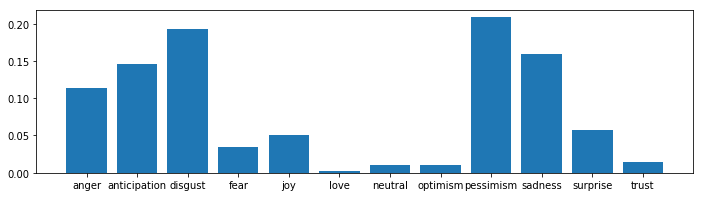

fj2rt0o
[0.1553096  0.23518468 0.06779828 0.07793156 0.05301107 0.01694356
 0.0002422  0.10264553 0.16216244 0.08226115 0.02748501 0.01902483]


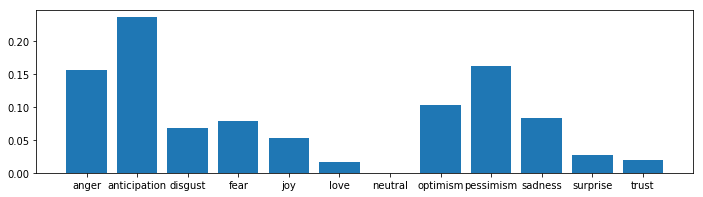

fjdpv46
[0.03066087 0.28890523 0.09254017 0.10849617 0.0358     0.01132108
 0.00097616 0.08036914 0.18683538 0.02627617 0.01617122 0.12164841]


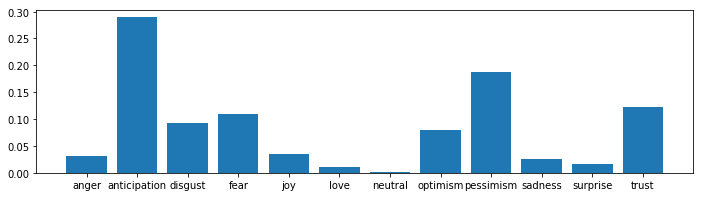

fkva7su
[4.5324884e-02 1.7447366e-01 6.1332915e-02 8.5417099e-02 1.0098952e-02
 4.4479175e-03 2.6327427e-04 1.0472197e-01 4.1935700e-01 2.2428399e-02
 1.8935734e-02 5.3198200e-02]


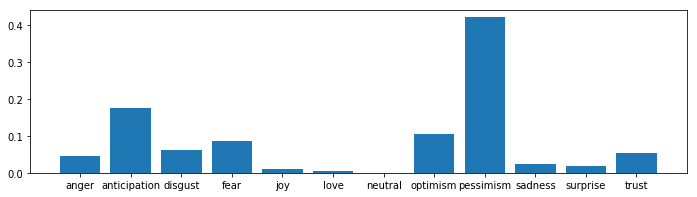

fk68ycq
[0.15822515 0.0535435  0.18884292 0.13145395 0.11562239 0.04749676
 0.00035974 0.08647081 0.10607205 0.0584777  0.0218449  0.03159007]


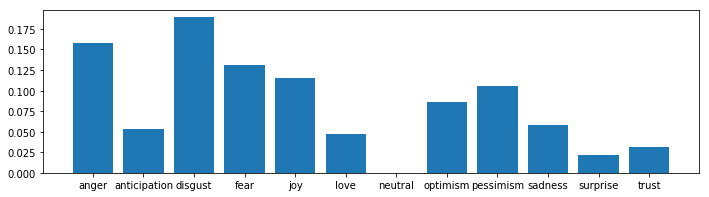

fkm7j9h
[0.10720208 0.09367838 0.12377704 0.00559343 0.0871801  0.00258088
 0.12955649 0.10307291 0.24552563 0.00210804 0.00987903 0.08984597]


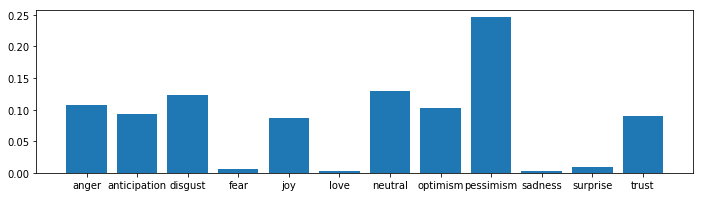

fjvguv1
[1.05123930e-02 4.39652652e-02 1.76201784e-03 1.01077974e-01
 2.01256983e-02 1.74577726e-05 5.98037481e-01 1.32258644e-03
 1.94904029e-01 1.54132806e-02 9.61765926e-03 3.24411388e-03]


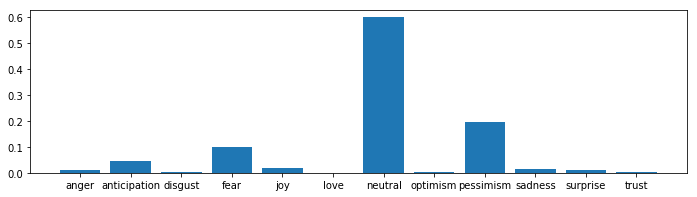

fg6h1u8
[0.00683012 0.45282552 0.02646835 0.17594194 0.0127707  0.00268509
 0.00127987 0.02233276 0.11804716 0.09917843 0.04697769 0.03466232]


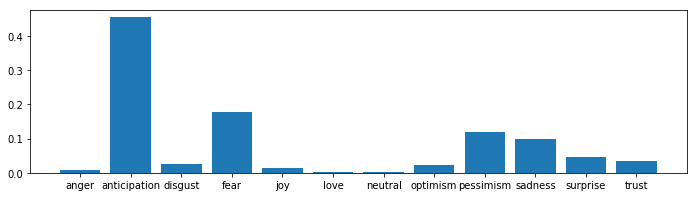

fixegyj
[5.8137372e-02 2.6618585e-01 6.4904802e-02 2.9498261e-01 6.1557065e-03
 6.2425053e-03 8.5743613e-06 1.5598062e-01 6.6038251e-02 4.2906851e-02
 4.2672222e-03 3.4189697e-02]


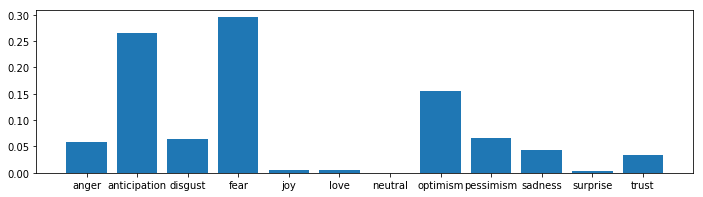

fks3yqn
[5.2243058e-02 1.5305600e-01 1.0943510e-01 9.0964615e-02 2.2806806e-02
 2.6013967e-02 1.2070159e-04 1.7307271e-01 2.4928169e-01 4.7934927e-02
 2.6357109e-02 4.8713326e-02]


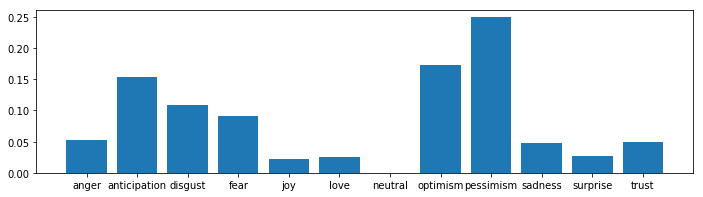

fkhxyom
[0.07296382 0.19370556 0.06644983 0.19502816 0.09586994 0.00995484
 0.00199224 0.03087688 0.1849045  0.04606275 0.04502432 0.05716715]


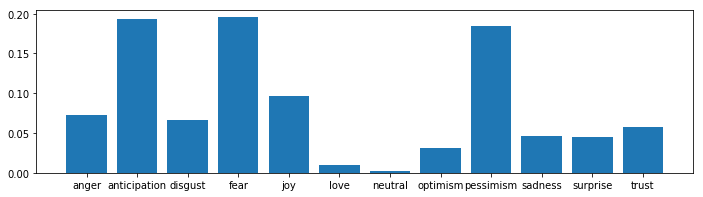

fk6394y
[1.84888914e-02 2.04316646e-01 4.18816693e-02 2.68488169e-01
 1.34825828e-02 1.47089595e-02 1.11531364e-04 1.29647568e-01
 1.67409927e-01 7.56902918e-02 3.31735760e-02 3.26002799e-02]


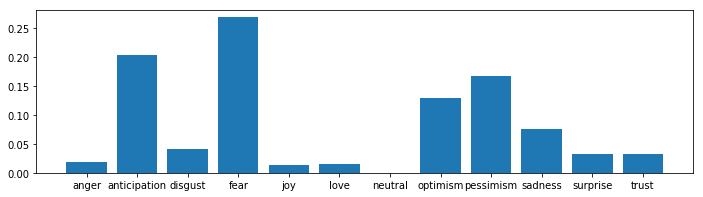

ffsp0kv
[8.5600521e-03 1.7253257e-01 7.5951271e-02 2.8783229e-01 8.5733533e-03
 1.7750588e-03 3.9353112e-05 2.5283001e-02 3.5694790e-01 3.4408335e-02
 6.9552222e-03 2.1141632e-02]


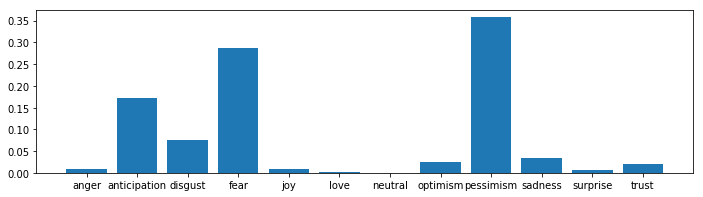

fjehieq
[2.6536185e-01 1.3224527e-01 2.2126439e-01 9.7403623e-02 1.9452753e-02
 9.2117088e-03 8.6453452e-05 8.4798355e-03 1.3568832e-01 6.2282201e-02
 4.0745299e-02 7.7782962e-03]


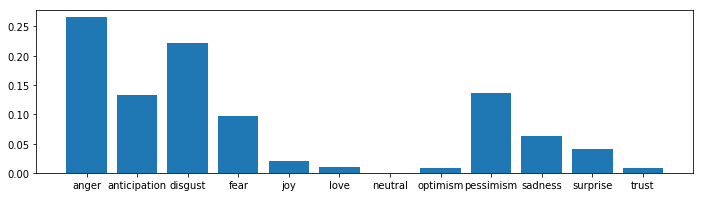

fki6xqh
[0.17806874 0.11990463 0.07779227 0.1326533  0.10141702 0.02294586
 0.00066463 0.06460539 0.23110284 0.02435033 0.01899616 0.02749881]


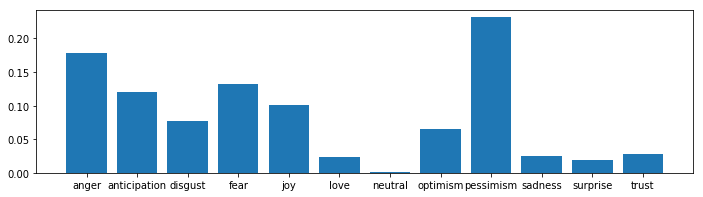

fk4taw5
[0.00896968 0.40159294 0.01005155 0.24688482 0.09054914 0.00092807
 0.05452619 0.0659958  0.04035332 0.02215353 0.02048705 0.03750791]


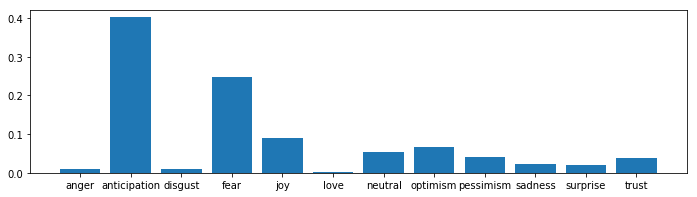

fijm369
[5.7124491e-03 1.6313760e-01 7.6174676e-02 4.0205866e-01 6.1813449e-03
 2.9291054e-02 9.5968389e-06 8.6504214e-02 5.6449771e-02 6.3656271e-02
 1.3957016e-02 9.6867345e-02]


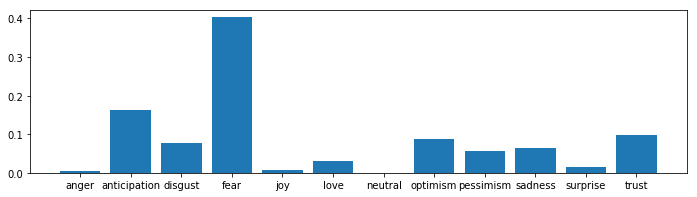

ffprmk0
[0.17844078 0.0926591  0.353675   0.08563669 0.06434347 0.0118719
 0.00038969 0.04058535 0.10491883 0.03710457 0.0122846  0.01809007]


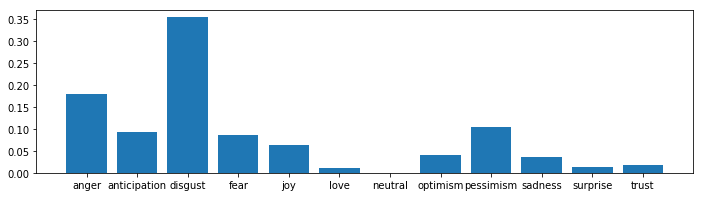

fhd4nux
[0.1577782  0.12347429 0.15253876 0.14264508 0.04865536 0.00855669
 0.00036998 0.04271029 0.12269031 0.11554488 0.04377899 0.04125716]


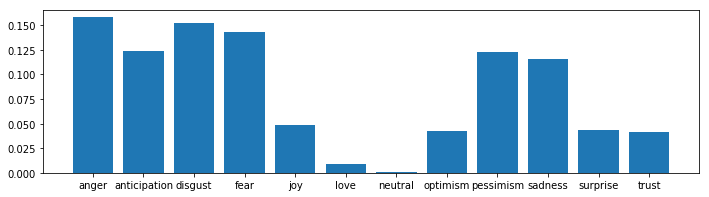

fj4zy85
[0.01185951 0.10811744 0.03777367 0.25671175 0.05201891 0.02442155
 0.00073975 0.2053551  0.06448924 0.05620101 0.06893416 0.11337795]


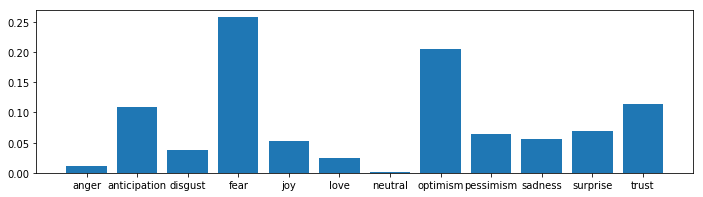

fkjsw5k
[0.14917606 0.10159956 0.0619964  0.08621532 0.07504891 0.00308198
 0.00953354 0.0187223  0.3918739  0.05656366 0.02524469 0.02094363]


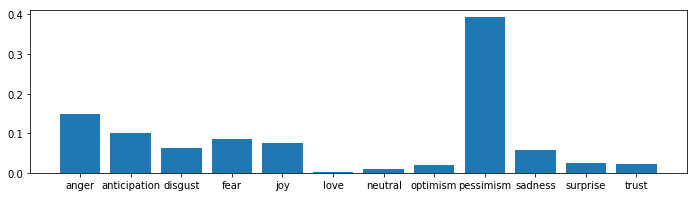

ff8rlo7
[0.03057624 0.18425554 0.04529193 0.12537476 0.07743264 0.01739836
 0.00061581 0.17968254 0.08122852 0.08975099 0.01432684 0.15406573]


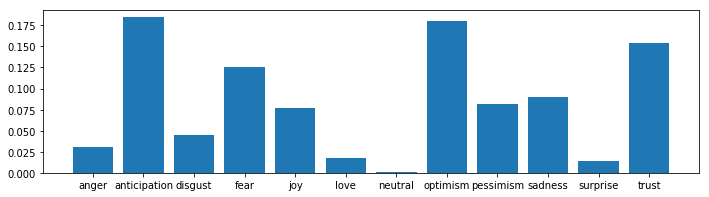

fjg3gii
[2.6127321e-01 3.0131064e-02 2.2816049e-01 1.3257738e-02 5.4244633e-04
 4.5746699e-04 4.8927785e-07 4.2231422e-04 4.5903572e-01 4.8843850e-03
 1.2110167e-03 6.2362204e-04]


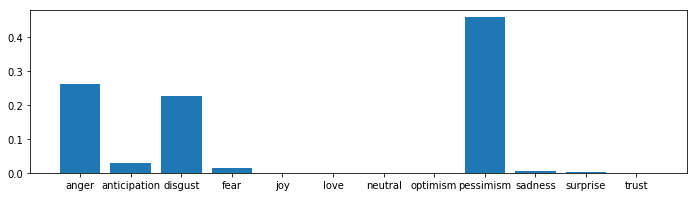

fkz51iu
[2.6950024e-02 2.4777138e-01 6.7983299e-02 1.5218696e-01 2.2342955e-03
 6.9457456e-04 9.0882735e-05 6.8832776e-03 3.5450730e-01 1.2238676e-01
 1.5551124e-02 2.7601104e-03]


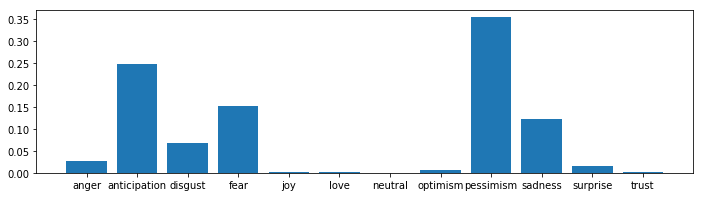

fjp1zj5
[0.03109685 0.07477207 0.22795945 0.09343483 0.08607525 0.01882665
 0.00024855 0.14033392 0.07356521 0.06829389 0.072152   0.11324137]


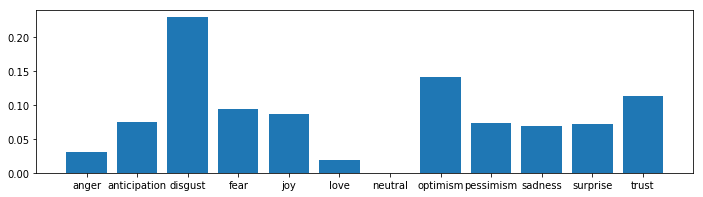

fib0xfb
[9.7902594e-03 3.7393060e-01 1.3529963e-02 1.8855591e-01 1.5796048e-03
 5.6335080e-04 1.6843782e-05 1.3989862e-02 1.4410588e-01 2.2546798e-01
 2.5454786e-02 3.0149843e-03]


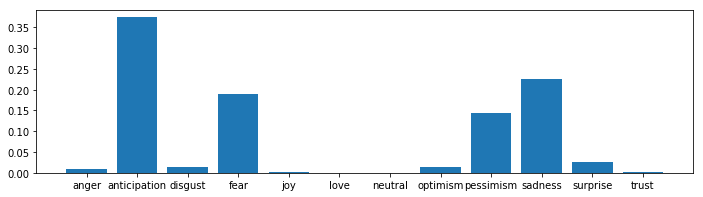

fkim5dr
[1.3512418e-01 2.1458371e-02 1.3762683e-01 2.0104043e-01 4.6167253e-03
 5.1924093e-03 1.7580609e-07 2.1705535e-01 2.5420958e-01 8.2821888e-04
 3.1038900e-04 2.2537362e-02]


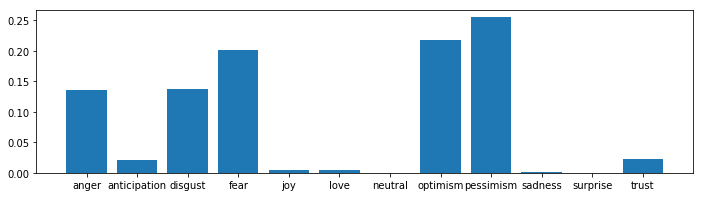

fj6y9k2
[1.24441035e-01 2.85916440e-02 9.30356383e-02 3.27043295e-01
 2.61947196e-02 7.98510667e-03 2.82735600e-05 1.40524348e-02
 1.87528715e-01 1.60791054e-01 2.44892836e-02 5.81882289e-03]


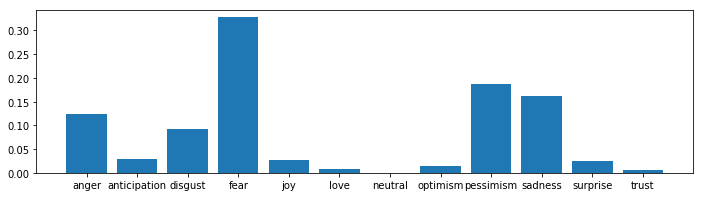

fkgqoxh
[1.7693721e-03 1.9943780e-01 2.8010676e-04 3.3004126e-01 2.3700695e-02
 1.8732877e-04 6.2538744e-03 1.1052938e-01 2.7211368e-01 4.6075746e-02
 6.0057244e-03 3.6049851e-03]


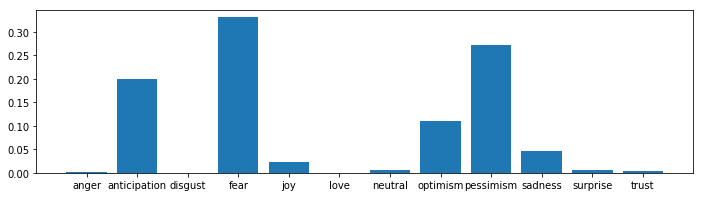

fikbako
[7.3759262e-03 2.4774987e-03 1.7374621e-03 1.4859863e-03 4.3490678e-02
 1.9941494e-04 9.2589873e-01 1.1164220e-03 7.7285259e-03 2.1183663e-03
 5.8232448e-03 5.4786186e-04]


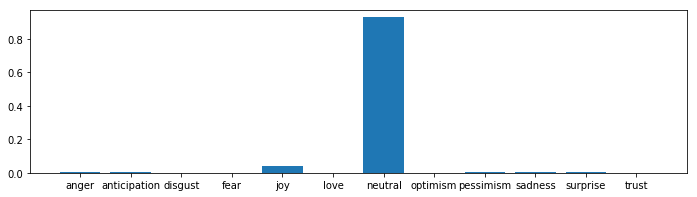

fjgzzyu
[0.16870877 0.16661543 0.12832676 0.05432562 0.04825209 0.00206928
 0.0060732  0.01831636 0.32474053 0.02936301 0.04472227 0.00848666]


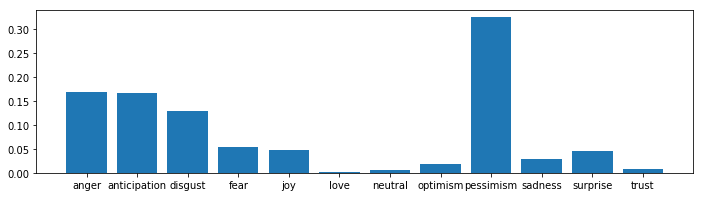

fka9akd
[1.8079020e-02 3.2763425e-01 5.5614300e-02 2.5153810e-01 5.0788969e-03
 1.8943625e-02 3.7935508e-05 6.2955752e-02 1.0154197e-01 8.0602862e-02
 1.2748034e-02 6.5225258e-02]


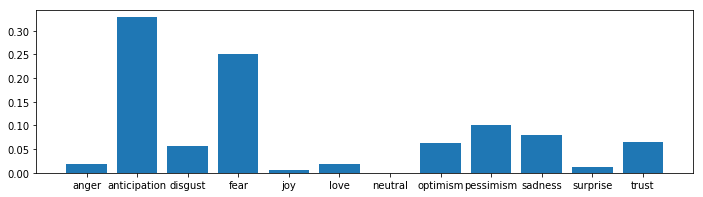

fi8ue8y
[3.3958480e-02 1.5594986e-01 8.3574235e-02 1.6189441e-01 2.8884191e-02
 2.7424159e-02 6.1630421e-06 2.5943026e-01 5.1975396e-02 1.3041461e-01
 3.4702711e-02 3.1785529e-02]


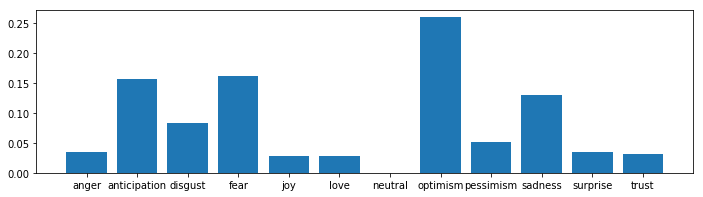

fl7okgz
[7.9865875e-03 3.1037396e-01 1.9411243e-02 2.7616316e-01 2.7580075e-02
 1.7352259e-03 1.3266884e-04 7.8714341e-02 1.4006633e-01 4.8491675e-02
 7.7312917e-02 1.2031756e-02]


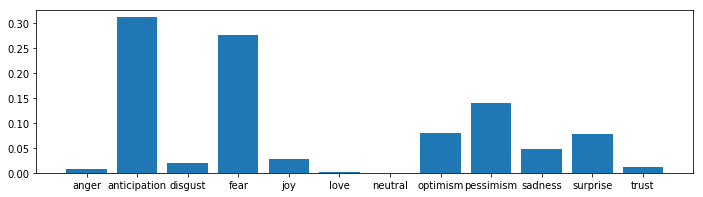

fl9m7r8
[1.3511838e-01 1.6182116e-01 2.1941470e-01 1.3610430e-01 1.4231932e-02
 1.8190021e-02 2.8888613e-05 6.1083764e-02 1.4214498e-01 5.7988066e-02
 8.0147609e-03 4.5859005e-02]


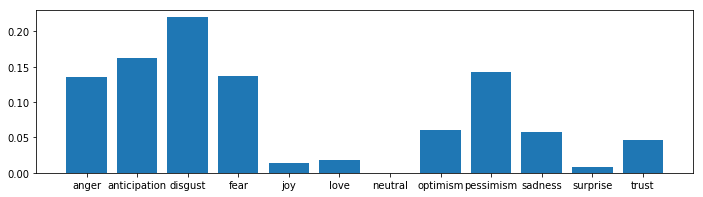

fjuoazv
[3.0738914e-02 3.7068691e-02 6.1535913e-02 3.2288048e-01 3.6932714e-02
 1.7631145e-02 8.8908628e-06 5.7358697e-02 2.0125374e-01 1.3712989e-01
 4.4706583e-02 5.2754294e-02]


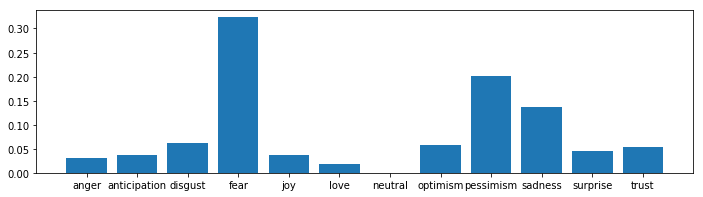

fj3lpg5
[9.5615507e-04 2.6638865e-01 1.5881544e-02 2.7802798e-01 8.1035420e-03
 1.7834842e-03 2.0315542e-06 2.9470181e-01 3.0702820e-02 1.9443514e-02
 7.4263506e-02 9.7449841e-03]


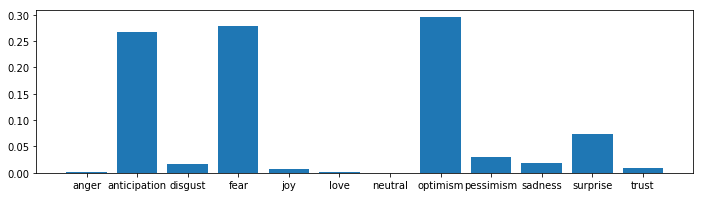

fjhvacr
[1.2500165e-01 1.1942012e-01 1.5314995e-01 1.8537749e-01 2.8688656e-02
 3.8700305e-02 2.8630644e-05 1.3028352e-01 1.2672199e-01 4.4730335e-02
 2.1751726e-02 2.6145583e-02]


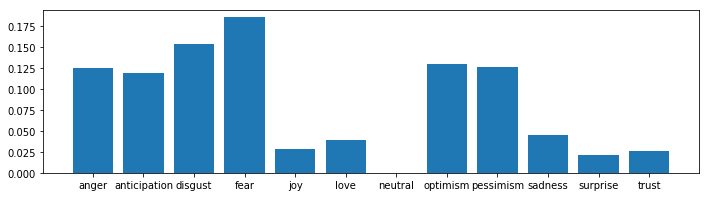

fhkck1b
[0.00812881 0.22249085 0.05173628 0.2624646  0.04593568 0.00829269
 0.00247811 0.13784355 0.10714699 0.01564212 0.07698501 0.0608553 ]


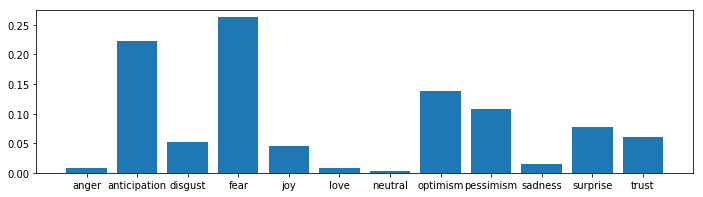

fitsb0s
[1.8619707e-02 4.4525680e-01 6.6283658e-02 4.1045997e-02 1.3618199e-02
 1.8832661e-02 1.8567223e-05 2.0264836e-01 9.7622149e-02 6.9771772e-03
 1.9288381e-03 8.7147929e-02]


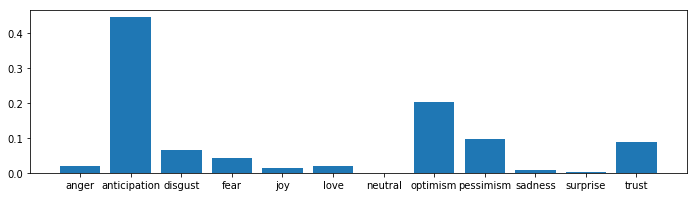

fgnmayt
[5.3330589e-02 3.3262590e-01 7.6643668e-02 1.6879499e-01 5.3828318e-02
 1.5077321e-02 9.4044175e-05 5.9319459e-02 7.0204116e-02 7.4526429e-02
 3.8637619e-02 5.6917582e-02]


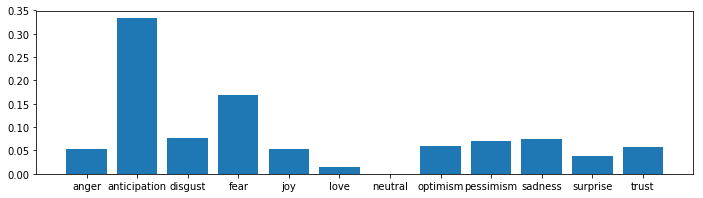

fhr4tr1
[1.42576039e-01 2.52393693e-01 1.11848734e-01 1.16086788e-01
 7.58637208e-03 2.51851627e-03 1.28762462e-04 1.97844412e-02
 2.65007049e-01 3.81266326e-02 1.43315839e-02 2.96114627e-02]


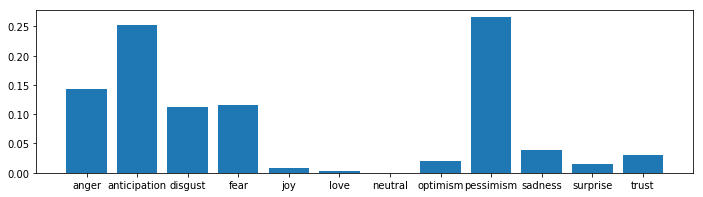

fl39hds
[1.78320631e-02 3.91350091e-01 3.01483665e-02 1.41739845e-01
 6.05110824e-03 1.27183758e-02 2.65694653e-05 1.76216826e-01
 1.14575475e-01 5.72545305e-02 2.07168497e-02 3.13698575e-02]


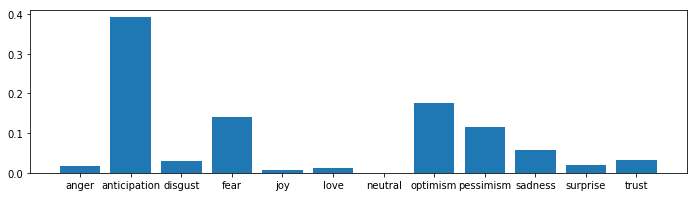

fjb6lw8
[0.04208845 0.15588191 0.02821095 0.33799732 0.08463014 0.00700712
 0.00117618 0.05402778 0.15121783 0.03967136 0.04507995 0.05301096]


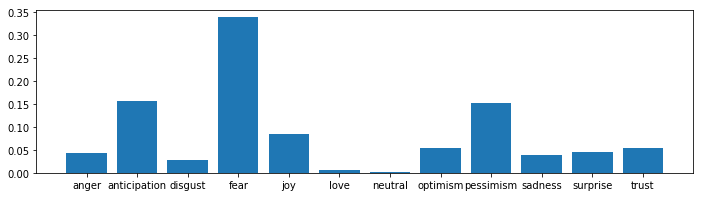

fl0osqn
[4.33558458e-03 1.79963738e-01 3.78220864e-02 1.81778401e-01
 1.46789625e-02 2.17032935e-02 3.65696687e-05 2.60023594e-01
 1.01414777e-01 9.48509499e-02 6.30831867e-02 4.03088406e-02]


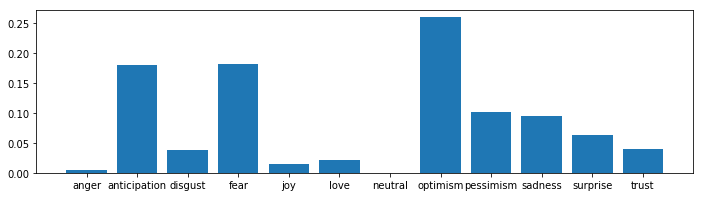

flcw4ej
[0.01353435 0.25435847 0.08807728 0.16902032 0.10829005 0.01222892
 0.00344689 0.0430031  0.08121561 0.13236876 0.06728278 0.02717345]


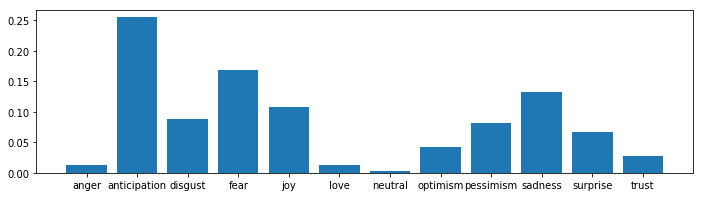

fkabow3
[5.3350952e-02 3.0545861e-01 8.4005281e-02 2.0567672e-01 1.6714262e-02
 1.5847785e-02 1.8681714e-04 6.5891184e-02 1.2789227e-01 4.8063766e-02
 8.4976424e-03 6.8414763e-02]


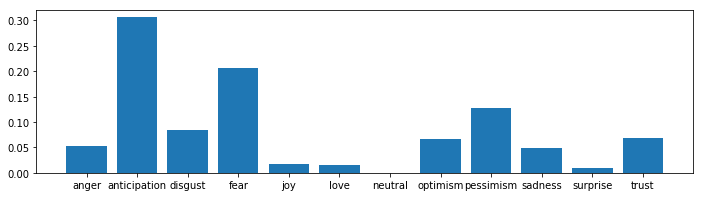

fk7gw5k
[2.20811859e-01 4.04454693e-02 2.18727350e-01 2.70754784e-01
 1.30093135e-02 9.45615303e-03 2.26915927e-05 6.49728393e-03
 1.56155378e-01 5.08160256e-02 6.60479255e-03 6.69888360e-03]


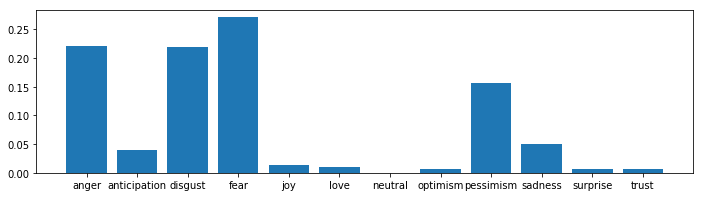

fks1n0c
[0.26241347 0.04442888 0.11837617 0.04273567 0.13501169 0.00405366
 0.09893017 0.00720117 0.151663   0.05759338 0.07472686 0.00286586]


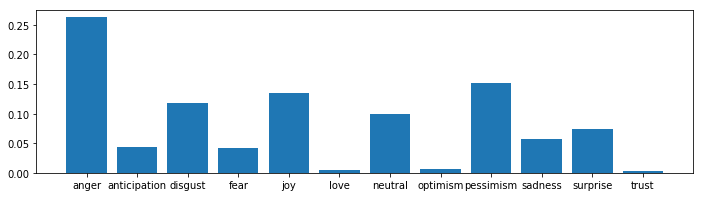

fkt2dvk
[1.6998108e-02 4.3572217e-01 1.5947588e-01 8.6358853e-02 6.2692966e-03
 5.3298520e-04 6.2313440e-05 3.0650837e-02 1.4734131e-01 4.7150038e-02
 2.1015177e-02 4.8423059e-02]


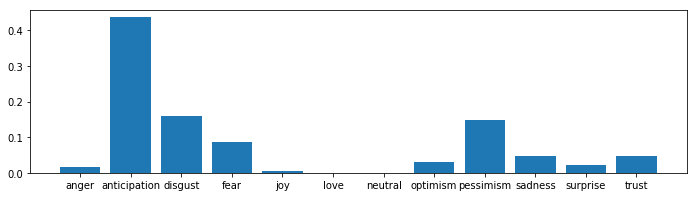

flcn6qv
[4.5926120e-02 2.5137034e-01 1.7627311e-01 1.2269609e-01 6.7833592e-03
 2.8808141e-02 4.2924162e-06 1.0936540e-01 1.9737887e-01 3.6821969e-02
 5.3942408e-03 1.9178128e-02]


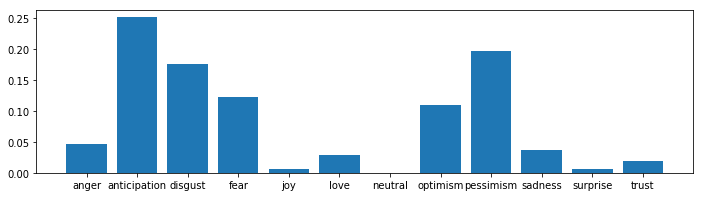

flec5l1
[1.3292687e-01 1.5829603e-01 1.6927606e-01 1.5213846e-01 8.7861773e-03
 8.1972713e-03 3.0333922e-05 7.2259873e-02 2.0588441e-01 7.4629553e-02
 8.4273042e-03 9.1476757e-03]


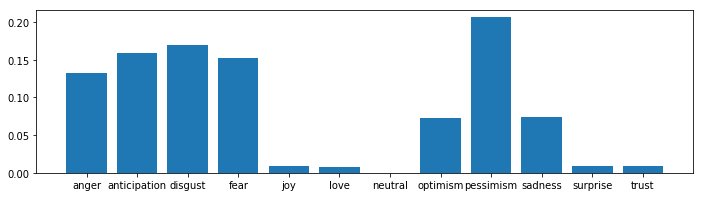

fl07nmd
[6.66907355e-02 2.29950279e-01 1.24201290e-01 3.96508090e-02
 1.32637592e-02 6.84767822e-03 1.94237378e-04 2.45616004e-01
 1.87104449e-01 2.08783690e-02 1.18394075e-02 5.37629500e-02]


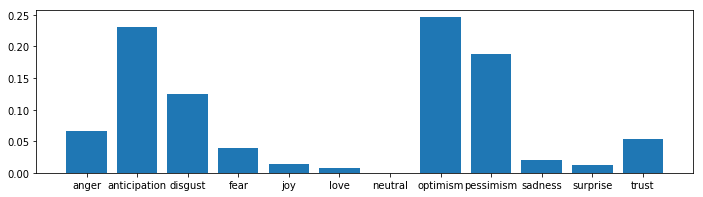

fko3hj0
[2.6054012e-02 2.4429207e-01 1.2448856e-02 3.5056931e-01 8.3791027e-03
 1.7572407e-03 2.8894136e-05 1.1130640e-01 1.9489688e-01 2.0324800e-02
 9.2112971e-03 2.0731203e-02]


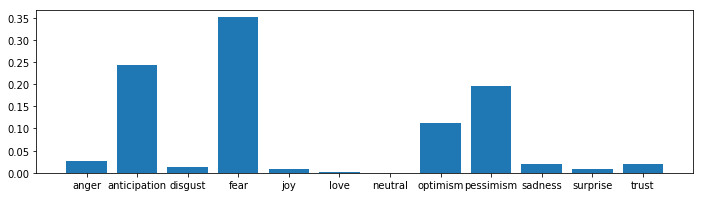

fjmp74j
[6.6676095e-02 4.2039526e-01 6.6809714e-02 3.9989635e-02 1.9364594e-02
 2.9386282e-02 9.4575171e-06 1.4477272e-01 1.3306618e-01 4.8046220e-02
 1.1632892e-02 1.9850908e-02]


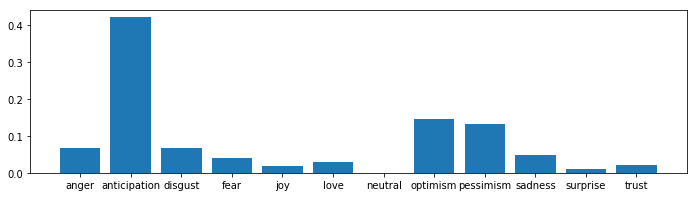

fkxo11t
[0.07734086 0.08082563 0.22426115 0.03532048 0.09356083 0.08423681
 0.00220002 0.07240461 0.23089455 0.00846731 0.05682674 0.03366095]


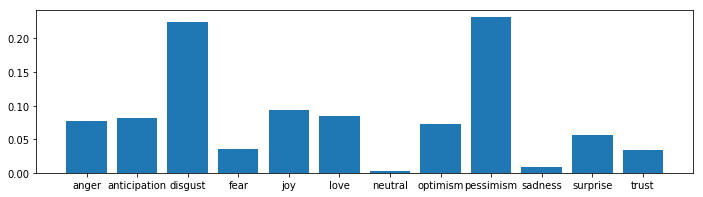

fjq12gz
[2.1802288e-02 1.8527752e-01 1.6009587e-01 1.2162780e-01 1.2247629e-02
 8.3162496e-03 2.2350529e-05 1.1851801e-01 2.4159957e-01 6.6753477e-02
 1.7489646e-02 4.6249550e-02]


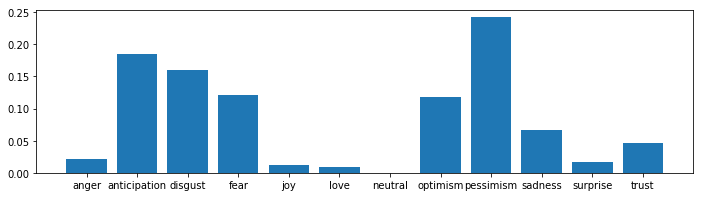

fkyssin
[0.26437056 0.10792149 0.12245218 0.03114453 0.07828684 0.00673465
 0.00032038 0.04470122 0.26525867 0.01219977 0.01535175 0.051258  ]


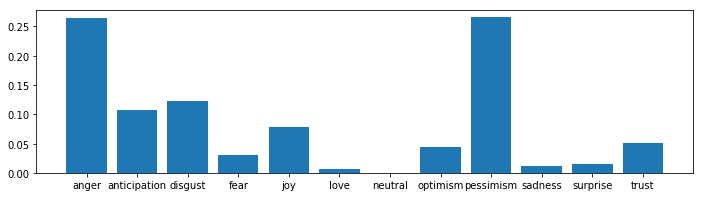

fjd6t9z
[1.6594490e-02 3.5839450e-01 1.0155308e-02 7.6134801e-02 6.8586750e-04
 3.0681834e-04 1.1888728e-05 6.4066999e-02 4.0620831e-01 5.0989151e-02
 8.7654907e-03 7.6863714e-03]


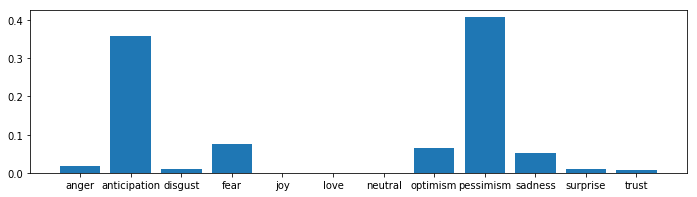

fl249mm
[0.03652737 0.3157462  0.04717117 0.21535172 0.01305375 0.00254001
 0.00061312 0.03933695 0.09637541 0.15612546 0.05345411 0.02370477]


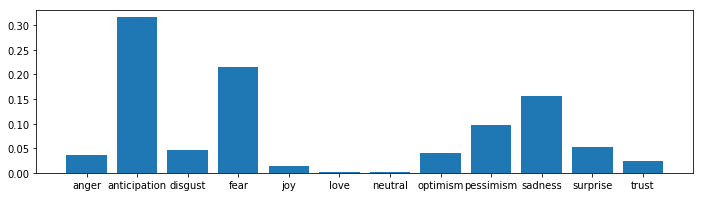

fip3944
[0.18859518 0.07795049 0.1818138  0.01681306 0.13484575 0.01747536
 0.01102784 0.06114253 0.20188795 0.02691648 0.03713098 0.0444006 ]


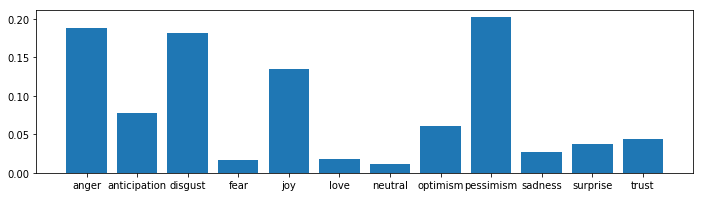

fkvhyos
[4.9627079e-03 2.6020119e-01 1.0647019e-01 2.0652789e-01 4.6466570e-02
 1.3670816e-02 6.8819165e-05 1.8003452e-01 4.7301259e-02 3.4907643e-02
 1.4643186e-02 8.4745213e-02]


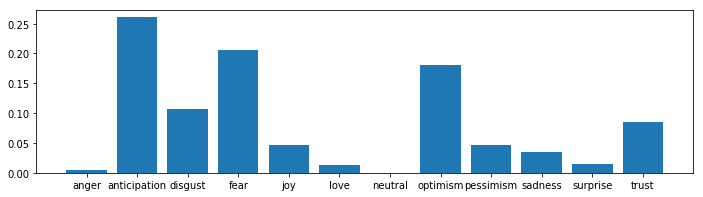

fj2wgiv
[6.4219780e-02 3.2401621e-01 6.4159699e-02 1.4840692e-01 6.3860556e-03
 5.1366403e-03 2.4397803e-05 8.3929487e-02 2.1721992e-01 6.2752098e-02
 1.2334257e-02 1.1414480e-02]


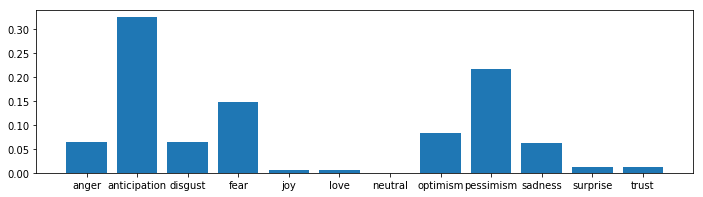

fj97vdt
[8.8282198e-02 2.9778317e-01 1.8811063e-01 1.1233217e-01 6.7986753e-03
 7.2811814e-03 6.9128049e-07 1.8735401e-01 4.5379356e-02 3.7575398e-02
 8.1157562e-04 2.8290888e-02]


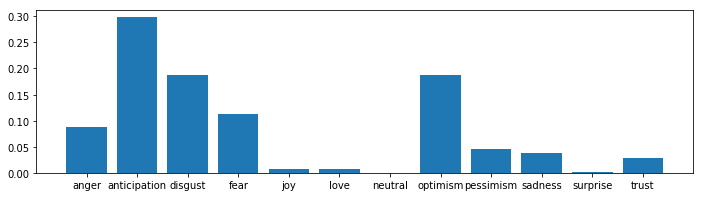

fkc2m2b
[1.7975588e-01 5.8474258e-02 2.9748407e-01 7.5782128e-02 5.8611361e-03
 1.0964409e-02 3.9306465e-06 4.3465629e-02 2.4701111e-01 3.8819008e-02
 1.2259825e-02 3.0118611e-02]


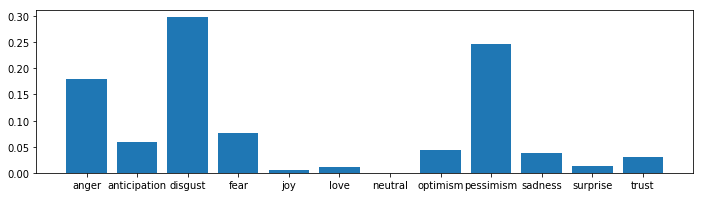

fhrsay2
[0.10809929 0.34032965 0.0938753  0.07411707 0.00930838 0.00038313
 0.00405515 0.00872034 0.214139   0.07639977 0.04893525 0.02163765]


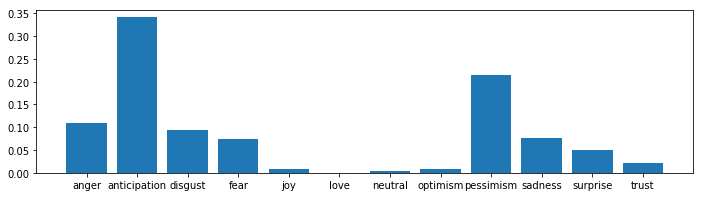

fkqdnba
[8.1351809e-02 2.5191209e-01 9.0596788e-02 3.9013762e-02 8.1582395e-03
 8.7839374e-03 1.1367736e-04 6.8146951e-02 4.1351557e-01 1.8479658e-02
 4.4203303e-03 1.5507262e-02]


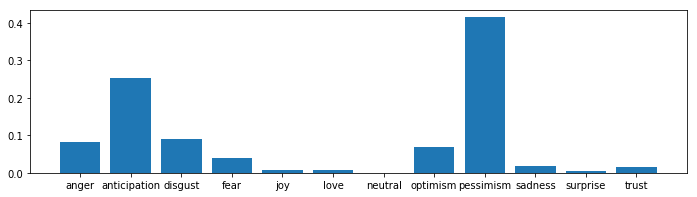

fiwhzb9
[0.09444172 0.30890483 0.16425341 0.12044361 0.06777224 0.00956086
 0.00144754 0.03724657 0.0571856  0.03149412 0.03299612 0.07425335]


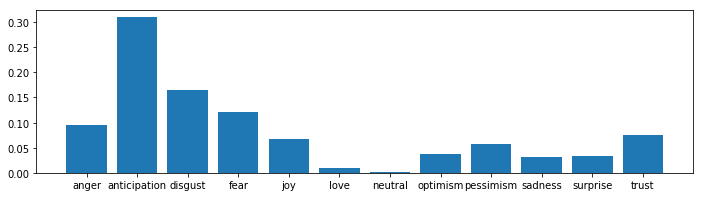

fk4ldkt
[0.17355144 0.01868946 0.18403713 0.03220451 0.27867833 0.01838544
 0.0007554  0.10700925 0.10000727 0.01314249 0.04653485 0.02700446]


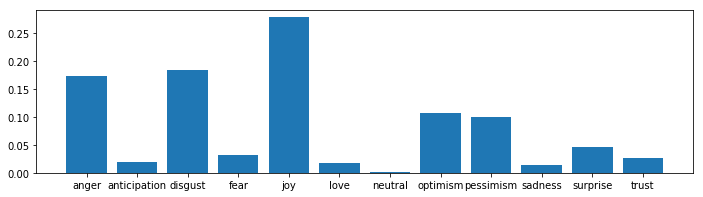

fi0c92g
[3.58716324e-02 1.51673183e-01 6.88544363e-02 2.40433648e-01
 1.10436355e-04 4.76802816e-04 4.29932534e-08 4.86911321e-03
 4.71950680e-01 2.49759164e-02 3.68671375e-04 4.15434391e-04]


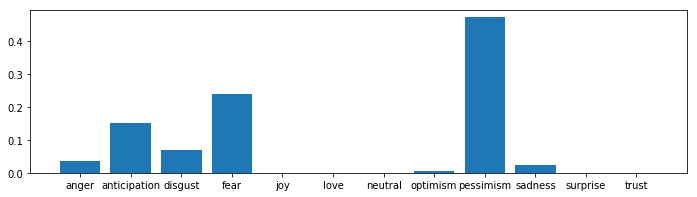

fgppntj
[1.3283084e-02 2.7759117e-01 6.2703140e-02 2.3198731e-01 2.0592783e-03
 4.3229167e-03 3.9051224e-06 1.0010605e-01 2.5686908e-01 3.1981207e-02
 3.3429547e-03 1.5749911e-02]


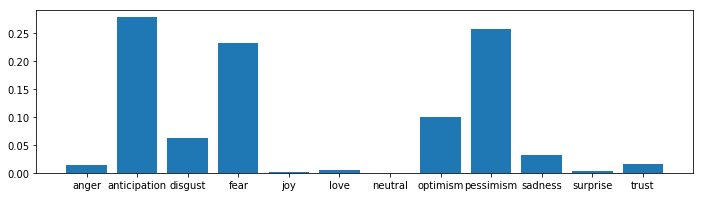

fhksnrd
[0.00110853 0.21978606 0.04539241 0.01437511 0.01331805 0.02309967
 0.00039005 0.28119794 0.03235205 0.00585721 0.0428371  0.32028586]


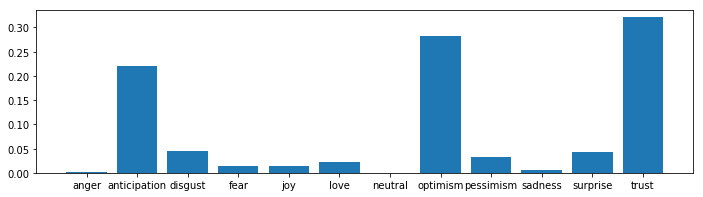

fkydaah
[1.2071698e-02 1.8627654e-01 2.3992218e-02 3.7074265e-01 1.8461177e-02
 2.6302668e-03 1.7428178e-04 4.8533615e-02 1.2698828e-01 1.6147508e-01
 3.5012227e-02 1.3641898e-02]


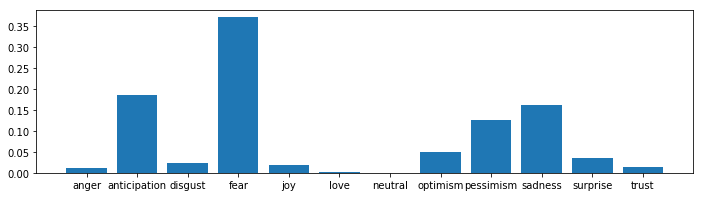

fh99cdc
[1.06762275e-02 2.24250197e-01 1.13987483e-01 7.08820224e-02
 2.67961454e-02 1.49175942e-01 5.18979050e-06 1.70854911e-01
 8.61828998e-02 9.79676470e-02 3.60050723e-02 1.32162720e-02]


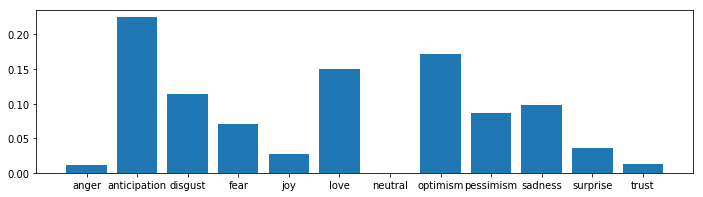

fl4ef2l
[0.04237054 0.18234168 0.0807011  0.0820759  0.07382038 0.02391596
 0.00085179 0.22986813 0.11096811 0.0309195  0.02407691 0.11809006]


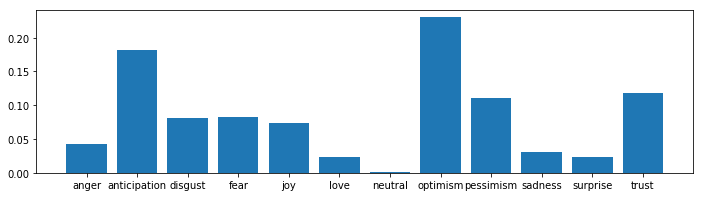

flabpyo
[2.3701195e-02 1.8406253e-01 8.0599681e-02 2.1909420e-01 6.2343932e-04
 4.8662949e-04 5.1581009e-07 2.7641408e-02 4.4348770e-01 5.3461469e-03
 3.8139513e-04 1.4575164e-02]


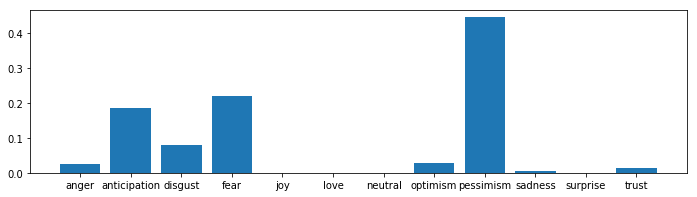

fjlgx5t
[2.8307941e-03 4.1077152e-01 5.3413567e-04 5.6937432e-01 2.4721169e-04
 1.2492996e-05 3.5430201e-09 4.3862346e-03 5.6649800e-03 5.6426283e-03
 1.3085083e-05 5.2251189e-04]


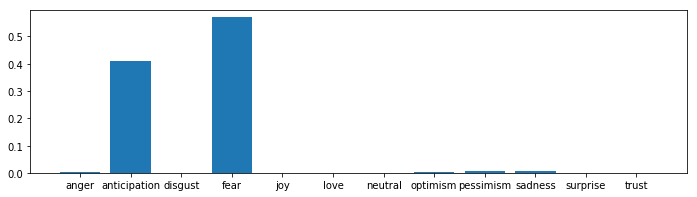

fkepfy6
[1.4661734e-01 1.2929113e-01 2.2880767e-01 1.3883835e-01 1.2873519e-03
 1.7914646e-03 8.5169489e-07 3.6434866e-03 3.1570324e-01 1.4771130e-02
 3.1373519e-03 1.6110644e-02]


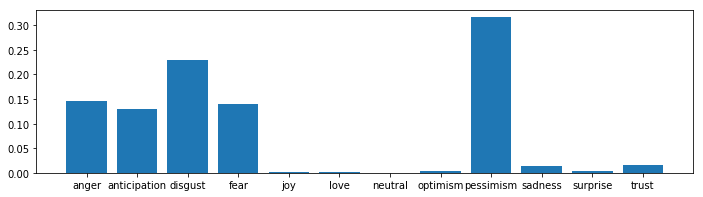

ffhpx6y
[7.4084611e-03 1.8775252e-01 3.4253307e-02 2.6530498e-01 2.2852730e-03
 1.9151911e-01 1.3150178e-07 3.2387201e-02 1.4725773e-01 1.1691747e-01
 3.3428643e-03 1.1570978e-02]


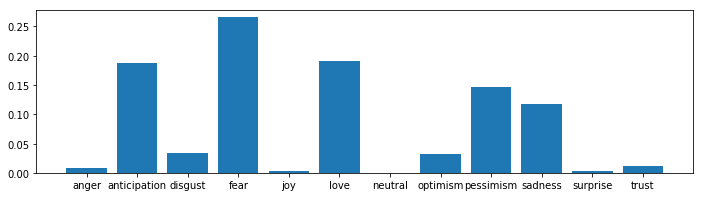

fkllu23
[0.36003417 0.03822191 0.21651691 0.05520282 0.08198743 0.00782339
 0.00043372 0.00244087 0.183259   0.03378263 0.01659836 0.00369882]


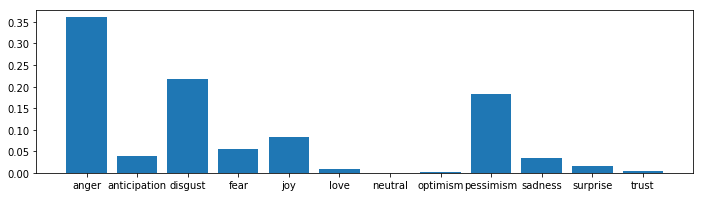

fh2xjap
[2.69511789e-01 7.65588284e-02 3.03027630e-01 7.54292235e-02
 7.99994394e-02 6.54135132e-03 2.60760047e-04 1.88944861e-02
 1.03656024e-01 3.54290381e-02 1.19038559e-02 1.87875498e-02]


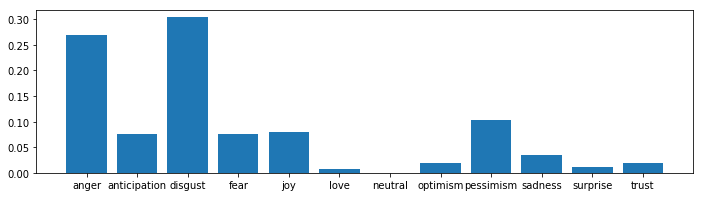

fk7jtwo
[4.7484017e-03 6.6020496e-02 8.4144119e-03 8.9815038e-01 8.3142353e-05
 2.4693471e-03 5.2775380e-12 1.5343402e-02 2.5444571e-03 1.3259187e-03
 1.1637696e-05 8.8835851e-04]


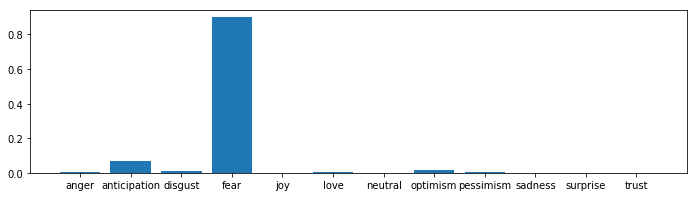

fkab430
[5.9996385e-02 2.3625383e-01 6.9695644e-02 9.5438570e-02 3.6542963e-02
 1.1488837e-02 2.2254449e-04 1.8272151e-01 1.3906144e-01 4.1224223e-02
 8.7172076e-02 4.0181875e-02]


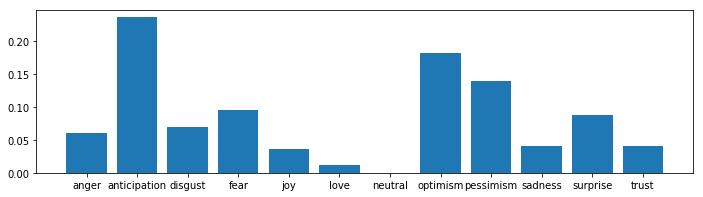

fje2du4
[4.8887242e-02 2.7258152e-01 1.9677754e-01 1.4007491e-01 2.2377709e-02
 4.9083978e-02 3.7834157e-05 7.5329453e-02 8.3063714e-02 3.7067425e-02
 1.1173277e-02 6.3545436e-02]


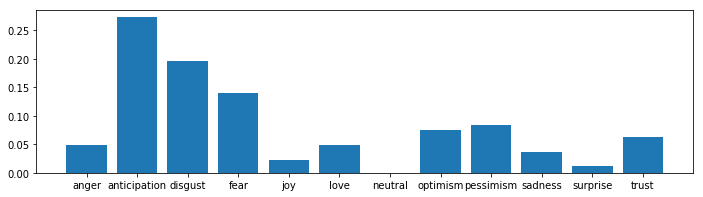

fkd20y3
[0.0936441  0.15403588 0.13246827 0.07576991 0.03132845 0.00983882
 0.00071043 0.09137032 0.3553252  0.00967289 0.01020326 0.03563254]


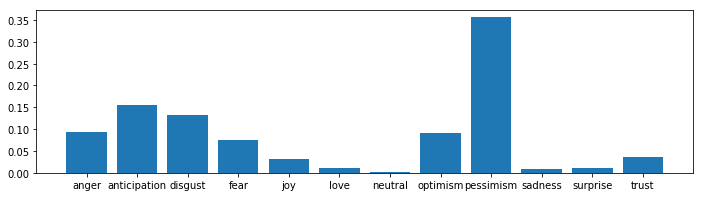

fk8siqi
[0.0163431  0.20652258 0.10865298 0.09843463 0.02405218 0.00669353
 0.00041995 0.08433565 0.24900216 0.08318745 0.08172278 0.04063298]


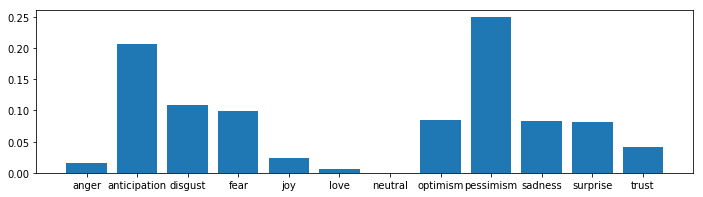

fkynl4e
[3.3365571e-01 1.2535599e-01 2.0309639e-01 5.1287875e-02 2.6617866e-02
 3.3611901e-02 4.0764255e-05 2.7909508e-02 1.1451894e-01 1.6968925e-02
 1.4249681e-02 5.2686416e-02]


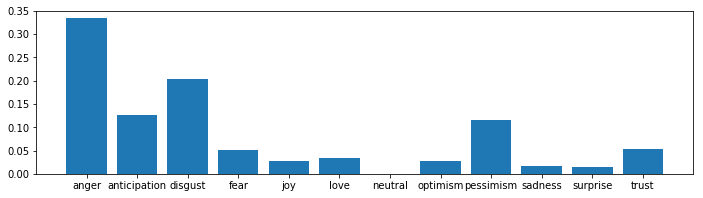

fkzcy03
[0.07330039 0.3519769  0.03969692 0.1718782  0.06834844 0.00386321
 0.00216083 0.03804113 0.07442334 0.08916795 0.02284175 0.06430102]


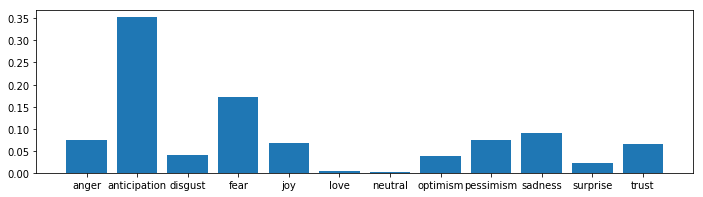

fkhgx4b
[2.4771839e-03 3.6274630e-01 6.1392067e-03 3.0372012e-01 1.3167403e-02
 2.6503927e-04 3.7103808e-03 9.8375157e-03 7.4888341e-02 1.9177222e-01
 2.3509333e-02 7.7669634e-03]


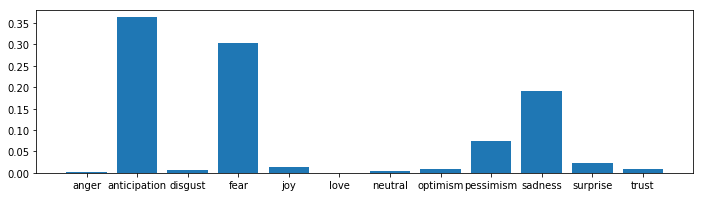

fjkziev
[1.9555855e-01 1.2852404e-01 1.8468592e-01 1.8306914e-01 1.3946743e-02
 1.1175549e-02 4.2731403e-06 7.7295251e-02 1.4297202e-01 2.9014984e-02
 6.8233027e-03 2.6930241e-02]


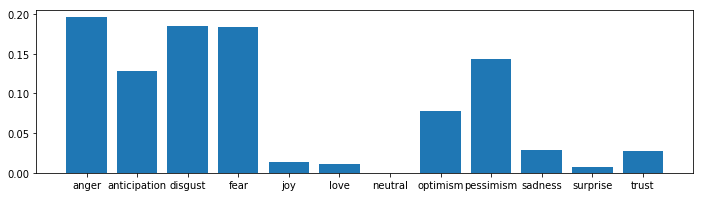

In [110]:
label = encoder.classes_
for index in range(0,len(y_pred)): #limit the range to view the output for mentioned few
    post_text = data.iloc[index]["text"]
    print(data.iloc[index]["id"])
    print(y_pred[index])
    plt.figure(figsize=(40, 3))
    plt.subplot(131)
    plt.bar(label, y_pred[index])
    plt.show()